In [ ]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Load the dataset
data = pd.read_csv("AAPL.csv")

In [ ]:
# show the first few rows of the dataset
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


**Data Describtion :-**

**Date**  : Date of trading

**Open**  : Price at which security first trades

**High**  : Highest Price of the trading day

**Low**   : Lowest Price of the trading day

**Close** : Last Price the stock traded during the trading day

**Adj Close** : Price that is adjusts Coroporate Actions on Closing Price

**Volume** : Number of Shares that changed hands during the trading day

In [ ]:
##Summary Statistics
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


In [ ]:
##Exploring Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [ ]:
data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')

In [ ]:
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [ ]:
##Making Date as Index
data.set_index('Date',inplace=True)

In [ ]:
data['Date'] = data.index

In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,2012-01-03
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,2012-01-04
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,2012-01-05
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,2012-01-06
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,2012-01-09


# **Feature Selection**
We can eliminate features like Open,Low, High Close automatically as they are high multicollinear with Adj Close .

We consider Adj Close as our target variables as it accounts for all corporate decisions like stock split and dividents.

<ipython-input-21-1fb389ee1634>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = np.triu(data.corr())
<ipython-input-21-1fb389ee1634>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(data.corr(),annot=True,annot_kws={"size":14},mask=matrix,cmap='coolwarm')


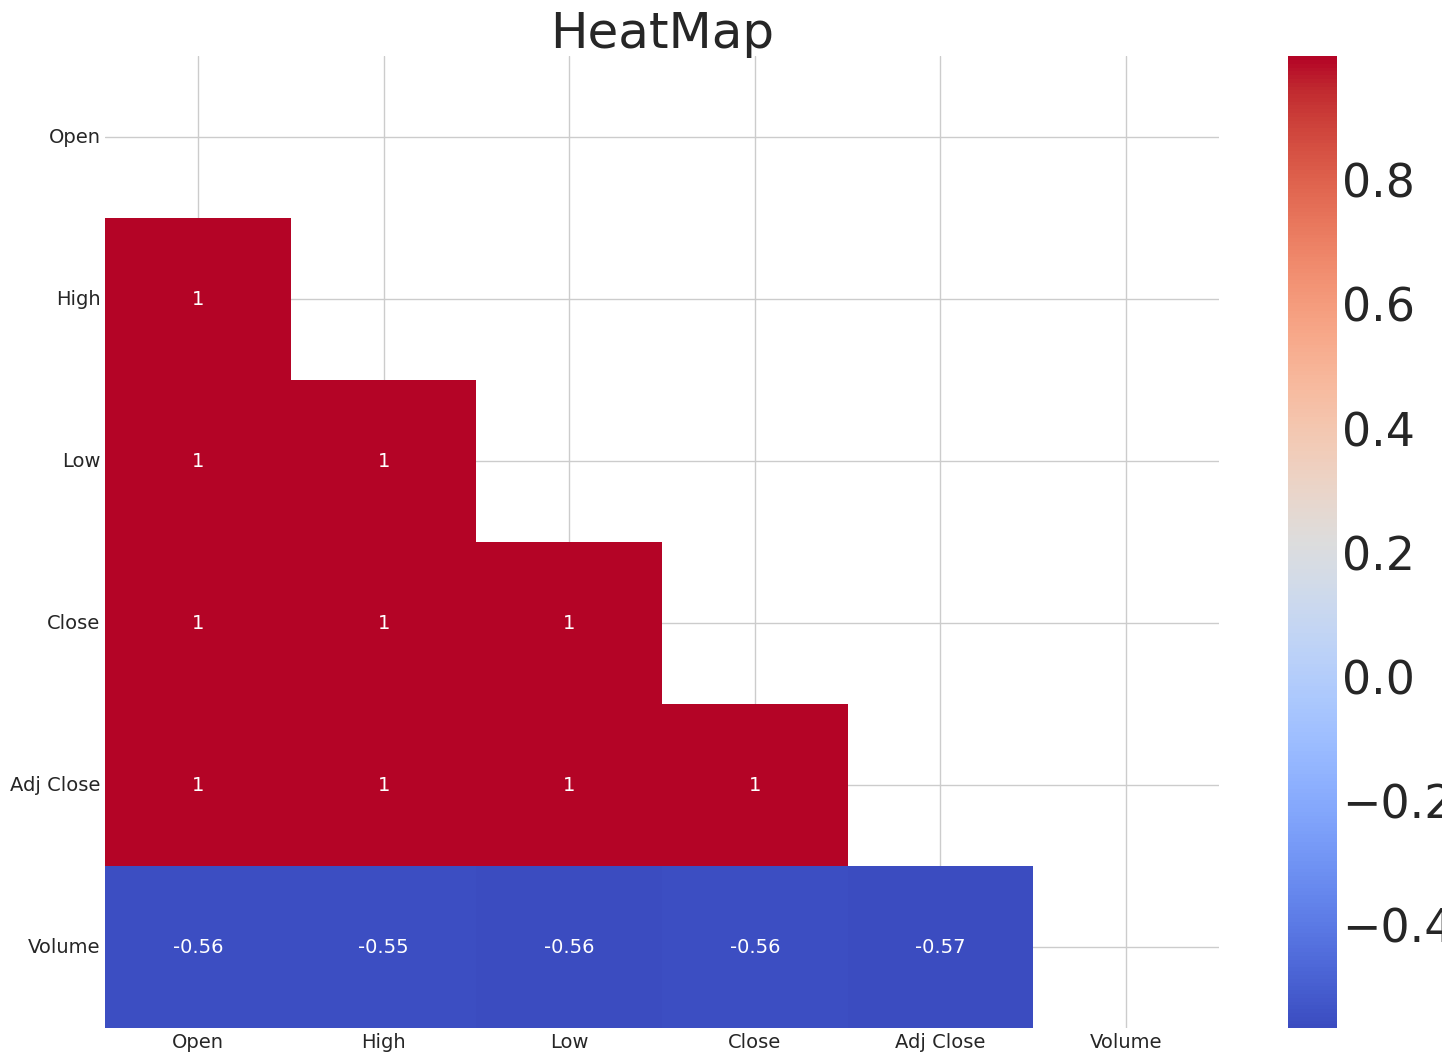

In [ ]:
##HeatMap to Verify Multicollinearity between Features
fig = plt.figure(figsize=(16,12))
matrix = np.triu(data.corr())
ax = sns.heatmap(data.corr(),annot=True,annot_kws={"size":14},mask=matrix,cmap='coolwarm')
ax.tick_params(labelsize=14)
sns.set(font_scale=3)
ax.set_title('HeatMap')
plt.style.use('fivethirtyeight')
plt.show()

In [ ]:
matrix

array([[ 1.        ,  0.90466842,  0.904976  ,  0.90499967,  0.90488007,
         0.91504476, -0.69831117],
       [ 0.        ,  1.        ,  0.99978224,  0.99971844,  0.99949576,
         0.99889483, -0.55795633],
       [ 0.        ,  0.        ,  1.        ,  0.99965729,  0.99974785,
         0.99917086, -0.55490935],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.99976871,
         0.99917946, -0.56342598],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.99940248, -0.55965354],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        , -0.56633216],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ]])

In [ ]:
##Data after feature selection
data_feature_selected = data.drop(axis=1,labels=['Open','High','Low','Close','Volume'])


In [ ]:
col_order = ['Date','Adj Close']
data_feature_selected = data_feature_selected.reindex(columns=col_order)
data_feature_selected

,Date,Adj Close
Date,,
2012-01-03,2012-01-03,50.765709
2012-01-04,2012-01-04,51.038536
2012-01-05,2012-01-05,51.605175
2012-01-06,2012-01-06,52.144630
2012-01-09,2012-01-09,52.061932
...,...,...
2019-12-23,2019-12-23,282.054138
2019-12-24,2019-12-24,282.322266
2019-12-26,2019-12-26,287.923645


In [ ]:
##Resample Data to Monthly instead of Daily by Aggregating Using Mean
monthly_mean = data_feature_selected['Adj Close'].resample('M').mean()

In [ ]:
monthly_data = monthly_mean.to_frame()
monthly_data

,Adj Close
Date,
2012-01-31,52.907298
2012-02-29,61.424381
2012-03-31,71.292448
2012-04-30,74.810151
2012-05-31,69.708045
...,...
2019-08-31,202.738817
2019-09-30,215.853332
2019-10-31,232.974974


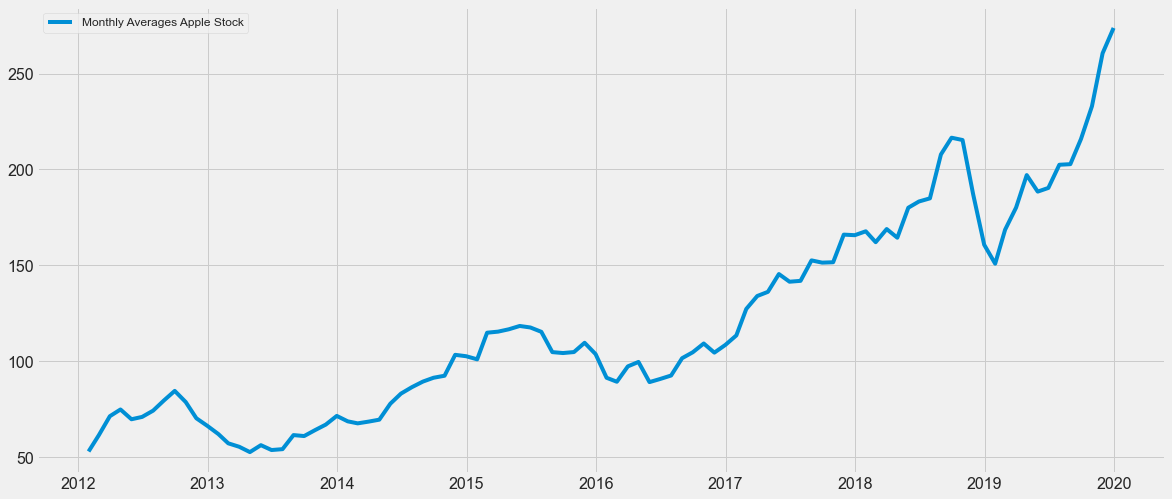

In [ ]:
##Monthly Stock Price
fig = plt.figure(figsize=(18,8))
plt.plot(monthly_data['Adj Close'],label='Monthly Averages Apple Stock')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_title('Monthly Resampled Data')
plt.style.use('fivethirtyeight')
plt.legend(prop={'size': 12})
plt.show()

In [ ]:
monthly_data['Year'] = monthly_data.index.year
monthly_data['Month'] = monthly_data.index.strftime('%B')
monthly_data

,Adj Close,Year,Month
Date,,,
2012-01-31,52.907298,2012,January
2012-02-29,61.424381,2012,February
2012-03-31,71.292448,2012,March
2012-04-30,74.810151,2012,April
2012-05-31,69.708045,2012,May
...,...,...,...
2019-08-31,202.738817,2019,August
2019-09-30,215.853332,2019,September
2019-10-31,232.974974,2019,October


<ipython-input-27-ca450e8d4c9b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(monthly_data['Adj Close']).set_title("Distribution Plot Adj Close -AAPL")


(array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 , 0.012]),
 [Text(0, 0.0, '0.000'),
  Text(0, 0.002, '0.002'),
  Text(0, 0.004, '0.004'),
  Text(0, 0.006, '0.006'),
  Text(0, 0.008, '0.008'),
  Text(0, 0.01, '0.010'),
  Text(0, 0.012, '0.012')])

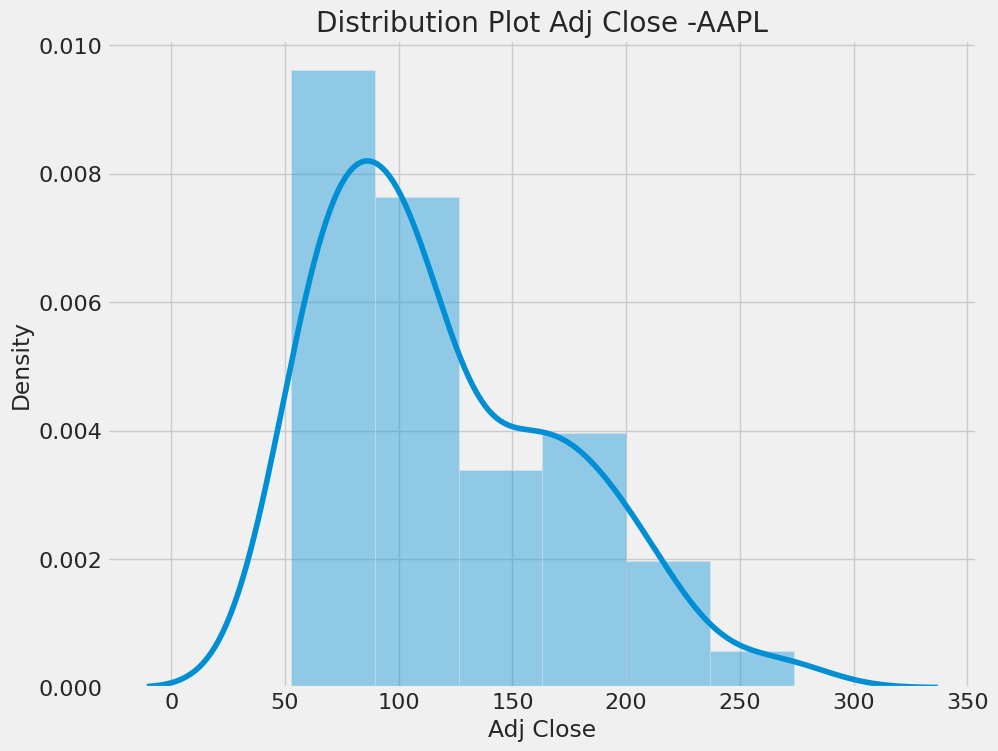

In [ ]:
##Checking Distribution of Our Data
fig = plt.figure(figsize=(10,8))
sns.distplot(monthly_data['Adj Close']).set_title("Distribution Plot Adj Close -AAPL")
ax.tick_params(labelsize=12)
sns.set(font_scale=1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


**Distribution Plot Inference** : Distribution shows Right Skew

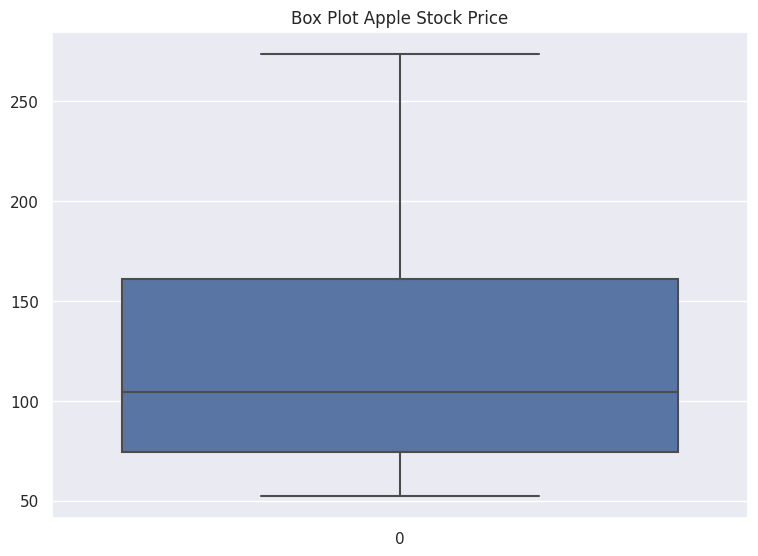

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(monthly_data['Adj Close']).set_title('Box Plot Apple Stock Price')
plt.style.context('fivethirtyeight')


<ipython-input-29-83bdbfbfa75b>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


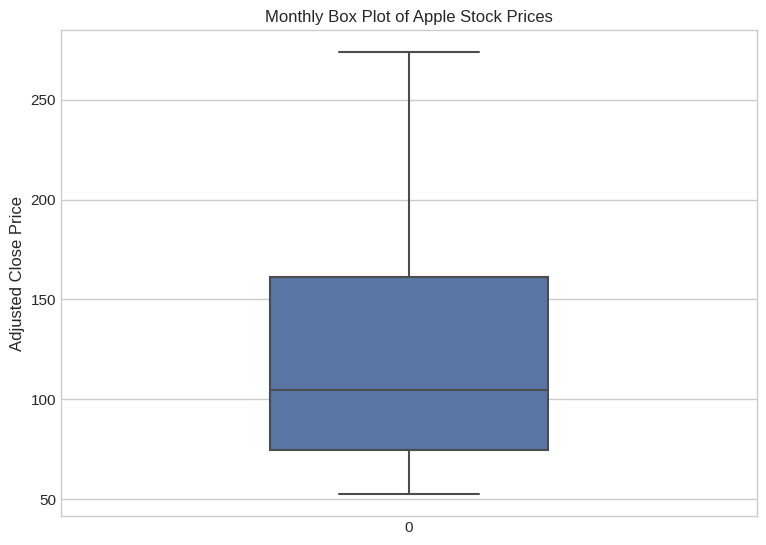

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and set its size
plt.figure(figsize=(8, 6))

# Set style
plt.style.use('seaborn-whitegrid')

# Create a boxplot with seaborn
sns.boxplot(data=monthly_data['Adj Close'], orient='v', width=0.4)

# Set title and labels
plt.title('Monthly Box Plot of Apple Stock Prices')
plt.ylabel('Adjusted Close Price')

# Show plot
plt.show()

**Box-Plot Inference** :-

->Distribution shows Right Skew

->Outlier towards the higher end around Stock price of 300$

Text(0.5, 1.0, 'QQ Plot Apple Stock Price')

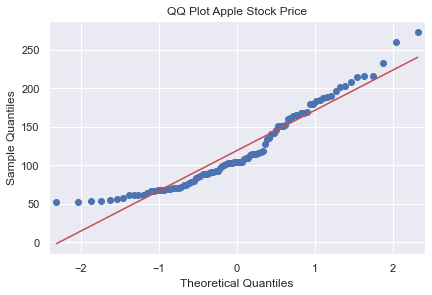

In [ ]:
from statsmodels.graphics.gofplots import qqplot as qq
qq_plot = qq(monthly_data['Adj Close'],line='s')
plt.title('QQ Plot Apple Stock Price')

**QQ plot Inference :-**

->Heavy Tailed Distribution-Curve at Extremities

-> Shows extent of both right and left skews

->Shows Distribution is Not following Gaussian Normal Distribution


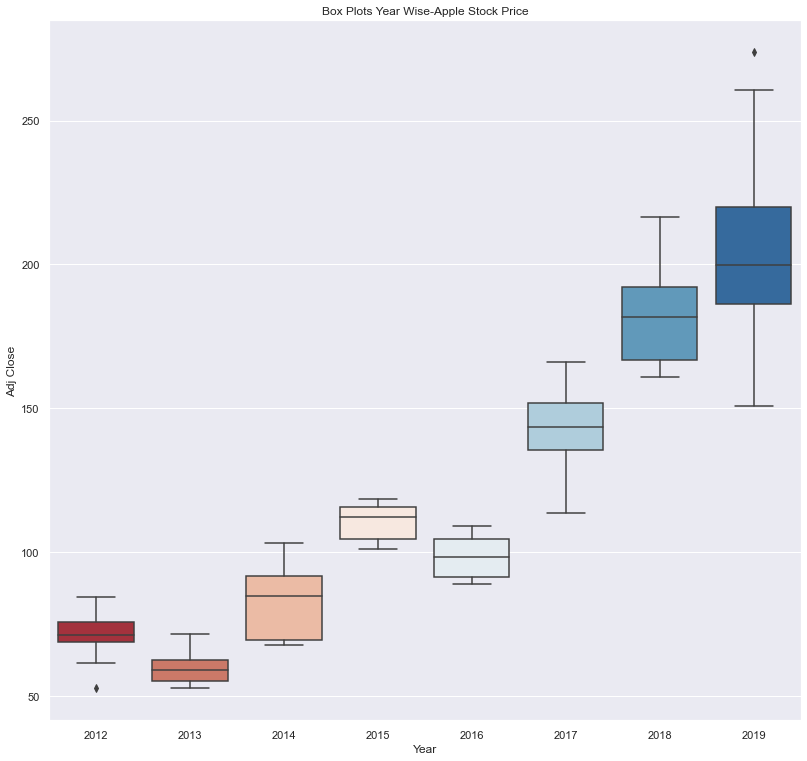

In [ ]:
plt.figure(figsize=(12,12))
ax = sns.boxplot(x=monthly_data['Year'],y=monthly_data['Adj Close'],palette='RdBu')
ax.set_title('Box Plots Year Wise-Apple Stock Price')
plt.style.context('fivethirtyeight')

**Inferences Box Plot**

->Outliers Present in Year 2012 and 2019

->Lot of Variability in Years 2014, 2017-19

->2019 most volatile year among all years

->Upward Rising Trend is shown

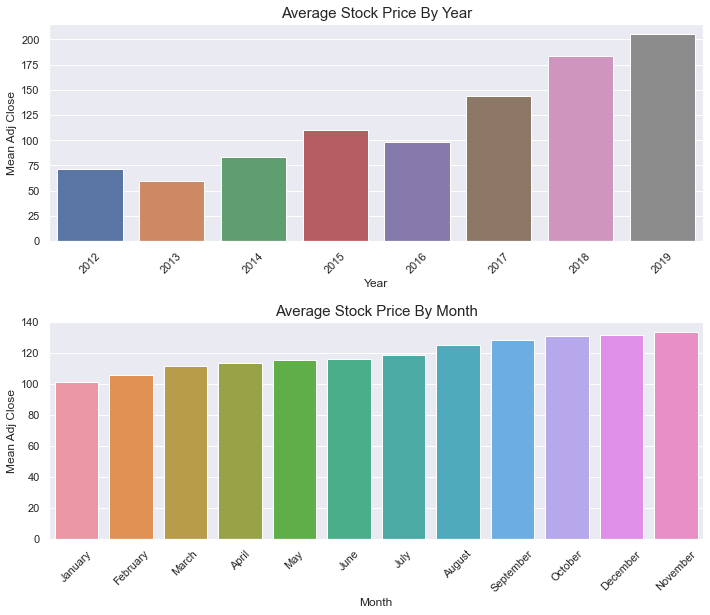

In [ ]:
fig = plt.figure(figsize=(10,16))
fig.set_size_inches(10,16)
group_cols = monthly_data.columns

for enum,i in enumerate(group_cols[1:]):
    ax = fig.add_subplot(4,1,enum+1)
    Aggregated = pd.DataFrame(monthly_data.groupby(str(i))["Adj Close"].mean()).reset_index().sort_values('Adj Close')
    sns.barplot(data=Aggregated,x=str(i),y="Adj Close",ax=ax)
    ax.set(xlabel=str(i), ylabel='Mean Adj Close')
    ax.set_title("Average Stock Price By {}".format(str(i)),fontsize=15)
    plt.xticks(rotation=45)
plt.tight_layout(pad=1)

->According to Mean price by Years, 2013 and 2016 are the only years where Mean price is lower than previous Year.

->The Average Price is Highest in the Month of November.





# Decomposition of Time Series


In [ ]:
import statsmodels.api as sm

<Figure size 1440x1152 with 0 Axes>

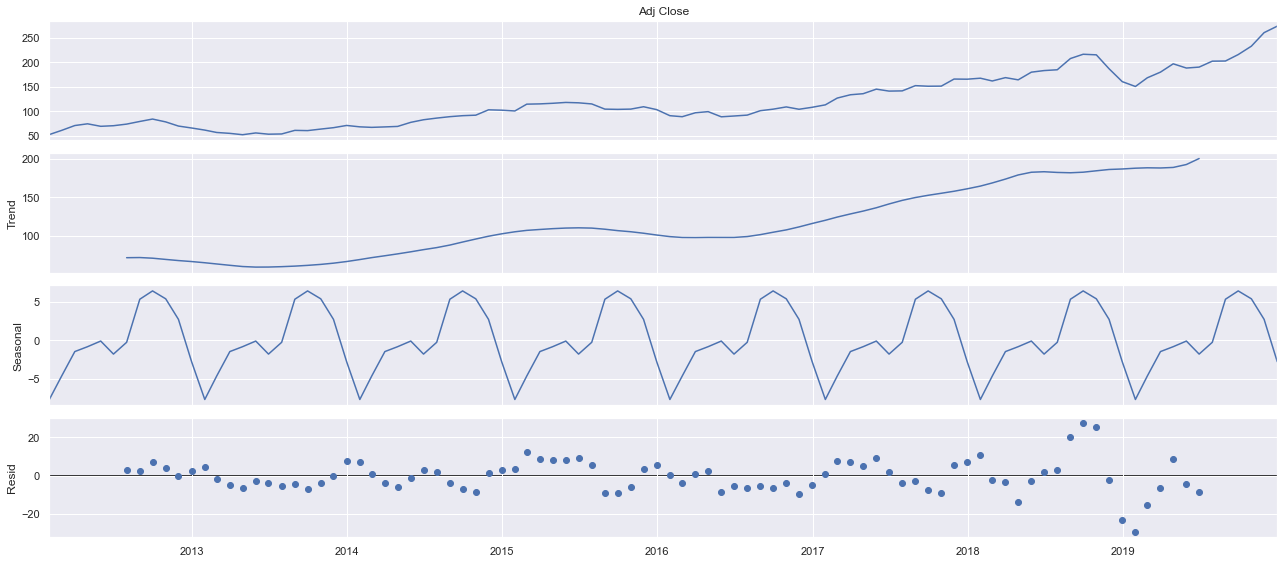

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
plt.figure(figsize=(20,16))
decomposed_series = sm.tsa.seasonal_decompose(monthly_data['Adj Close'],model='additive')
decomposed_series.plot()
plt.show()

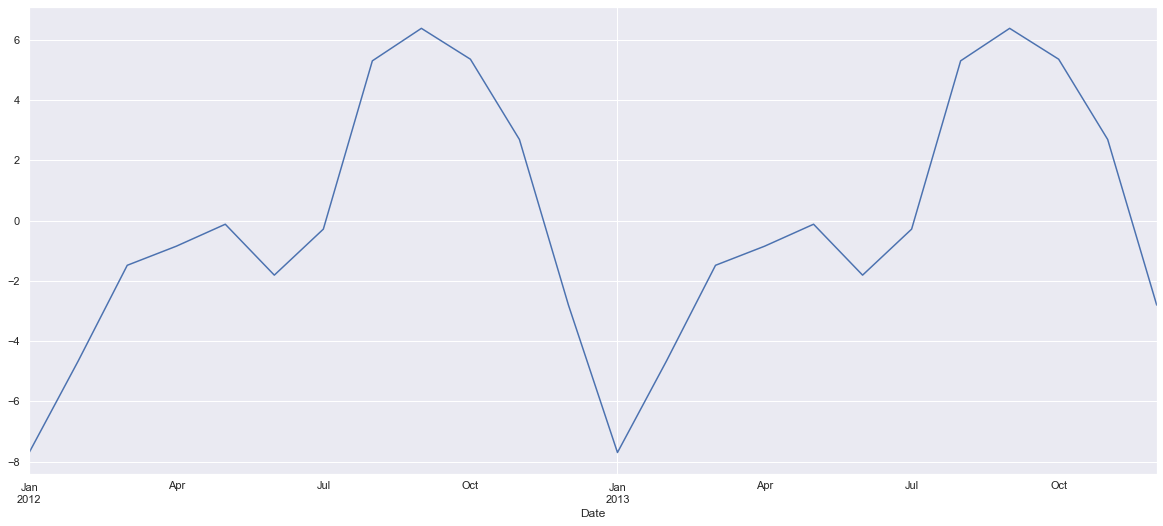

<Figure size 576x576 with 0 Axes>

In [ ]:
##Drilling Down and Observing Seasonality
decomposed_series.seasonal['2012':'2013'].plot()
fig = plt.figure(figsize=(8,8))

**Inferences By Decomposition :-**

->Trend : Overall an Upward Trend

-> Seasonality :There appears to be seasonality,AAPL has rallied during the Holiday season as expected. Since Holiday period has good sales for Apple Over the Years.


In [ ]:
fit = sm.tsa.STL(monthly_data['Adj Close']).fit()

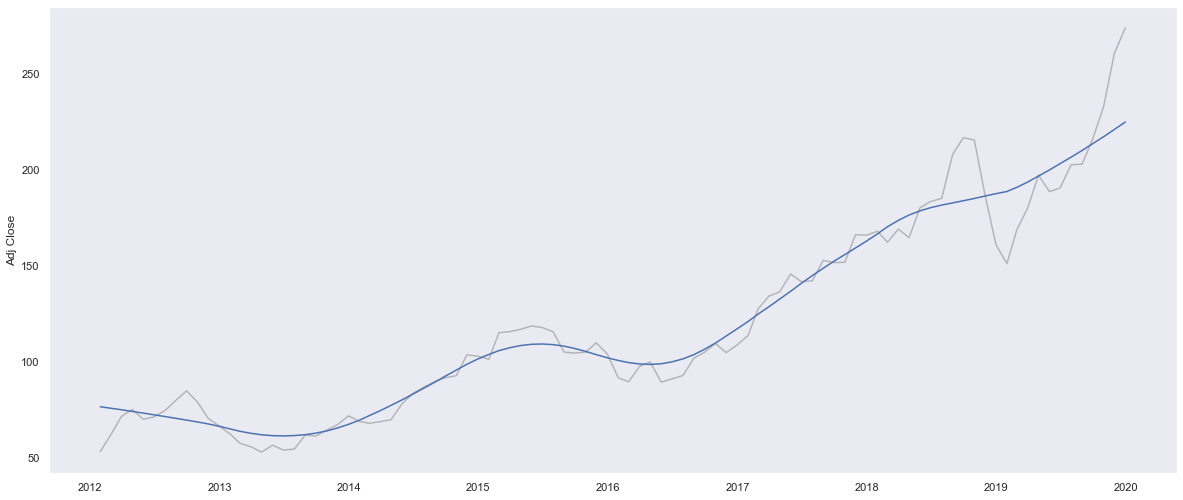

In [ ]:
fig, ax = plt.subplots()
ax.plot(monthly_data['Adj Close'], color='.5', alpha=.5)
ax.plot(fit.trend)
ax.set(ylabel='Adj Close')
ax.grid()

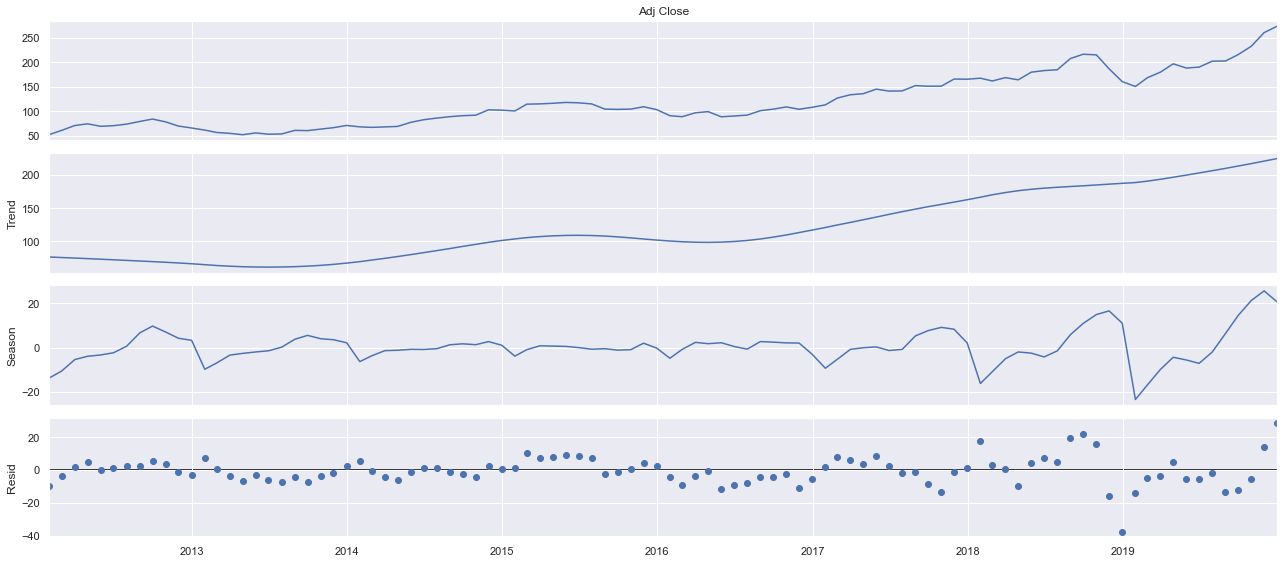

In [ ]:
fit.plot();

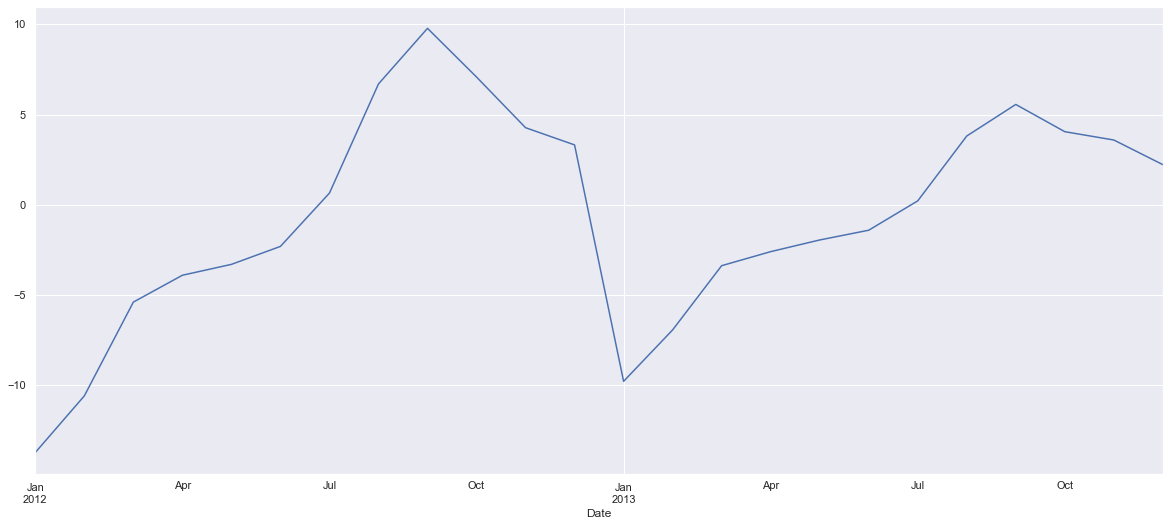

<Figure size 576x576 with 0 Axes>

In [ ]:
##Drilling Down and Observing Seasonality
fit.seasonal['2012':'2013'].plot()
fig = plt.figure(figsize=(8,8))

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt

In [ ]:
from sklearn.model_selection import train_test_split as split

In [ ]:
train,test = split(monthly_data,train_size=0.6,shuffle=False)

In [ ]:
train.shape, test.shape

((57, 3), (39, 3))

In [ ]:
#from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Adj Close'])
model_fit = model.fit(smoothing_level=0.001, optimized=False)#smoothing level is the alphs param which is the weight assigned to eac
print (model_fit. params)

{'smoothing_level': 0.001, 'smoothing_trend': None, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 52.90729845, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [ ]:
y_hat = test.copy()
y_hat['Forecast'] = model_fit.forecast(len(test))
y_hat.head()

,Adj Close,Year,Month,Forecast
Date,,,,
2016-10-31,109.212791,2016,October,54.610483
2016-11-30,104.453936,2016,November,54.610483
2016-12-31,108.472418,2016,December,54.610483
2017-01-31,113.438282,2017,January,54.610483
2017-02-28,127.238253,2017,February,54.610483


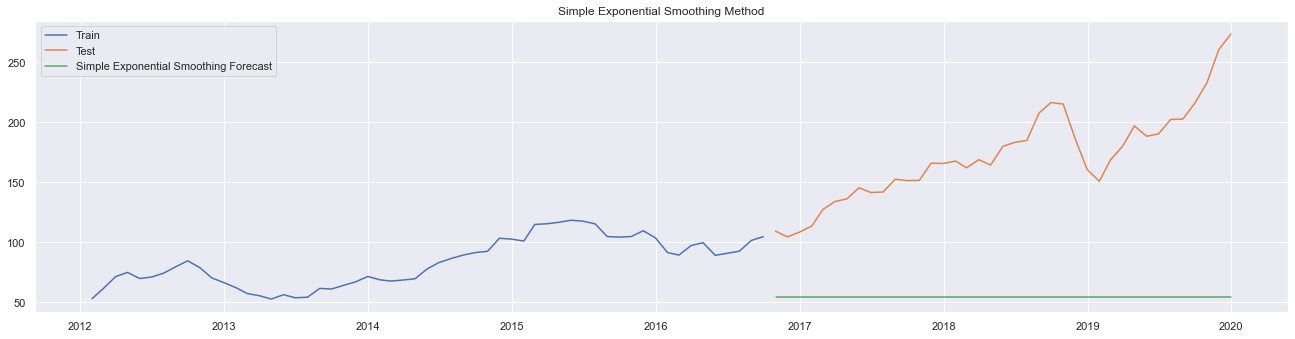

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(train['Adj Close'], label= 'Train')
plt.plot(test['Adj Close'], label='Test')
plt.plot(y_hat['Forecast'],label= "Simple Exponential Smoothing Forecast")
plt.legend(loc="best")
plt.title("Simple Exponential Smoothing Method")
plt.show()

In [ ]:
#from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = Holt(train['Adj Close'])
model_fit = model.fit(smoothing_level=.3, smoothing_slope=.05)#smoothing level is the alphs param which is the weight assigned to eac
print (model_fit. params)

{'smoothing_level': 0.3, 'smoothing_trend': 0.05, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 52.90729845, 'initial_trend': 8.5170824, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\ASHUTO~1.ANA\AppData\Local\Temp/ipykernel_4760/1788735647.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_fit = model.fit(smoothing_level=.3, smoothing_slope=.05)#smoothing level is the alphs param which is the weight assigned to eac
C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\pandas\util\_decorators.py:207: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [ ]:
y_hat = test.copy()
y_hat['Forecast'] = model_fit.forecast(len(test))
y_hat.head()

,Adj Close,Year,Month,Forecast
Date,,,,
2016-10-31,109.212791,2016,October,101.047862
2016-11-30,104.453936,2016,November,101.728213
2016-12-31,108.472418,2016,December,102.408564
2017-01-31,113.438282,2017,January,103.088916
2017-02-28,127.238253,2017,February,103.769267


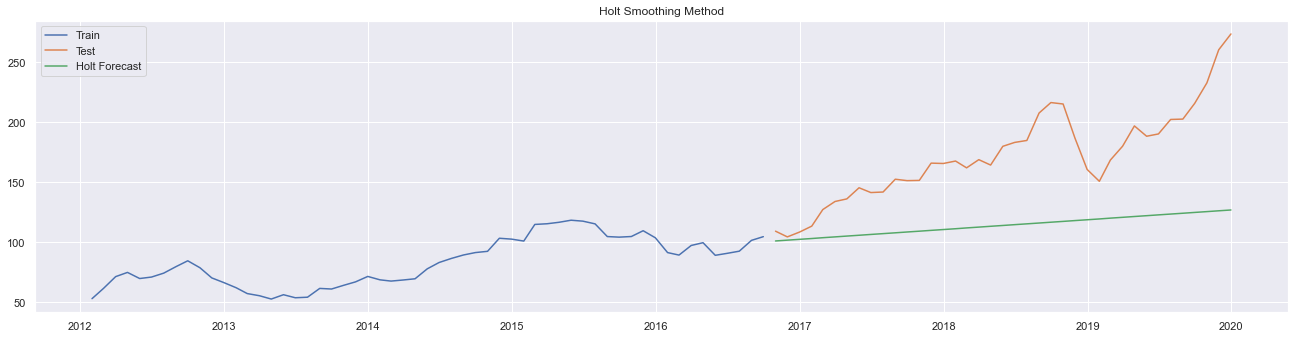

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(train['Adj Close'], label= 'Train')
plt.plot(test['Adj Close'], label='Test')
plt.plot(y_hat['Forecast'],label= "Holt Forecast")
plt.legend(loc="best")
plt.title("Holt Smoothing Method")
plt.show()

# Stationarity of Time Series

**Stationarity Test of Time Series**

Using Augmented Dickey-Fuller(ADF) Test

**Null Hypothesis** : Time series has a unit root -*It is non-stationary*

**Alternate Hypothesis** :   Time series does not have a unit root -*It is stationary*


Time Series is Stationary if we have constant mean,constant variance and No Trend and Seasonality.

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
##ADF Test-Statsmodels Library

def ad_fuller_func(X):
    result_ad_fuller = adfuller(X)
    print('ADF Statistic: %f' % result_ad_fuller[0])
    print('p-value: %f' %result_ad_fuller[1])
    print('Critical Values:')
    for key, value in result_ad_fuller[4].items():
        print('\t%s: %.3f' % (key, value))

    if result_ad_fuller[0] < result_ad_fuller[4]['5%']:
        print('Reject Null Hypothesis(Ho)-Time Series is Stationary')
    else:
        print('Failed to Reject Ho-Time Series is Non-Stationary')



In [ ]:
ad_fuller_func(monthly_data['Adj Close'])

ADF Statistic: 1.339253
p-value: 0.996820
Critical Values:
	1%: -3.504
	5%: -2.894
	10%: -2.584
Failed to Reject Ho-Time Series is Non-Stationary


Time Series is Not Stationary as observed earlier also by Decomposition(Trend and Seasonality Present)

Statistically verified by ADF Test

AutoCorrelation

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

Text(0.5, 0, 'Lags')

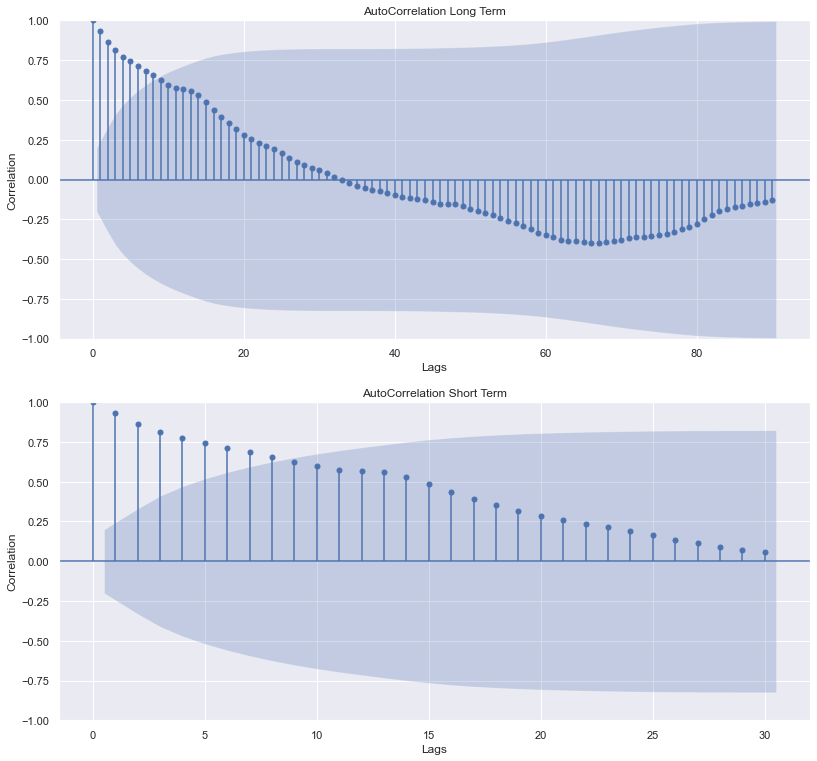

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(12,12))
acf = plot_acf(monthly_data['Adj Close'],lags=90,ax=ax1)
ax1.set_title('AutoCorrelation Long Term')
acf = plot_acf(monthly_data['Adj Close'],lags=30,ax=ax2)
ax2.set_title('AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

Interpreting ACF Plot :-

->Slow Decay of correlation values indicates that the future values are heavily dependent on the lagged values . This shows that the series is not random and good for time series modelling .

->Also tells us series is Non-stationary

->It indicates a MA(1) process

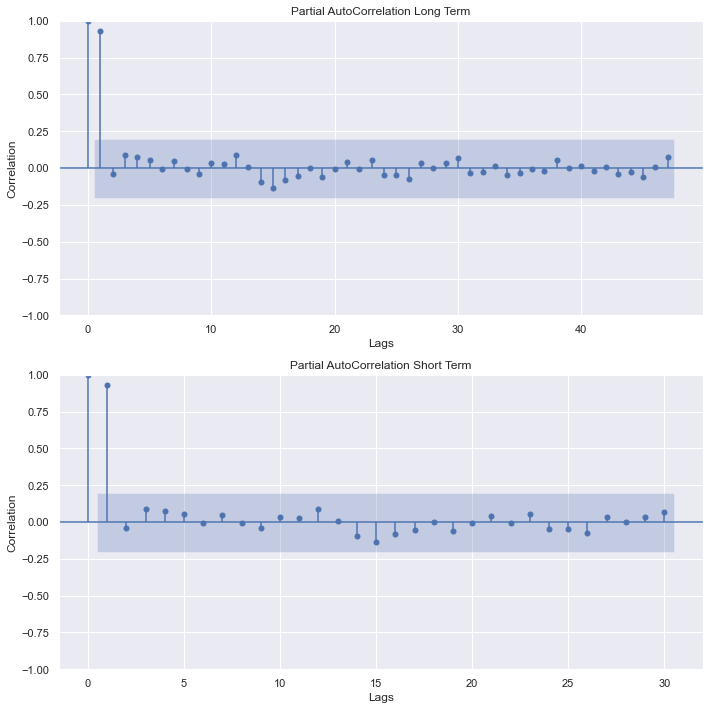

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))
pacf = plot_pacf(monthly_data['Adj Close'],lags=47,ax=ax1)
ax1.set_title('Partial AutoCorrelation Long Term')
pacf = plot_pacf(monthly_data['Adj Close'],lags=30,ax=ax2)
ax2.set_title('Partial AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

Interpreting PACF Plot :-

->Sudden Decay at Lag-1

->Order of series seems AR(1)



**Transformations To Make Series Stationary**

In [ ]:
##Differencing By 1
monthly_diff = monthly_data['Adj Close'] - monthly_data['Adj Close'].shift(1)

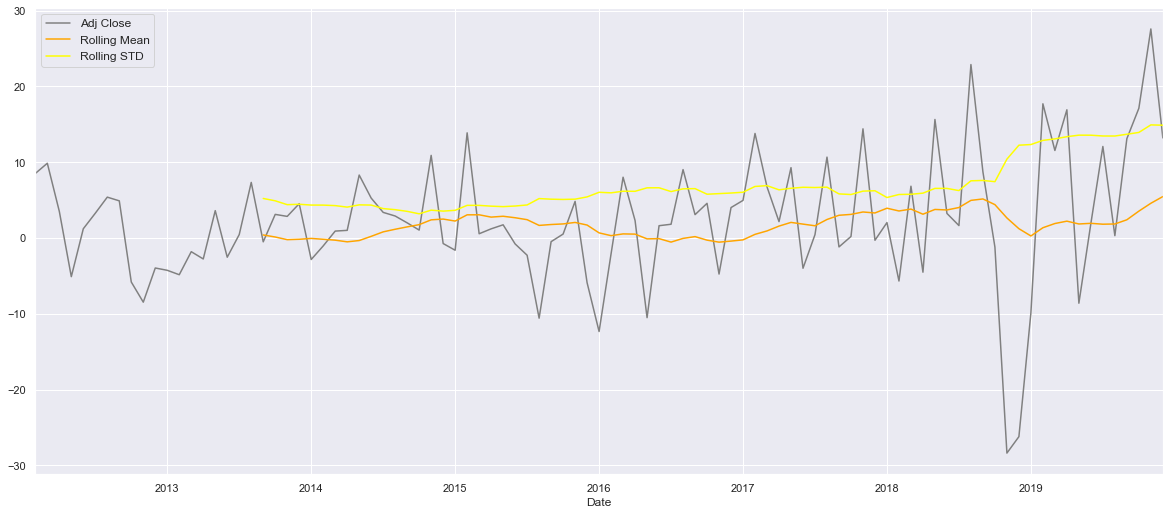

In [ ]:
monthly_diff[1:].plot(c='grey')
monthly_diff[1:].rolling(20).mean().plot(label='Rolling Mean',c='orange')
monthly_diff[1:].rolling(20).std().plot(label='Rolling STD',c='yellow')
plt.legend(prop={'size': 12})

The series looks stationary as its having constant mean and variance .

In [ ]:
##Checking if Time Series is Stationary by Running ADF Test
ad_fuller_func(monthly_diff[1:])

ADF Statistic: -6.501865
p-value: 0.000000
Critical Values:
	1%: -3.502
	5%: -2.893
	10%: -2.583
Reject Null Hypothesis(Ho)-Time Series is Stationary


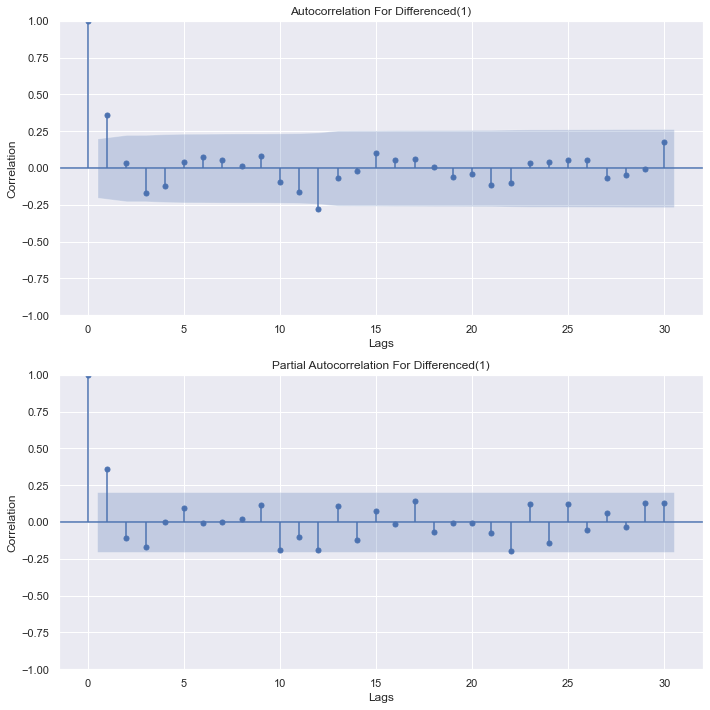

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))
acf = plot_acf(monthly_diff[1:],lags=30,ax=ax1)
pacf = plot_pacf(monthly_diff[1:],lags=30,ax=ax2)
ax1.set_title('Autocorrelation For Differenced(1)')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_title('Partial Autocorrelation For Differenced(1)')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

In [ ]:
monthly_data.head()

,Adj Close,Year,Month
Date,,,
2012-01-31,52.907298,2012,January
2012-02-29,61.424381,2012,February
2012-03-31,71.292448,2012,March
2012-04-30,74.810151,2012,April
2012-05-31,69.708045,2012,May


In [ ]:
modelling_series = monthly_data['Adj Close']
modelling_series

Date
2012-01-31     52.907298
2012-02-29     61.424381
2012-03-31     71.292448
2012-04-30     74.810151
2012-05-31     69.708045
                 ...    
2019-08-31    202.738817
2019-09-30    215.853332
2019-10-31    232.974974
2019-11-30    260.569057
2019-12-31    273.780717
Freq: M, Name: Adj Close, Length: 96, dtype: float64

In [ ]:
train,test = split(modelling_series,train_size=0.6,shuffle=False)

In [ ]:
import itertools

In [ ]:
p = d = q = range(0, 8)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of grid search Model parameter combinations for ARIMA')
print('ARIMA: {} x {}'.format(pdq[1], seasonal_pdq[1]))

Examples of grid search Model parameter combinations for ARIMA
ARIMA: (0, 0, 1) x (0, 0, 1, 12)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
list_param = []
list_param_seasonal=[]
list_results_aic=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = ARIMA(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = model.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

            list_param.append(param)
            list_param_seasonal.append(param_seasonal)
            list_results_aic.append(results.aic)
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:495.9012259765369
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:392.29656944530836
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:246.50215284652253


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 0)x(0, 0, 3, 12)12 - AIC:143.19358229626516
ARIMA(0, 0, 0)x(0, 0, 4, 12)12 - AIC:62.29781700450478
ARIMA(0, 0, 0)x(0, 0, 5, 12)12 - AIC:14.0
ARIMA(0, 0, 0)x(0, 0, 6, 12)12 - AIC:16.0
ARIMA(0, 0, 0)x(0, 0, 7, 12)12 - AIC:18.0
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:407.6767009067285
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1397.2676155713248
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:190.03613003680556
ARIMA(0, 0, 0)x(0, 1, 3, 12)12 - AIC:61.51296943285604
ARIMA(0, 0, 0)x(0, 1, 4, 12)12 - AIC:10.0
ARIMA(0, 0, 0)x(0, 1, 5, 12)12 - AIC:12.0
ARIMA(0, 0, 0)x(0, 1, 6, 12)12 - AIC:14.0
ARIMA(0, 0, 0)x(0, 1, 7, 12)12 - AIC:16.0
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:329.45303932477185
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:199.04766684849798
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:77.50850683121519
ARIMA(0, 0, 0)x(0, 2, 3, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(0, 2, 4, 12)12 - AIC:10.0
ARIMA(0, 0, 0)x(0, 2, 5, 12)12 - AIC:12.0
ARIMA(0, 0, 0)x(0, 2, 6, 12)12 - AIC:14.0
ARIMA(0, 0, 0)x(0, 2, 7, 12)12 - AIC:16

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\numpy\core\_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 5, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 5, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 5, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(1, 5, 3, 12)12 - AIC:10.0
ARIMA(0, 0, 0)x(1, 5, 4, 12)12 - AIC:12.0
ARIMA(0, 0, 0)x(1, 5, 5, 12)12 - AIC:14.0
ARIMA(0, 0, 0)x(1, 5, 6, 12)12 - AIC:16.0
ARIMA(0, 0, 0)x(1, 5, 7, 12)12 - AIC:18.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 6, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 6, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 6, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(1, 6, 3, 12)12 - AIC:10.0
ARIMA(0, 0, 0)x(1, 6, 4, 12)12 - AIC:12.0
ARIMA(0, 0, 0)x(1, 6, 5, 12)12 - AIC:14.0
ARIMA(0, 0, 0)x(1, 6, 6, 12)12 - AIC:16.0
ARIMA(0, 0, 0)x(1, 6, 7, 12)12 - AIC:18.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 7, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 7, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 7, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(1, 7, 3, 12)12 - AIC:10.0
ARIMA(0, 0, 0)x(1, 7, 4, 12)12 - AIC:12.0
ARIMA(0, 0, 0)x(1, 7, 5, 12)12 - AIC:14.0
ARIMA(0, 0, 0)x(1, 7, 6, 12)12 - AIC:16.0
ARIMA(0, 0, 0)x(1, 7, 7, 12)12 - AIC:18.0
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:267.79073887613555
ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:260.01762654913557
ARIMA(0, 0, 0)x(2, 0, 2, 12)12 - AIC:238.51007903069038


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(2, 0, 3, 12)12 - AIC:131.54463982350592
ARIMA(0, 0, 0)x(2, 0, 4, 12)12 - AIC:57.96118584336176
ARIMA(0, 0, 0)x(2, 0, 5, 12)12 - AIC:18.0
ARIMA(0, 0, 0)x(2, 0, 6, 12)12 - AIC:20.0
ARIMA(0, 0, 0)x(2, 0, 7, 12)12 - AIC:22.0
ARIMA(0, 0, 0)x(2, 1, 0, 12)12 - AIC:190.59187054032978
ARIMA(0, 0, 0)x(2, 1, 1, 12)12 - AIC:185.50322823986642
ARIMA(0, 0, 0)x(2, 1, 2, 12)12 - AIC:170.9027707431797
ARIMA(0, 0, 0)x(2, 1, 3, 12)12 - AIC:60.89675993459336
ARIMA(0, 0, 0)x(2, 1, 4, 12)12 - AIC:14.0
ARIMA(0, 0, 0)x(2, 1, 5, 12)12 - AIC:16.0
ARIMA(0, 0, 0)x(2, 1, 6, 12)12 - AIC:18.0
ARIMA(0, 0, 0)x(2, 1, 7, 12)12 - AIC:20.0
ARIMA(0, 0, 0)x(2, 2, 0, 12)12 - AIC:72.89436060627682
ARIMA(0, 0, 0)x(2, 2, 1, 12)12 - AIC:74.89432852754365
ARIMA(0, 0, 0)x(2, 2, 2, 12)12 - AIC:69.98588471607
ARIMA(0, 0, 0)x(2, 2, 3, 12)12 - AIC:12.0
ARIMA(0, 0, 0)x(2, 2, 4, 12)12 - AIC:14.0
ARIMA(0, 0, 0)x(2, 2, 5, 12)12 - AIC:16.0
ARIMA(0, 0, 0)x(2, 2, 6, 12)12 - AIC:18.0
ARIMA(0, 0, 0)x(2, 2, 7, 12)12 - AIC:20.0
A

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(2, 5, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(2, 5, 1, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(2, 5, 2, 12)12 - AIC:10.0
ARIMA(0, 0, 0)x(2, 5, 3, 12)12 - AIC:12.0
ARIMA(0, 0, 0)x(2, 5, 4, 12)12 - AIC:14.0
ARIMA(0, 0, 0)x(2, 5, 5, 12)12 - AIC:16.0
ARIMA(0, 0, 0)x(2, 5, 6, 12)12 - AIC:18.0
ARIMA(0, 0, 0)x(2, 5, 7, 12)12 - AIC:20.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(2, 6, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(2, 6, 1, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(2, 6, 2, 12)12 - AIC:10.0
ARIMA(0, 0, 0)x(2, 6, 3, 12)12 - AIC:12.0
ARIMA(0, 0, 0)x(2, 6, 4, 12)12 - AIC:14.0
ARIMA(0, 0, 0)x(2, 6, 5, 12)12 - AIC:16.0
ARIMA(0, 0, 0)x(2, 6, 6, 12)12 - AIC:18.0
ARIMA(0, 0, 0)x(2, 6, 7, 12)12 - AIC:20.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(2, 7, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(2, 7, 1, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(2, 7, 2, 12)12 - AIC:10.0
ARIMA(0, 0, 0)x(2, 7, 3, 12)12 - AIC:12.0
ARIMA(0, 0, 0)x(2, 7, 4, 12)12 - AIC:14.0
ARIMA(0, 0, 0)x(2, 7, 5, 12)12 - AIC:16.0
ARIMA(0, 0, 0)x(2, 7, 6, 12)12 - AIC:18.0
ARIMA(0, 0, 0)x(2, 7, 7, 12)12 - AIC:20.0
ARIMA(0, 0, 0)x(3, 0, 0, 12)12 - AIC:139.8553726844032


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(3, 0, 1, 12)12 - AIC:142.11991918359885


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(3, 0, 2, 12)12 - AIC:143.957194783988


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(3, 0, 3, 12)12 - AIC:139.0749368577059
ARIMA(0, 0, 0)x(3, 0, 4, 12)12 - AIC:53.20439488926644
ARIMA(0, 0, 0)x(3, 0, 5, 12)12 - AIC:20.0
ARIMA(0, 0, 0)x(3, 0, 6, 12)12 - AIC:22.0
ARIMA(0, 0, 0)x(3, 0, 7, 12)12 - AIC:24.0
ARIMA(0, 0, 0)x(3, 1, 0, 12)12 - AIC:67.47258175529107
ARIMA(0, 0, 0)x(3, 1, 1, 12)12 - AIC:69.47018956581877
ARIMA(0, 0, 0)x(3, 1, 2, 12)12 - AIC:71.47167451483438


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(3, 1, 3, 12)12 - AIC:63.5945856876163
ARIMA(0, 0, 0)x(3, 1, 4, 12)12 - AIC:16.0
ARIMA(0, 0, 0)x(3, 1, 5, 12)12 - AIC:18.0
ARIMA(0, 0, 0)x(3, 1, 6, 12)12 - AIC:20.0
ARIMA(0, 0, 0)x(3, 1, 7, 12)12 - AIC:22.0
ARIMA(0, 0, 0)x(3, 2, 0, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(3, 2, 1, 12)12 - AIC:10.0
ARIMA(0, 0, 0)x(3, 2, 2, 12)12 - AIC:12.0
ARIMA(0, 0, 0)x(3, 2, 3, 12)12 - AIC:14.0
ARIMA(0, 0, 0)x(3, 2, 4, 12)12 - AIC:16.0
ARIMA(0, 0, 0)x(3, 2, 5, 12)12 - AIC:18.0
ARIMA(0, 0, 0)x(3, 2, 6, 12)12 - AIC:20.0
ARIMA(0, 0, 0)x(3, 2, 7, 12)12 - AIC:22.0
ARIMA(0, 0, 0)x(3, 3, 0, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(3, 3, 1, 12)12 - AIC:10.0
ARIMA(0, 0, 0)x(3, 3, 2, 12)12 - AIC:12.0
ARIMA(0, 0, 0)x(3, 3, 3, 12)12 - AIC:14.0
ARIMA(0, 0, 0)x(3, 3, 4, 12)12 - AIC:16.0
ARIMA(0, 0, 0)x(3, 3, 5, 12)12 - AIC:18.0
ARIMA(0, 0, 0)x(3, 3, 6, 12)12 - AIC:20.0
ARIMA(0, 0, 0)x(3, 3, 7, 12)12 - AIC:22.0
ARIMA(0, 0, 0)x(3, 4, 0, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(3, 4, 1, 12)12 - AIC:10.0
ARIMA(0, 0, 0)x(3, 4, 2, 

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(3, 5, 0, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(3, 5, 1, 12)12 - AIC:10.0
ARIMA(0, 0, 0)x(3, 5, 2, 12)12 - AIC:12.0
ARIMA(0, 0, 0)x(3, 5, 3, 12)12 - AIC:14.0
ARIMA(0, 0, 0)x(3, 5, 4, 12)12 - AIC:16.0
ARIMA(0, 0, 0)x(3, 5, 5, 12)12 - AIC:18.0
ARIMA(0, 0, 0)x(3, 5, 6, 12)12 - AIC:20.0
ARIMA(0, 0, 0)x(3, 5, 7, 12)12 - AIC:22.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(3, 6, 0, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(3, 6, 1, 12)12 - AIC:10.0
ARIMA(0, 0, 0)x(3, 6, 2, 12)12 - AIC:12.0
ARIMA(0, 0, 0)x(3, 6, 3, 12)12 - AIC:14.0
ARIMA(0, 0, 0)x(3, 6, 4, 12)12 - AIC:16.0
ARIMA(0, 0, 0)x(3, 6, 5, 12)12 - AIC:18.0
ARIMA(0, 0, 0)x(3, 6, 6, 12)12 - AIC:20.0
ARIMA(0, 0, 0)x(3, 6, 7, 12)12 - AIC:22.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(3, 7, 0, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(3, 7, 1, 12)12 - AIC:10.0
ARIMA(0, 0, 0)x(3, 7, 2, 12)12 - AIC:12.0
ARIMA(0, 0, 0)x(3, 7, 3, 12)12 - AIC:14.0
ARIMA(0, 0, 0)x(3, 7, 4, 12)12 - AIC:16.0
ARIMA(0, 0, 0)x(3, 7, 5, 12)12 - AIC:18.0
ARIMA(0, 0, 0)x(3, 7, 6, 12)12 - AIC:20.0
ARIMA(0, 0, 0)x(3, 7, 7, 12)12 - AIC:22.0
ARIMA(0, 0, 0)x(4, 0, 0, 12)12 - AIC:16.7899681127903


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(4, 0, 1, 12)12 - AIC:18.820409693954172


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(4, 0, 2, 12)12 - AIC:23.5533036024195


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(4, 0, 3, 12)12 - AIC:31.1436472840533


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(4, 0, 4, 12)12 - AIC:29.645944295537745
ARIMA(0, 0, 0)x(4, 0, 5, 12)12 - AIC:22.0
ARIMA(0, 0, 0)x(4, 0, 6, 12)12 - AIC:24.0
ARIMA(0, 0, 0)x(4, 0, 7, 12)12 - AIC:26.0
ARIMA(0, 0, 0)x(4, 1, 0, 12)12 - AIC:10.0
ARIMA(0, 0, 0)x(4, 1, 1, 12)12 - AIC:12.0
ARIMA(0, 0, 0)x(4, 1, 2, 12)12 - AIC:14.0
ARIMA(0, 0, 0)x(4, 1, 3, 12)12 - AIC:16.0
ARIMA(0, 0, 0)x(4, 1, 4, 12)12 - AIC:18.0
ARIMA(0, 0, 0)x(4, 1, 5, 12)12 - AIC:20.0
ARIMA(0, 0, 0)x(4, 1, 6, 12)12 - AIC:22.0
ARIMA(0, 0, 0)x(4, 1, 7, 12)12 - AIC:24.0
ARIMA(0, 0, 0)x(4, 2, 0, 12)12 - AIC:10.0
ARIMA(0, 0, 0)x(4, 2, 1, 12)12 - AIC:12.0
ARIMA(0, 0, 0)x(4, 2, 2, 12)12 - AIC:14.0
ARIMA(0, 0, 0)x(4, 2, 3, 12)12 - AIC:16.0
ARIMA(0, 0, 0)x(4, 2, 4, 12)12 - AIC:18.0
ARIMA(0, 0, 0)x(4, 2, 5, 12)12 - AIC:20.0
ARIMA(0, 0, 0)x(4, 2, 6, 12)12 - AIC:22.0
ARIMA(0, 0, 0)x(4, 2, 7, 12)12 - AIC:24.0
ARIMA(0, 0, 0)x(4, 3, 0, 12)12 - AIC:10.0
ARIMA(0, 0, 0)x(4, 3, 1, 12)12 - AIC:12.0
ARIMA(0, 0, 0)x(4, 3, 2, 12)12 - AIC:14.0
ARIMA(0, 0, 0)x(4, 3

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(4, 5, 0, 12)12 - AIC:10.0
ARIMA(0, 0, 0)x(4, 5, 1, 12)12 - AIC:12.0
ARIMA(0, 0, 0)x(4, 5, 2, 12)12 - AIC:14.0
ARIMA(0, 0, 0)x(4, 5, 3, 12)12 - AIC:16.0
ARIMA(0, 0, 0)x(4, 5, 4, 12)12 - AIC:18.0
ARIMA(0, 0, 0)x(4, 5, 5, 12)12 - AIC:20.0
ARIMA(0, 0, 0)x(4, 5, 6, 12)12 - AIC:22.0
ARIMA(0, 0, 0)x(4, 5, 7, 12)12 - AIC:24.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(4, 6, 0, 12)12 - AIC:10.0
ARIMA(0, 0, 0)x(4, 6, 1, 12)12 - AIC:12.0
ARIMA(0, 0, 0)x(4, 6, 2, 12)12 - AIC:14.0
ARIMA(0, 0, 0)x(4, 6, 3, 12)12 - AIC:16.0
ARIMA(0, 0, 0)x(4, 6, 4, 12)12 - AIC:18.0
ARIMA(0, 0, 0)x(4, 6, 5, 12)12 - AIC:20.0
ARIMA(0, 0, 0)x(4, 6, 6, 12)12 - AIC:22.0
ARIMA(0, 0, 0)x(4, 6, 7, 12)12 - AIC:24.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(4, 7, 0, 12)12 - AIC:10.0
ARIMA(0, 0, 0)x(4, 7, 1, 12)12 - AIC:12.0
ARIMA(0, 0, 0)x(4, 7, 2, 12)12 - AIC:14.0
ARIMA(0, 0, 0)x(4, 7, 3, 12)12 - AIC:16.0
ARIMA(0, 0, 0)x(4, 7, 4, 12)12 - AIC:18.0
ARIMA(0, 0, 0)x(4, 7, 5, 12)12 - AIC:20.0
ARIMA(0, 0, 0)x(4, 7, 6, 12)12 - AIC:22.0
ARIMA(0, 0, 0)x(4, 7, 7, 12)12 - AIC:24.0
ARIMA(0, 0, 0)x(5, 0, 0, 12)12 - AIC:14.0
ARIMA(0, 0, 0)x(5, 0, 1, 12)12 - AIC:16.0
ARIMA(0, 0, 0)x(5, 0, 2, 12)12 - AIC:18.0
ARIMA(0, 0, 0)x(5, 0, 3, 12)12 - AIC:20.0
ARIMA(0, 0, 0)x(5, 0, 4, 12)12 - AIC:22.0
ARIMA(0, 0, 0)x(5, 0, 5, 12)12 - AIC:24.0
ARIMA(0, 0, 0)x(5, 0, 6, 12)12 - AIC:26.0
ARIMA(0, 0, 0)x(5, 0, 7, 12)12 - AIC:28.0
ARIMA(0, 0, 0)x(5, 1, 0, 12)12 - AIC:12.0
ARIMA(0, 0, 0)x(5, 1, 1, 12)12 - AIC:14.0
ARIMA(0, 0, 0)x(5, 1, 2, 12)12 - AIC:16.0
ARIMA(0, 0, 0)x(5, 1, 3, 12)12 - AIC:18.0
ARIMA(0, 0, 0)x(5, 1, 4, 12)12 - AIC:20.0
ARIMA(0, 0, 0)x(5, 1, 5, 12)12 - AIC:22.0
ARIMA(0, 0, 0)x(5, 1, 6, 12)12 - AIC:24.0
ARIMA(0, 0, 0)x(5, 1, 7, 12)12 - A

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(5, 5, 0, 12)12 - AIC:12.0
ARIMA(0, 0, 0)x(5, 5, 1, 12)12 - AIC:14.0
ARIMA(0, 0, 0)x(5, 5, 2, 12)12 - AIC:16.0
ARIMA(0, 0, 0)x(5, 5, 3, 12)12 - AIC:18.0
ARIMA(0, 0, 0)x(5, 5, 4, 12)12 - AIC:20.0
ARIMA(0, 0, 0)x(5, 5, 5, 12)12 - AIC:22.0
ARIMA(0, 0, 0)x(5, 5, 6, 12)12 - AIC:24.0
ARIMA(0, 0, 0)x(5, 5, 7, 12)12 - AIC:26.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(5, 6, 0, 12)12 - AIC:12.0
ARIMA(0, 0, 0)x(5, 6, 1, 12)12 - AIC:14.0
ARIMA(0, 0, 0)x(5, 6, 2, 12)12 - AIC:16.0
ARIMA(0, 0, 0)x(5, 6, 3, 12)12 - AIC:18.0
ARIMA(0, 0, 0)x(5, 6, 4, 12)12 - AIC:20.0
ARIMA(0, 0, 0)x(5, 6, 5, 12)12 - AIC:22.0
ARIMA(0, 0, 0)x(5, 6, 6, 12)12 - AIC:24.0
ARIMA(0, 0, 0)x(5, 6, 7, 12)12 - AIC:26.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(5, 7, 0, 12)12 - AIC:12.0
ARIMA(0, 0, 0)x(5, 7, 1, 12)12 - AIC:14.0
ARIMA(0, 0, 0)x(5, 7, 2, 12)12 - AIC:16.0
ARIMA(0, 0, 0)x(5, 7, 3, 12)12 - AIC:18.0
ARIMA(0, 0, 0)x(5, 7, 4, 12)12 - AIC:20.0
ARIMA(0, 0, 0)x(5, 7, 5, 12)12 - AIC:22.0
ARIMA(0, 0, 0)x(5, 7, 6, 12)12 - AIC:24.0
ARIMA(0, 0, 0)x(5, 7, 7, 12)12 - AIC:26.0
ARIMA(0, 0, 0)x(6, 0, 0, 12)12 - AIC:16.0
ARIMA(0, 0, 0)x(6, 0, 1, 12)12 - AIC:18.0
ARIMA(0, 0, 0)x(6, 0, 2, 12)12 - AIC:20.0
ARIMA(0, 0, 0)x(6, 0, 3, 12)12 - AIC:22.0
ARIMA(0, 0, 0)x(6, 0, 4, 12)12 - AIC:24.0
ARIMA(0, 0, 0)x(6, 0, 5, 12)12 - AIC:26.0
ARIMA(0, 0, 0)x(6, 0, 6, 12)12 - AIC:28.0
ARIMA(0, 0, 0)x(6, 0, 7, 12)12 - AIC:30.0
ARIMA(0, 0, 0)x(6, 1, 0, 12)12 - AIC:14.0
ARIMA(0, 0, 0)x(6, 1, 1, 12)12 - AIC:16.0
ARIMA(0, 0, 0)x(6, 1, 2, 12)12 - AIC:18.0
ARIMA(0, 0, 0)x(6, 1, 3, 12)12 - AIC:20.0
ARIMA(0, 0, 0)x(6, 1, 4, 12)12 - AIC:22.0
ARIMA(0, 0, 0)x(6, 1, 5, 12)12 - AIC:24.0
ARIMA(0, 0, 0)x(6, 1, 6, 12)12 - AIC:26.0
ARIMA(0, 0, 0)x(6, 1, 7, 12)12 - A

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(6, 5, 0, 12)12 - AIC:14.0
ARIMA(0, 0, 0)x(6, 5, 1, 12)12 - AIC:16.0
ARIMA(0, 0, 0)x(6, 5, 2, 12)12 - AIC:18.0
ARIMA(0, 0, 0)x(6, 5, 3, 12)12 - AIC:20.0
ARIMA(0, 0, 0)x(6, 5, 4, 12)12 - AIC:22.0
ARIMA(0, 0, 0)x(6, 5, 5, 12)12 - AIC:24.0
ARIMA(0, 0, 0)x(6, 5, 6, 12)12 - AIC:26.0
ARIMA(0, 0, 0)x(6, 5, 7, 12)12 - AIC:28.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(6, 6, 0, 12)12 - AIC:14.0
ARIMA(0, 0, 0)x(6, 6, 1, 12)12 - AIC:16.0
ARIMA(0, 0, 0)x(6, 6, 2, 12)12 - AIC:18.0
ARIMA(0, 0, 0)x(6, 6, 3, 12)12 - AIC:20.0
ARIMA(0, 0, 0)x(6, 6, 4, 12)12 - AIC:22.0
ARIMA(0, 0, 0)x(6, 6, 5, 12)12 - AIC:24.0
ARIMA(0, 0, 0)x(6, 6, 6, 12)12 - AIC:26.0
ARIMA(0, 0, 0)x(6, 6, 7, 12)12 - AIC:28.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(6, 7, 0, 12)12 - AIC:14.0
ARIMA(0, 0, 0)x(6, 7, 1, 12)12 - AIC:16.0
ARIMA(0, 0, 0)x(6, 7, 2, 12)12 - AIC:18.0
ARIMA(0, 0, 0)x(6, 7, 3, 12)12 - AIC:20.0
ARIMA(0, 0, 0)x(6, 7, 4, 12)12 - AIC:22.0
ARIMA(0, 0, 0)x(6, 7, 5, 12)12 - AIC:24.0
ARIMA(0, 0, 0)x(6, 7, 6, 12)12 - AIC:26.0
ARIMA(0, 0, 0)x(6, 7, 7, 12)12 - AIC:28.0
ARIMA(0, 0, 0)x(7, 0, 0, 12)12 - AIC:18.0
ARIMA(0, 0, 0)x(7, 0, 1, 12)12 - AIC:20.0
ARIMA(0, 0, 0)x(7, 0, 2, 12)12 - AIC:22.0
ARIMA(0, 0, 0)x(7, 0, 3, 12)12 - AIC:24.0
ARIMA(0, 0, 0)x(7, 0, 4, 12)12 - AIC:26.0
ARIMA(0, 0, 0)x(7, 0, 5, 12)12 - AIC:28.0
ARIMA(0, 0, 0)x(7, 0, 6, 12)12 - AIC:30.0
ARIMA(0, 0, 0)x(7, 0, 7, 12)12 - AIC:32.0
ARIMA(0, 0, 0)x(7, 1, 0, 12)12 - AIC:16.0
ARIMA(0, 0, 0)x(7, 1, 1, 12)12 - AIC:18.0
ARIMA(0, 0, 0)x(7, 1, 2, 12)12 - AIC:20.0
ARIMA(0, 0, 0)x(7, 1, 3, 12)12 - AIC:22.0
ARIMA(0, 0, 0)x(7, 1, 4, 12)12 - AIC:24.0
ARIMA(0, 0, 0)x(7, 1, 5, 12)12 - AIC:26.0
ARIMA(0, 0, 0)x(7, 1, 6, 12)12 - AIC:28.0
ARIMA(0, 0, 0)x(7, 1, 7, 12)12 - A

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(7, 5, 0, 12)12 - AIC:16.0
ARIMA(0, 0, 0)x(7, 5, 1, 12)12 - AIC:18.0
ARIMA(0, 0, 0)x(7, 5, 2, 12)12 - AIC:20.0
ARIMA(0, 0, 0)x(7, 5, 3, 12)12 - AIC:22.0
ARIMA(0, 0, 0)x(7, 5, 4, 12)12 - AIC:24.0
ARIMA(0, 0, 0)x(7, 5, 5, 12)12 - AIC:26.0
ARIMA(0, 0, 0)x(7, 5, 6, 12)12 - AIC:28.0
ARIMA(0, 0, 0)x(7, 5, 7, 12)12 - AIC:30.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(7, 6, 0, 12)12 - AIC:16.0
ARIMA(0, 0, 0)x(7, 6, 1, 12)12 - AIC:18.0
ARIMA(0, 0, 0)x(7, 6, 2, 12)12 - AIC:20.0
ARIMA(0, 0, 0)x(7, 6, 3, 12)12 - AIC:22.0
ARIMA(0, 0, 0)x(7, 6, 4, 12)12 - AIC:24.0
ARIMA(0, 0, 0)x(7, 6, 5, 12)12 - AIC:26.0
ARIMA(0, 0, 0)x(7, 6, 6, 12)12 - AIC:28.0
ARIMA(0, 0, 0)x(7, 6, 7, 12)12 - AIC:30.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(7, 7, 0, 12)12 - AIC:16.0
ARIMA(0, 0, 0)x(7, 7, 1, 12)12 - AIC:18.0
ARIMA(0, 0, 0)x(7, 7, 2, 12)12 - AIC:20.0
ARIMA(0, 0, 0)x(7, 7, 3, 12)12 - AIC:22.0
ARIMA(0, 0, 0)x(7, 7, 4, 12)12 - AIC:24.0
ARIMA(0, 0, 0)x(7, 7, 5, 12)12 - AIC:26.0
ARIMA(0, 0, 0)x(7, 7, 6, 12)12 - AIC:28.0
ARIMA(0, 0, 0)x(7, 7, 7, 12)12 - AIC:30.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:421.3937030114056
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:334.15148197798624
ARIMA(0, 0, 1)x(0, 0, 2, 12)12 - AIC:213.5576003114502


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 0, 3, 12)12 - AIC:133.42315316271413
ARIMA(0, 0, 1)x(0, 0, 4, 12)12 - AIC:56.18704350361501
ARIMA(0, 0, 1)x(0, 0, 5, 12)12 - AIC:16.0
ARIMA(0, 0, 1)x(0, 0, 6, 12)12 - AIC:18.0
ARIMA(0, 0, 1)x(0, 0, 7, 12)12 - AIC:20.0
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:348.6557662704253
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1355.7625871579096
ARIMA(0, 0, 1)x(0, 1, 2, 12)12 - AIC:155.63599389131815
ARIMA(0, 0, 1)x(0, 1, 3, 12)12 - AIC:56.07599933896767
ARIMA(0, 0, 1)x(0, 1, 4, 12)12 - AIC:12.0
ARIMA(0, 0, 1)x(0, 1, 5, 12)12 - AIC:14.0
ARIMA(0, 0, 1)x(0, 1, 6, 12)12 - AIC:16.0
ARIMA(0, 0, 1)x(0, 1, 7, 12)12 - AIC:18.0
ARIMA(0, 0, 1)x(0, 2, 0, 12)12 - AIC:284.2133658905178
ARIMA(0, 0, 1)x(0, 2, 1, 12)12 - AIC:166.8680928168115
ARIMA(0, 0, 1)x(0, 2, 2, 12)12 - AIC:68.84617401593128
ARIMA(0, 0, 1)x(0, 2, 3, 12)12 - AIC:10.0
ARIMA(0, 0, 1)x(0, 2, 4, 12)12 - AIC:12.0
ARIMA(0, 0, 1)x(0, 2, 5, 12)12 - AIC:14.0
ARIMA(0, 0, 1)x(0, 2, 6, 12)12 - AIC:16.0
ARIMA(0, 0, 1)x(0, 2, 7, 12)12 - AIC:18.

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 1)x(0, 5, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 1)x(0, 5, 3, 12)12 - AIC:10.0
ARIMA(0, 0, 1)x(0, 5, 4, 12)12 - AIC:12.0
ARIMA(0, 0, 1)x(0, 5, 5, 12)12 - AIC:14.0
ARIMA(0, 0, 1)x(0, 5, 6, 12)12 - AIC:16.0
ARIMA(0, 0, 1)x(0, 5, 7, 12)12 - AIC:18.0
ARIMA(0, 0, 1)x(0, 6, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 1)x(0, 6, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(0, 6, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 1)x(0, 6, 3, 12)12 - AIC:10.0
ARIMA(0, 0, 1)x(0, 6, 4, 12)12 - AIC:12.0
ARIMA(0, 0, 1)x(0, 6, 5, 12)12 - AIC:14.0
ARIMA(0, 0, 1)x(0, 6, 6, 12)12 - AIC:16.0
ARIMA(0, 0, 1)x(0, 6, 7, 12)12 - AIC:18.0
ARIMA(0, 0, 1)x(0, 7, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 1)x(0, 7, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(0, 7, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 1)x(0, 7, 3, 12)12 - AIC:10.0
ARIMA(0, 0, 1)x(0, 7, 4, 12)12 - AIC:12.0
ARIMA(0, 0, 1)x(0, 7, 5, 12)12 - AIC:14.0
ARIMA(0, 0, 1)x(0, 7, 6, 12)12 - AIC:16.0
ARIMA(0, 0, 1)x(0, 7, 7, 12)12 - AIC:18.0
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:347.7102836679284
ARIMA(0, 0, 1)x(1, 0, 1, 12)

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 2, 12)12 - AIC:212.65027487442953


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 3, 12)12 - AIC:126.41138687883233
ARIMA(0, 0, 1)x(1, 0, 4, 12)12 - AIC:51.284057983704834
ARIMA(0, 0, 1)x(1, 0, 5, 12)12 - AIC:18.0
ARIMA(0, 0, 1)x(1, 0, 6, 12)12 - AIC:20.0
ARIMA(0, 0, 1)x(1, 0, 7, 12)12 - AIC:22.0
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:274.4005891893137
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:261.7406188276108
ARIMA(0, 0, 1)x(1, 1, 2, 12)12 - AIC:157.52722166783272
ARIMA(0, 0, 1)x(1, 1, 3, 12)12 - AIC:57.65532064518367
ARIMA(0, 0, 1)x(1, 1, 4, 12)12 - AIC:14.0
ARIMA(0, 0, 1)x(1, 1, 5, 12)12 - AIC:16.0
ARIMA(0, 0, 1)x(1, 1, 6, 12)12 - AIC:18.0
ARIMA(0, 0, 1)x(1, 1, 7, 12)12 - AIC:20.0
ARIMA(0, 0, 1)x(1, 2, 0, 12)12 - AIC:194.16272963454517
ARIMA(0, 0, 1)x(1, 2, 1, 12)12 - AIC:168.8656211352724
ARIMA(0, 0, 1)x(1, 2, 2, 12)12 - AIC:70.84604233814507
ARIMA(0, 0, 1)x(1, 2, 3, 12)12 - AIC:12.0
ARIMA(0, 0, 1)x(1, 2, 4, 12)12 - AIC:14.0
ARIMA(0, 0, 1)x(1, 2, 5, 12)12 - AIC:16.0
ARIMA(0, 0, 1)x(1, 2, 6, 12)12 - AIC:18.0
ARIMA(0, 0, 1)x(1, 2, 7, 12)12 - AIC:20

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(2, 0, 3, 12)12 - AIC:123.3411700956977
ARIMA(0, 0, 1)x(2, 0, 4, 12)12 - AIC:39.18227849926075
ARIMA(0, 0, 1)x(2, 0, 5, 12)12 - AIC:20.0
ARIMA(0, 0, 1)x(2, 0, 6, 12)12 - AIC:22.0
ARIMA(0, 0, 1)x(2, 0, 7, 12)12 - AIC:24.0
ARIMA(0, 0, 1)x(2, 1, 0, 12)12 - AIC:171.46810372902823
ARIMA(0, 0, 1)x(2, 1, 1, 12)12 - AIC:167.52939592040275
ARIMA(0, 0, 1)x(2, 1, 2, 12)12 - AIC:141.12743317259145


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(2, 1, 3, 12)12 - AIC:55.646069394925924
ARIMA(0, 0, 1)x(2, 1, 4, 12)12 - AIC:16.0
ARIMA(0, 0, 1)x(2, 1, 5, 12)12 - AIC:18.0
ARIMA(0, 0, 1)x(2, 1, 6, 12)12 - AIC:20.0
ARIMA(0, 0, 1)x(2, 1, 7, 12)12 - AIC:22.0
ARIMA(0, 0, 1)x(2, 2, 0, 12)12 - AIC:72.54623819540325
ARIMA(0, 0, 1)x(2, 2, 1, 12)12 - AIC:76.59580499516535
ARIMA(0, 0, 1)x(2, 2, 2, 12)12 - AIC:63.50097178099423
ARIMA(0, 0, 1)x(2, 2, 3, 12)12 - AIC:14.0
ARIMA(0, 0, 1)x(2, 2, 4, 12)12 - AIC:16.0
ARIMA(0, 0, 1)x(2, 2, 5, 12)12 - AIC:18.0
ARIMA(0, 0, 1)x(2, 2, 6, 12)12 - AIC:20.0
ARIMA(0, 0, 1)x(2, 2, 7, 12)12 - AIC:22.0
ARIMA(0, 0, 1)x(2, 3, 0, 12)12 - AIC:8.0
ARIMA(0, 0, 1)x(2, 3, 1, 12)12 - AIC:10.0
ARIMA(0, 0, 1)x(2, 3, 2, 12)12 - AIC:12.0
ARIMA(0, 0, 1)x(2, 3, 3, 12)12 - AIC:14.0
ARIMA(0, 0, 1)x(2, 3, 4, 12)12 - AIC:16.0
ARIMA(0, 0, 1)x(2, 3, 5, 12)12 - AIC:18.0
ARIMA(0, 0, 1)x(2, 3, 6, 12)12 - AIC:20.0
ARIMA(0, 0, 1)x(2, 3, 7, 12)12 - AIC:22.0
ARIMA(0, 0, 1)x(2, 4, 0, 12)12 - AIC:8.0
ARIMA(0, 0, 1)x(2, 4, 1, 

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(3, 0, 1, 12)12 - AIC:139.91961698079632


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(3, 0, 2, 12)12 - AIC:138.14757792667442


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(3, 0, 3, 12)12 - AIC:129.11694275410616


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(3, 0, 4, 12)12 - AIC:44.59170704267176
ARIMA(0, 0, 1)x(3, 0, 5, 12)12 - AIC:22.0
ARIMA(0, 0, 1)x(3, 0, 6, 12)12 - AIC:24.0
ARIMA(0, 0, 1)x(3, 0, 7, 12)12 - AIC:26.0
ARIMA(0, 0, 1)x(3, 1, 0, 12)12 - AIC:67.01412117813075
ARIMA(0, 0, 1)x(3, 1, 1, 12)12 - AIC:68.9358354827874


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(3, 1, 2, 12)12 - AIC:71.6230922549588
ARIMA(0, 0, 1)x(3, 1, 3, 12)12 - AIC:49.87161793042239
ARIMA(0, 0, 1)x(3, 1, 4, 12)12 - AIC:18.0
ARIMA(0, 0, 1)x(3, 1, 5, 12)12 - AIC:20.0
ARIMA(0, 0, 1)x(3, 1, 6, 12)12 - AIC:22.0
ARIMA(0, 0, 1)x(3, 1, 7, 12)12 - AIC:24.0
ARIMA(0, 0, 1)x(3, 2, 0, 12)12 - AIC:10.0
ARIMA(0, 0, 1)x(3, 2, 1, 12)12 - AIC:12.0
ARIMA(0, 0, 1)x(3, 2, 2, 12)12 - AIC:14.0
ARIMA(0, 0, 1)x(3, 2, 3, 12)12 - AIC:16.0
ARIMA(0, 0, 1)x(3, 2, 4, 12)12 - AIC:18.0
ARIMA(0, 0, 1)x(3, 2, 5, 12)12 - AIC:20.0
ARIMA(0, 0, 1)x(3, 2, 6, 12)12 - AIC:22.0
ARIMA(0, 0, 1)x(3, 2, 7, 12)12 - AIC:24.0
ARIMA(0, 0, 1)x(3, 3, 0, 12)12 - AIC:10.0
ARIMA(0, 0, 1)x(3, 3, 1, 12)12 - AIC:12.0
ARIMA(0, 0, 1)x(3, 3, 2, 12)12 - AIC:14.0
ARIMA(0, 0, 1)x(3, 3, 3, 12)12 - AIC:16.0
ARIMA(0, 0, 1)x(3, 3, 4, 12)12 - AIC:18.0
ARIMA(0, 0, 1)x(3, 3, 5, 12)12 - AIC:20.0
ARIMA(0, 0, 1)x(3, 3, 6, 12)12 - AIC:22.0
ARIMA(0, 0, 1)x(3, 3, 7, 12)12 - AIC:24.0
ARIMA(0, 0, 1)x(3, 4, 0, 12)12 - AIC:10.0
ARIMA(0, 

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(4, 0, 0, 12)12 - AIC:45.271497054578404


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(4, 0, 1, 12)12 - AIC:15.613140923038069


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(4, 0, 2, 12)12 - AIC:37.459978052354586


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(4, 0, 3, 12)12 - AIC:54.6412641098892


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(4, 0, 4, 12)12 - AIC:39.638838881305865
ARIMA(0, 0, 1)x(4, 0, 5, 12)12 - AIC:24.0
ARIMA(0, 0, 1)x(4, 0, 6, 12)12 - AIC:26.0
ARIMA(0, 0, 1)x(4, 0, 7, 12)12 - AIC:28.0
ARIMA(0, 0, 1)x(4, 1, 0, 12)12 - AIC:12.0
ARIMA(0, 0, 1)x(4, 1, 1, 12)12 - AIC:14.0
ARIMA(0, 0, 1)x(4, 1, 2, 12)12 - AIC:16.0
ARIMA(0, 0, 1)x(4, 1, 3, 12)12 - AIC:18.0
ARIMA(0, 0, 1)x(4, 1, 4, 12)12 - AIC:20.0
ARIMA(0, 0, 1)x(4, 1, 5, 12)12 - AIC:22.0
ARIMA(0, 0, 1)x(4, 1, 6, 12)12 - AIC:24.0
ARIMA(0, 0, 1)x(4, 1, 7, 12)12 - AIC:26.0
ARIMA(0, 0, 1)x(4, 2, 0, 12)12 - AIC:12.0
ARIMA(0, 0, 1)x(4, 2, 1, 12)12 - AIC:14.0
ARIMA(0, 0, 1)x(4, 2, 2, 12)12 - AIC:16.0
ARIMA(0, 0, 1)x(4, 2, 3, 12)12 - AIC:18.0
ARIMA(0, 0, 1)x(4, 2, 4, 12)12 - AIC:20.0
ARIMA(0, 0, 1)x(4, 2, 5, 12)12 - AIC:22.0
ARIMA(0, 0, 1)x(4, 2, 6, 12)12 - AIC:24.0
ARIMA(0, 0, 1)x(4, 2, 7, 12)12 - AIC:26.0
ARIMA(0, 0, 1)x(4, 3, 0, 12)12 - AIC:12.0
ARIMA(0, 0, 1)x(4, 3, 1, 12)12 - AIC:14.0
ARIMA(0, 0, 1)x(4, 3, 2, 12)12 - AIC:16.0
ARIMA(0, 0, 1)x(4, 3

ARIMA(0, 0, 1)x(7, 0, 7, 12)12 - AIC:34.0
ARIMA(0, 0, 1)x(7, 1, 0, 12)12 - AIC:18.0
ARIMA(0, 0, 1)x(7, 1, 1, 12)12 - AIC:20.0
ARIMA(0, 0, 1)x(7, 1, 2, 12)12 - AIC:22.0
ARIMA(0, 0, 1)x(7, 1, 3, 12)12 - AIC:24.0
ARIMA(0, 0, 1)x(7, 1, 4, 12)12 - AIC:26.0
ARIMA(0, 0, 1)x(7, 1, 5, 12)12 - AIC:28.0
ARIMA(0, 0, 1)x(7, 1, 6, 12)12 - AIC:30.0
ARIMA(0, 0, 1)x(7, 1, 7, 12)12 - AIC:32.0
ARIMA(0, 0, 1)x(7, 2, 0, 12)12 - AIC:18.0
ARIMA(0, 0, 1)x(7, 2, 1, 12)12 - AIC:20.0
ARIMA(0, 0, 1)x(7, 2, 2, 12)12 - AIC:22.0
ARIMA(0, 0, 1)x(7, 2, 3, 12)12 - AIC:24.0
ARIMA(0, 0, 1)x(7, 2, 4, 12)12 - AIC:26.0
ARIMA(0, 0, 1)x(7, 2, 5, 12)12 - AIC:28.0
ARIMA(0, 0, 1)x(7, 2, 6, 12)12 - AIC:30.0
ARIMA(0, 0, 1)x(7, 2, 7, 12)12 - AIC:32.0
ARIMA(0, 0, 1)x(7, 3, 0, 12)12 - AIC:18.0
ARIMA(0, 0, 1)x(7, 3, 1, 12)12 - AIC:20.0
ARIMA(0, 0, 1)x(7, 3, 2, 12)12 - AIC:22.0
ARIMA(0, 0, 1)x(7, 3, 3, 12)12 - AIC:24.0
ARIMA(0, 0, 1)x(7, 3, 4, 12)12 - AIC:26.0
ARIMA(0, 0, 1)x(7, 3, 5, 12)12 - AIC:28.0
ARIMA(0, 0, 1)x(7, 3, 6, 12)12 - A

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(0, 0, 2, 12)12 - AIC:206.16353835905932


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(0, 0, 3, 12)12 - AIC:119.88640293516221
ARIMA(0, 0, 2)x(0, 0, 4, 12)12 - AIC:51.40899370447374
ARIMA(0, 0, 2)x(0, 0, 5, 12)12 - AIC:18.0
ARIMA(0, 0, 2)x(0, 0, 6, 12)12 - AIC:20.0
ARIMA(0, 0, 2)x(0, 0, 7, 12)12 - AIC:22.0
ARIMA(0, 0, 2)x(0, 1, 0, 12)12 - AIC:326.212706815891
ARIMA(0, 0, 2)x(0, 1, 1, 12)12 - AIC:1271.1260317529902
ARIMA(0, 0, 2)x(0, 1, 2, 12)12 - AIC:138.37310763488404
ARIMA(0, 0, 2)x(0, 1, 3, 12)12 - AIC:50.09191576854116
ARIMA(0, 0, 2)x(0, 1, 4, 12)12 - AIC:14.0
ARIMA(0, 0, 2)x(0, 1, 5, 12)12 - AIC:16.0
ARIMA(0, 0, 2)x(0, 1, 6, 12)12 - AIC:18.0
ARIMA(0, 0, 2)x(0, 1, 7, 12)12 - AIC:20.0
ARIMA(0, 0, 2)x(0, 2, 0, 12)12 - AIC:262.4535767591754
ARIMA(0, 0, 2)x(0, 2, 1, 12)12 - AIC:153.95629067726136


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(0, 2, 2, 12)12 - AIC:57.26952239134541
ARIMA(0, 0, 2)x(0, 2, 3, 12)12 - AIC:12.0
ARIMA(0, 0, 2)x(0, 2, 4, 12)12 - AIC:14.0
ARIMA(0, 0, 2)x(0, 2, 5, 12)12 - AIC:16.0
ARIMA(0, 0, 2)x(0, 2, 6, 12)12 - AIC:18.0
ARIMA(0, 0, 2)x(0, 2, 7, 12)12 - AIC:20.0
ARIMA(0, 0, 2)x(0, 3, 0, 12)12 - AIC:179.6011361367637
ARIMA(0, 0, 2)x(0, 3, 1, 12)12 - AIC:66.18374785819555
ARIMA(0, 0, 2)x(0, 3, 2, 12)12 - AIC:10.0
ARIMA(0, 0, 2)x(0, 3, 3, 12)12 - AIC:12.0
ARIMA(0, 0, 2)x(0, 3, 4, 12)12 - AIC:14.0
ARIMA(0, 0, 2)x(0, 3, 5, 12)12 - AIC:16.0
ARIMA(0, 0, 2)x(0, 3, 6, 12)12 - AIC:18.0
ARIMA(0, 0, 2)x(0, 3, 7, 12)12 - AIC:20.0
ARIMA(0, 0, 2)x(0, 4, 0, 12)12 - AIC:64.16935725684598
ARIMA(0, 0, 2)x(0, 4, 1, 12)12 - AIC:8.0
ARIMA(0, 0, 2)x(0, 4, 2, 12)12 - AIC:10.0
ARIMA(0, 0, 2)x(0, 4, 3, 12)12 - AIC:12.0
ARIMA(0, 0, 2)x(0, 4, 4, 12)12 - AIC:14.0
ARIMA(0, 0, 2)x(0, 4, 5, 12)12 - AIC:16.0
ARIMA(0, 0, 2)x(0, 4, 6, 12)12 - AIC:18.0
ARIMA(0, 0, 2)x(0, 4, 7, 12)12 - AIC:20.0
ARIMA(0, 0, 2)x(0, 5, 0, 

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(1, 0, 2, 12)12 - AIC:205.26304792561953


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(1, 0, 3, 12)12 - AIC:121.35926196763457


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(1, 0, 4, 12)12 - AIC:46.81113864703648
ARIMA(0, 0, 2)x(1, 0, 5, 12)12 - AIC:20.0
ARIMA(0, 0, 2)x(1, 0, 6, 12)12 - AIC:22.0
ARIMA(0, 0, 2)x(1, 0, 7, 12)12 - AIC:24.0
ARIMA(0, 0, 2)x(1, 1, 0, 12)12 - AIC:262.3829443484856
ARIMA(0, 0, 2)x(1, 1, 1, 12)12 - AIC:241.30154978142468
ARIMA(0, 0, 2)x(1, 1, 2, 12)12 - AIC:141.87870295669558
ARIMA(0, 0, 2)x(1, 1, 3, 12)12 - AIC:44.17571826859514
ARIMA(0, 0, 2)x(1, 1, 4, 12)12 - AIC:16.0
ARIMA(0, 0, 2)x(1, 1, 5, 12)12 - AIC:18.0
ARIMA(0, 0, 2)x(1, 1, 6, 12)12 - AIC:20.0
ARIMA(0, 0, 2)x(1, 1, 7, 12)12 - AIC:22.0
ARIMA(0, 0, 2)x(1, 2, 0, 12)12 - AIC:188.7136367248404
ARIMA(0, 0, 2)x(1, 2, 1, 12)12 - AIC:149.475074011635


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(1, 2, 2, 12)12 - AIC:66.0453605351554
ARIMA(0, 0, 2)x(1, 2, 3, 12)12 - AIC:14.0
ARIMA(0, 0, 2)x(1, 2, 4, 12)12 - AIC:16.0
ARIMA(0, 0, 2)x(1, 2, 5, 12)12 - AIC:18.0
ARIMA(0, 0, 2)x(1, 2, 6, 12)12 - AIC:20.0
ARIMA(0, 0, 2)x(1, 2, 7, 12)12 - AIC:22.0
ARIMA(0, 0, 2)x(1, 3, 0, 12)12 - AIC:95.70304059378924
ARIMA(0, 0, 2)x(1, 3, 1, 12)12 - AIC:67.31592341108396
ARIMA(0, 0, 2)x(1, 3, 2, 12)12 - AIC:12.0
ARIMA(0, 0, 2)x(1, 3, 3, 12)12 - AIC:14.0
ARIMA(0, 0, 2)x(1, 3, 4, 12)12 - AIC:16.0
ARIMA(0, 0, 2)x(1, 3, 5, 12)12 - AIC:18.0
ARIMA(0, 0, 2)x(1, 3, 6, 12)12 - AIC:20.0
ARIMA(0, 0, 2)x(1, 3, 7, 12)12 - AIC:22.0
ARIMA(0, 0, 2)x(1, 4, 0, 12)12 - AIC:8.0
ARIMA(0, 0, 2)x(1, 4, 1, 12)12 - AIC:10.0
ARIMA(0, 0, 2)x(1, 4, 2, 12)12 - AIC:12.0
ARIMA(0, 0, 2)x(1, 4, 3, 12)12 - AIC:14.0
ARIMA(0, 0, 2)x(1, 4, 4, 12)12 - AIC:16.0
ARIMA(0, 0, 2)x(1, 4, 5, 12)12 - AIC:18.0
ARIMA(0, 0, 2)x(1, 4, 6, 12)12 - AIC:20.0
ARIMA(0, 0, 2)x(1, 4, 7, 12)12 - AIC:22.0
ARIMA(0, 0, 2)x(1, 5, 0, 12)12 - AIC:8.

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(2, 0, 3, 12)12 - AIC:116.6752333396879


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(2, 0, 4, 12)12 - AIC:52.95990164133799
ARIMA(0, 0, 2)x(2, 0, 5, 12)12 - AIC:22.0
ARIMA(0, 0, 2)x(2, 0, 6, 12)12 - AIC:24.0
ARIMA(0, 0, 2)x(2, 0, 7, 12)12 - AIC:26.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(2, 1, 0, 12)12 - AIC:164.96073614358818
ARIMA(0, 0, 2)x(2, 1, 1, 12)12 - AIC:162.1261003174721
ARIMA(0, 0, 2)x(2, 1, 2, 12)12 - AIC:132.10319523635417
ARIMA(0, 0, 2)x(2, 1, 3, 12)12 - AIC:41.23052674631222
ARIMA(0, 0, 2)x(2, 1, 4, 12)12 - AIC:18.0
ARIMA(0, 0, 2)x(2, 1, 5, 12)12 - AIC:20.0
ARIMA(0, 0, 2)x(2, 1, 6, 12)12 - AIC:22.0
ARIMA(0, 0, 2)x(2, 1, 7, 12)12 - AIC:24.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(2, 2, 0, 12)12 - AIC:74.61178277448752
ARIMA(0, 0, 2)x(2, 2, 1, 12)12 - AIC:73.71846976200644
ARIMA(0, 0, 2)x(2, 2, 2, 12)12 - AIC:55.38005287981076
ARIMA(0, 0, 2)x(2, 2, 3, 12)12 - AIC:16.0
ARIMA(0, 0, 2)x(2, 2, 4, 12)12 - AIC:18.0
ARIMA(0, 0, 2)x(2, 2, 5, 12)12 - AIC:20.0
ARIMA(0, 0, 2)x(2, 2, 6, 12)12 - AIC:22.0
ARIMA(0, 0, 2)x(2, 2, 7, 12)12 - AIC:24.0
ARIMA(0, 0, 2)x(2, 3, 0, 12)12 - AIC:10.0
ARIMA(0, 0, 2)x(2, 3, 1, 12)12 - AIC:12.0
ARIMA(0, 0, 2)x(2, 3, 2, 12)12 - AIC:14.0
ARIMA(0, 0, 2)x(2, 3, 3, 12)12 - AIC:16.0
ARIMA(0, 0, 2)x(2, 3, 4, 12)12 - AIC:18.0
ARIMA(0, 0, 2)x(2, 3, 5, 12)12 - AIC:20.0
ARIMA(0, 0, 2)x(2, 3, 6, 12)12 - AIC:22.0
ARIMA(0, 0, 2)x(2, 3, 7, 12)12 - AIC:24.0
ARIMA(0, 0, 2)x(2, 4, 0, 12)12 - AIC:10.0
ARIMA(0, 0, 2)x(2, 4, 1, 12)12 - AIC:12.0
ARIMA(0, 0, 2)x(2, 4, 2, 12)12 - AIC:14.0
ARIMA(0, 0, 2)x(2, 4, 3, 12)12 - AIC:16.0
ARIMA(0, 0, 2)x(2, 4, 4, 12)12 - AIC:18.0
ARIMA(0, 0, 2)x(2, 4, 5, 12)12 - AIC:20.0
ARIMA(0, 0, 2)x(2, 4, 6, 12)12 - AIC:

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(3, 0, 0, 12)12 - AIC:139.14517971002942


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(3, 0, 1, 12)12 - AIC:138.23910381670072


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(3, 0, 2, 12)12 - AIC:136.60565730704172


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(3, 0, 3, 12)12 - AIC:117.94995136723121


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(3, 0, 4, 12)12 - AIC:46.60664254492211
ARIMA(0, 0, 2)x(3, 0, 5, 12)12 - AIC:24.0
ARIMA(0, 0, 2)x(3, 0, 6, 12)12 - AIC:26.0
ARIMA(0, 0, 2)x(3, 0, 7, 12)12 - AIC:28.0
ARIMA(0, 0, 2)x(3, 1, 0, 12)12 - AIC:67.54441282596693


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(3, 1, 1, 12)12 - AIC:69.54465939868643


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(3, 1, 2, 12)12 - AIC:76.5701115365295
ARIMA(0, 0, 2)x(3, 1, 3, 12)12 - AIC:47.29468363441285
ARIMA(0, 0, 2)x(3, 1, 4, 12)12 - AIC:20.0
ARIMA(0, 0, 2)x(3, 1, 5, 12)12 - AIC:22.0
ARIMA(0, 0, 2)x(3, 1, 6, 12)12 - AIC:24.0
ARIMA(0, 0, 2)x(3, 1, 7, 12)12 - AIC:26.0
ARIMA(0, 0, 2)x(3, 2, 0, 12)12 - AIC:12.0
ARIMA(0, 0, 2)x(3, 2, 1, 12)12 - AIC:14.0
ARIMA(0, 0, 2)x(3, 2, 2, 12)12 - AIC:16.0
ARIMA(0, 0, 2)x(3, 2, 3, 12)12 - AIC:18.0
ARIMA(0, 0, 2)x(3, 2, 4, 12)12 - AIC:20.0
ARIMA(0, 0, 2)x(3, 2, 5, 12)12 - AIC:22.0
ARIMA(0, 0, 2)x(3, 2, 6, 12)12 - AIC:24.0
ARIMA(0, 0, 2)x(3, 2, 7, 12)12 - AIC:26.0
ARIMA(0, 0, 2)x(3, 3, 0, 12)12 - AIC:12.0
ARIMA(0, 0, 2)x(3, 3, 1, 12)12 - AIC:14.0
ARIMA(0, 0, 2)x(3, 3, 2, 12)12 - AIC:16.0
ARIMA(0, 0, 2)x(3, 3, 3, 12)12 - AIC:18.0
ARIMA(0, 0, 2)x(3, 3, 4, 12)12 - AIC:20.0
ARIMA(0, 0, 2)x(3, 3, 5, 12)12 - AIC:22.0
ARIMA(0, 0, 2)x(3, 3, 6, 12)12 - AIC:24.0
ARIMA(0, 0, 2)x(3, 3, 7, 12)12 - AIC:26.0
ARIMA(0, 0, 2)x(3, 4, 0, 12)12 - AIC:12.0
ARIMA(0, 

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(4, 0, 0, 12)12 - AIC:45.6448937202016
ARIMA(0, 0, 2)x(4, 0, 1, 12)12 - AIC:48.998053557210135


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(4, 0, 2, 12)12 - AIC:57.96053518577183


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(4, 0, 3, 12)12 - AIC:62.393395912093354


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(4, 0, 4, 12)12 - AIC:47.337549961242466
ARIMA(0, 0, 2)x(4, 0, 5, 12)12 - AIC:26.0
ARIMA(0, 0, 2)x(4, 0, 6, 12)12 - AIC:28.0
ARIMA(0, 0, 2)x(4, 0, 7, 12)12 - AIC:30.0
ARIMA(0, 0, 2)x(4, 1, 0, 12)12 - AIC:14.0
ARIMA(0, 0, 2)x(4, 1, 1, 12)12 - AIC:16.0
ARIMA(0, 0, 2)x(4, 1, 2, 12)12 - AIC:18.0
ARIMA(0, 0, 2)x(4, 1, 3, 12)12 - AIC:20.0
ARIMA(0, 0, 2)x(4, 1, 4, 12)12 - AIC:22.0
ARIMA(0, 0, 2)x(4, 1, 5, 12)12 - AIC:24.0
ARIMA(0, 0, 2)x(4, 1, 6, 12)12 - AIC:26.0
ARIMA(0, 0, 2)x(4, 1, 7, 12)12 - AIC:28.0
ARIMA(0, 0, 2)x(4, 2, 0, 12)12 - AIC:14.0
ARIMA(0, 0, 2)x(4, 2, 1, 12)12 - AIC:16.0
ARIMA(0, 0, 2)x(4, 2, 2, 12)12 - AIC:18.0
ARIMA(0, 0, 2)x(4, 2, 3, 12)12 - AIC:20.0
ARIMA(0, 0, 2)x(4, 2, 4, 12)12 - AIC:22.0
ARIMA(0, 0, 2)x(4, 2, 5, 12)12 - AIC:24.0
ARIMA(0, 0, 2)x(4, 2, 6, 12)12 - AIC:26.0
ARIMA(0, 0, 2)x(4, 2, 7, 12)12 - AIC:28.0
ARIMA(0, 0, 2)x(4, 3, 0, 12)12 - AIC:14.0
ARIMA(0, 0, 2)x(4, 3, 1, 12)12 - AIC:16.0
ARIMA(0, 0, 2)x(4, 3, 2, 12)12 - AIC:18.0
ARIMA(0, 0, 2)x(4, 3

ARIMA(0, 0, 2)x(7, 0, 7, 12)12 - AIC:36.0
ARIMA(0, 0, 2)x(7, 1, 0, 12)12 - AIC:20.0
ARIMA(0, 0, 2)x(7, 1, 1, 12)12 - AIC:22.0
ARIMA(0, 0, 2)x(7, 1, 2, 12)12 - AIC:24.0
ARIMA(0, 0, 2)x(7, 1, 3, 12)12 - AIC:26.0
ARIMA(0, 0, 2)x(7, 1, 4, 12)12 - AIC:28.0
ARIMA(0, 0, 2)x(7, 1, 5, 12)12 - AIC:30.0
ARIMA(0, 0, 2)x(7, 1, 6, 12)12 - AIC:32.0
ARIMA(0, 0, 2)x(7, 1, 7, 12)12 - AIC:34.0
ARIMA(0, 0, 2)x(7, 2, 0, 12)12 - AIC:20.0
ARIMA(0, 0, 2)x(7, 2, 1, 12)12 - AIC:22.0
ARIMA(0, 0, 2)x(7, 2, 2, 12)12 - AIC:24.0
ARIMA(0, 0, 2)x(7, 2, 3, 12)12 - AIC:26.0
ARIMA(0, 0, 2)x(7, 2, 4, 12)12 - AIC:28.0
ARIMA(0, 0, 2)x(7, 2, 5, 12)12 - AIC:30.0
ARIMA(0, 0, 2)x(7, 2, 6, 12)12 - AIC:32.0
ARIMA(0, 0, 2)x(7, 2, 7, 12)12 - AIC:34.0
ARIMA(0, 0, 2)x(7, 3, 0, 12)12 - AIC:20.0
ARIMA(0, 0, 2)x(7, 3, 1, 12)12 - AIC:22.0
ARIMA(0, 0, 2)x(7, 3, 2, 12)12 - AIC:24.0
ARIMA(0, 0, 2)x(7, 3, 3, 12)12 - AIC:26.0
ARIMA(0, 0, 2)x(7, 3, 4, 12)12 - AIC:28.0
ARIMA(0, 0, 2)x(7, 3, 5, 12)12 - AIC:30.0
ARIMA(0, 0, 2)x(7, 3, 6, 12)12 - A

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 3)x(0, 0, 2, 12)12 - AIC:196.11972522536573


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 3)x(0, 0, 3, 12)12 - AIC:119.54039479233424
ARIMA(0, 0, 3)x(0, 0, 4, 12)12 - AIC:46.297358408383964
ARIMA(0, 0, 3)x(0, 0, 5, 12)12 - AIC:20.0
ARIMA(0, 0, 3)x(0, 0, 6, 12)12 - AIC:22.0
ARIMA(0, 0, 3)x(0, 0, 7, 12)12 - AIC:24.0
ARIMA(0, 0, 3)x(0, 1, 0, 12)12 - AIC:313.7401011936733


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 3)x(0, 1, 1, 12)12 - AIC:1409.1293144610597
ARIMA(0, 0, 3)x(0, 1, 2, 12)12 - AIC:125.84591302745021
ARIMA(0, 0, 3)x(0, 1, 3, 12)12 - AIC:42.243878709314295
ARIMA(0, 0, 3)x(0, 1, 4, 12)12 - AIC:16.0
ARIMA(0, 0, 3)x(0, 1, 5, 12)12 - AIC:18.0
ARIMA(0, 0, 3)x(0, 1, 6, 12)12 - AIC:20.0
ARIMA(0, 0, 3)x(0, 1, 7, 12)12 - AIC:22.0
ARIMA(0, 0, 3)x(0, 2, 0, 12)12 - AIC:239.03524102577697
ARIMA(0, 0, 3)x(0, 2, 1, 12)12 - AIC:138.28705758533673
ARIMA(0, 0, 3)x(0, 2, 2, 12)12 - AIC:47.03339086170311
ARIMA(0, 0, 3)x(0, 2, 3, 12)12 - AIC:14.0
ARIMA(0, 0, 3)x(0, 2, 4, 12)12 - AIC:16.0
ARIMA(0, 0, 3)x(0, 2, 5, 12)12 - AIC:18.0
ARIMA(0, 0, 3)x(0, 2, 6, 12)12 - AIC:20.0
ARIMA(0, 0, 3)x(0, 2, 7, 12)12 - AIC:22.0
ARIMA(0, 0, 3)x(0, 3, 0, 12)12 - AIC:163.65040340296278
ARIMA(0, 0, 3)x(0, 3, 1, 12)12 - AIC:56.999270137546326
ARIMA(0, 0, 3)x(0, 3, 2, 12)12 - AIC:12.0
ARIMA(0, 0, 3)x(0, 3, 3, 12)12 - AIC:14.0
ARIMA(0, 0, 3)x(0, 3, 4, 12)12 - AIC:16.0
ARIMA(0, 0, 3)x(0, 3, 5, 12)12 - AIC:18.0
ARIMA(0

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 3)x(1, 0, 2, 12)12 - AIC:197.0683768591532


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 3)x(1, 0, 3, 12)12 - AIC:111.68618368610976


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 3)x(1, 0, 4, 12)12 - AIC:35.15180817087265
ARIMA(0, 0, 3)x(1, 0, 5, 12)12 - AIC:22.0
ARIMA(0, 0, 3)x(1, 0, 6, 12)12 - AIC:24.0
ARIMA(0, 0, 3)x(1, 0, 7, 12)12 - AIC:26.0
ARIMA(0, 0, 3)x(1, 1, 0, 12)12 - AIC:245.78501466118144
ARIMA(0, 0, 3)x(1, 1, 1, 12)12 - AIC:217.7425986338402
ARIMA(0, 0, 3)x(1, 1, 2, 12)12 - AIC:127.78938322427541


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 3)x(1, 1, 3, 12)12 - AIC:32.16445298679625
ARIMA(0, 0, 3)x(1, 1, 4, 12)12 - AIC:18.0
ARIMA(0, 0, 3)x(1, 1, 5, 12)12 - AIC:20.0
ARIMA(0, 0, 3)x(1, 1, 6, 12)12 - AIC:22.0
ARIMA(0, 0, 3)x(1, 1, 7, 12)12 - AIC:24.0
ARIMA(0, 0, 3)x(1, 2, 0, 12)12 - AIC:178.4177663850109


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 3)x(1, 2, 1, 12)12 - AIC:143.8220122290087


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 3)x(1, 2, 2, 12)12 - AIC:50.24151307499803
ARIMA(0, 0, 3)x(1, 2, 3, 12)12 - AIC:16.0
ARIMA(0, 0, 3)x(1, 2, 4, 12)12 - AIC:18.0
ARIMA(0, 0, 3)x(1, 2, 5, 12)12 - AIC:20.0
ARIMA(0, 0, 3)x(1, 2, 6, 12)12 - AIC:22.0
ARIMA(0, 0, 3)x(1, 2, 7, 12)12 - AIC:24.0
ARIMA(0, 0, 3)x(1, 3, 0, 12)12 - AIC:93.39231545665336


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 3)x(1, 3, 1, 12)12 - AIC:54.592501731799295
ARIMA(0, 0, 3)x(1, 3, 2, 12)12 - AIC:14.0
ARIMA(0, 0, 3)x(1, 3, 3, 12)12 - AIC:16.0
ARIMA(0, 0, 3)x(1, 3, 4, 12)12 - AIC:18.0
ARIMA(0, 0, 3)x(1, 3, 5, 12)12 - AIC:20.0
ARIMA(0, 0, 3)x(1, 3, 6, 12)12 - AIC:22.0
ARIMA(0, 0, 3)x(1, 3, 7, 12)12 - AIC:24.0
ARIMA(0, 0, 3)x(1, 4, 0, 12)12 - AIC:10.0
ARIMA(0, 0, 3)x(1, 4, 1, 12)12 - AIC:12.0
ARIMA(0, 0, 3)x(1, 4, 2, 12)12 - AIC:14.0
ARIMA(0, 0, 3)x(1, 4, 3, 12)12 - AIC:16.0
ARIMA(0, 0, 3)x(1, 4, 4, 12)12 - AIC:18.0
ARIMA(0, 0, 3)x(1, 4, 5, 12)12 - AIC:20.0
ARIMA(0, 0, 3)x(1, 4, 6, 12)12 - AIC:22.0
ARIMA(0, 0, 3)x(1, 4, 7, 12)12 - AIC:24.0
ARIMA(0, 0, 3)x(1, 5, 0, 12)12 - AIC:10.0
ARIMA(0, 0, 3)x(1, 5, 1, 12)12 - AIC:12.0
ARIMA(0, 0, 3)x(1, 5, 2, 12)12 - AIC:14.0
ARIMA(0, 0, 3)x(1, 5, 3, 12)12 - AIC:16.0
ARIMA(0, 0, 3)x(1, 5, 4, 12)12 - AIC:18.0
ARIMA(0, 0, 3)x(1, 5, 5, 12)12 - AIC:20.0
ARIMA(0, 0, 3)x(1, 5, 6, 12)12 - AIC:22.0
ARIMA(0, 0, 3)x(1, 5, 7, 12)12 - AIC:24.0
ARIMA(0, 0, 3)x(1, 6

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 3)x(2, 0, 2, 12)12 - AIC:189.0682927987797


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 3)x(2, 0, 3, 12)12 - AIC:115.23395124990861


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 3)x(2, 0, 4, 12)12 - AIC:44.67403442717363
ARIMA(0, 0, 3)x(2, 0, 5, 12)12 - AIC:24.0
ARIMA(0, 0, 3)x(2, 0, 6, 12)12 - AIC:26.0
ARIMA(0, 0, 3)x(2, 0, 7, 12)12 - AIC:28.0
ARIMA(0, 0, 3)x(2, 1, 0, 12)12 - AIC:159.97828360364278


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 3)x(2, 1, 1, 12)12 - AIC:165.04502076256347
ARIMA(0, 0, 3)x(2, 1, 2, 12)12 - AIC:123.08298188122393


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 3)x(2, 1, 3, 12)12 - AIC:38.976737986754365
ARIMA(0, 0, 3)x(2, 1, 4, 12)12 - AIC:20.0
ARIMA(0, 0, 3)x(2, 1, 5, 12)12 - AIC:22.0
ARIMA(0, 0, 3)x(2, 1, 6, 12)12 - AIC:24.0
ARIMA(0, 0, 3)x(2, 1, 7, 12)12 - AIC:26.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 3)x(2, 2, 0, 12)12 - AIC:73.85761598758693
ARIMA(0, 0, 3)x(2, 2, 1, 12)12 - AIC:79.56826754422339


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 3)x(2, 2, 2, 12)12 - AIC:30.635913849224597
ARIMA(0, 0, 3)x(2, 2, 3, 12)12 - AIC:18.0
ARIMA(0, 0, 3)x(2, 2, 4, 12)12 - AIC:20.0
ARIMA(0, 0, 3)x(2, 2, 5, 12)12 - AIC:22.0
ARIMA(0, 0, 3)x(2, 2, 6, 12)12 - AIC:24.0
ARIMA(0, 0, 3)x(2, 2, 7, 12)12 - AIC:26.0
ARIMA(0, 0, 3)x(2, 3, 0, 12)12 - AIC:12.0
ARIMA(0, 0, 3)x(2, 3, 1, 12)12 - AIC:14.0
ARIMA(0, 0, 3)x(2, 3, 2, 12)12 - AIC:16.0
ARIMA(0, 0, 3)x(2, 3, 3, 12)12 - AIC:18.0
ARIMA(0, 0, 3)x(2, 3, 4, 12)12 - AIC:20.0
ARIMA(0, 0, 3)x(2, 3, 5, 12)12 - AIC:22.0
ARIMA(0, 0, 3)x(2, 3, 6, 12)12 - AIC:24.0
ARIMA(0, 0, 3)x(2, 3, 7, 12)12 - AIC:26.0
ARIMA(0, 0, 3)x(2, 4, 0, 12)12 - AIC:12.0
ARIMA(0, 0, 3)x(2, 4, 1, 12)12 - AIC:14.0
ARIMA(0, 0, 3)x(2, 4, 2, 12)12 - AIC:16.0
ARIMA(0, 0, 3)x(2, 4, 3, 12)12 - AIC:18.0
ARIMA(0, 0, 3)x(2, 4, 4, 12)12 - AIC:20.0
ARIMA(0, 0, 3)x(2, 4, 5, 12)12 - AIC:22.0
ARIMA(0, 0, 3)x(2, 4, 6, 12)12 - AIC:24.0
ARIMA(0, 0, 3)x(2, 4, 7, 12)12 - AIC:26.0
ARIMA(0, 0, 3)x(2, 5, 0, 12)12 - AIC:12.0
ARIMA(0, 0, 3)x(2, 5

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 3)x(3, 0, 0, 12)12 - AIC:142.30158069805492


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 3)x(3, 0, 1, 12)12 - AIC:141.65570981663427


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 3)x(3, 0, 2, 12)12 - AIC:145.29478665090832


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 3)x(3, 0, 3, 12)12 - AIC:119.92423773448093


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 3)x(3, 0, 4, 12)12 - AIC:46.550427505074474
ARIMA(0, 0, 3)x(3, 0, 5, 12)12 - AIC:26.0
ARIMA(0, 0, 3)x(3, 0, 6, 12)12 - AIC:28.0
ARIMA(0, 0, 3)x(3, 0, 7, 12)12 - AIC:30.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 3)x(3, 1, 0, 12)12 - AIC:70.68918352402768


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 3)x(3, 1, 1, 12)12 - AIC:74.16791348827675


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 3)x(3, 1, 2, 12)12 - AIC:75.1176778105666


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 3)x(3, 1, 3, 12)12 - AIC:45.94679543057805
ARIMA(0, 0, 3)x(3, 1, 4, 12)12 - AIC:22.0
ARIMA(0, 0, 3)x(3, 1, 5, 12)12 - AIC:24.0
ARIMA(0, 0, 3)x(3, 1, 6, 12)12 - AIC:26.0
ARIMA(0, 0, 3)x(3, 1, 7, 12)12 - AIC:28.0
ARIMA(0, 0, 3)x(3, 2, 0, 12)12 - AIC:14.0
ARIMA(0, 0, 3)x(3, 2, 1, 12)12 - AIC:16.0
ARIMA(0, 0, 3)x(3, 2, 2, 12)12 - AIC:18.0
ARIMA(0, 0, 3)x(3, 2, 3, 12)12 - AIC:20.0
ARIMA(0, 0, 3)x(3, 2, 4, 12)12 - AIC:22.0
ARIMA(0, 0, 3)x(3, 2, 5, 12)12 - AIC:24.0
ARIMA(0, 0, 3)x(3, 2, 6, 12)12 - AIC:26.0
ARIMA(0, 0, 3)x(3, 2, 7, 12)12 - AIC:28.0
ARIMA(0, 0, 3)x(3, 3, 0, 12)12 - AIC:14.0
ARIMA(0, 0, 3)x(3, 3, 1, 12)12 - AIC:16.0
ARIMA(0, 0, 3)x(3, 3, 2, 12)12 - AIC:18.0
ARIMA(0, 0, 3)x(3, 3, 3, 12)12 - AIC:20.0
ARIMA(0, 0, 3)x(3, 3, 4, 12)12 - AIC:22.0
ARIMA(0, 0, 3)x(3, 3, 5, 12)12 - AIC:24.0
ARIMA(0, 0, 3)x(3, 3, 6, 12)12 - AIC:26.0
ARIMA(0, 0, 3)x(3, 3, 7, 12)12 - AIC:28.0
ARIMA(0, 0, 3)x(3, 4, 0, 12)12 - AIC:14.0
ARIMA(0, 0, 3)x(3, 4, 1, 12)12 - AIC:16.0
ARIMA(0, 0, 3)x(3, 4,

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 3)x(4, 0, 0, 12)12 - AIC:45.82633570565467


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 3)x(4, 0, 1, 12)12 - AIC:47.45794714973343


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 3)x(4, 0, 2, 12)12 - AIC:58.84237261103129


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 3)x(4, 0, 3, 12)12 - AIC:61.00989079671289


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 3)x(4, 0, 4, 12)12 - AIC:45.18402340166338
ARIMA(0, 0, 3)x(4, 0, 5, 12)12 - AIC:28.0
ARIMA(0, 0, 3)x(4, 0, 6, 12)12 - AIC:30.0
ARIMA(0, 0, 3)x(4, 0, 7, 12)12 - AIC:32.0
ARIMA(0, 0, 3)x(4, 1, 0, 12)12 - AIC:16.0
ARIMA(0, 0, 3)x(4, 1, 1, 12)12 - AIC:18.0
ARIMA(0, 0, 3)x(4, 1, 2, 12)12 - AIC:20.0
ARIMA(0, 0, 3)x(4, 1, 3, 12)12 - AIC:22.0
ARIMA(0, 0, 3)x(4, 1, 4, 12)12 - AIC:24.0
ARIMA(0, 0, 3)x(4, 1, 5, 12)12 - AIC:26.0
ARIMA(0, 0, 3)x(4, 1, 6, 12)12 - AIC:28.0
ARIMA(0, 0, 3)x(4, 1, 7, 12)12 - AIC:30.0
ARIMA(0, 0, 3)x(4, 2, 0, 12)12 - AIC:16.0
ARIMA(0, 0, 3)x(4, 2, 1, 12)12 - AIC:18.0
ARIMA(0, 0, 3)x(4, 2, 2, 12)12 - AIC:20.0
ARIMA(0, 0, 3)x(4, 2, 3, 12)12 - AIC:22.0
ARIMA(0, 0, 3)x(4, 2, 4, 12)12 - AIC:24.0
ARIMA(0, 0, 3)x(4, 2, 5, 12)12 - AIC:26.0
ARIMA(0, 0, 3)x(4, 2, 6, 12)12 - AIC:28.0
ARIMA(0, 0, 3)x(4, 2, 7, 12)12 - AIC:30.0
ARIMA(0, 0, 3)x(4, 3, 0, 12)12 - AIC:16.0
ARIMA(0, 0, 3)x(4, 3, 1, 12)12 - AIC:18.0
ARIMA(0, 0, 3)x(4, 3, 2, 12)12 - AIC:20.0
ARIMA(0, 0, 3)x(4, 3,

ARIMA(0, 0, 3)x(7, 0, 7, 12)12 - AIC:38.0
ARIMA(0, 0, 3)x(7, 1, 0, 12)12 - AIC:22.0
ARIMA(0, 0, 3)x(7, 1, 1, 12)12 - AIC:24.0
ARIMA(0, 0, 3)x(7, 1, 2, 12)12 - AIC:26.0
ARIMA(0, 0, 3)x(7, 1, 3, 12)12 - AIC:28.0
ARIMA(0, 0, 3)x(7, 1, 4, 12)12 - AIC:30.0
ARIMA(0, 0, 3)x(7, 1, 5, 12)12 - AIC:32.0
ARIMA(0, 0, 3)x(7, 1, 6, 12)12 - AIC:34.0
ARIMA(0, 0, 3)x(7, 1, 7, 12)12 - AIC:36.0
ARIMA(0, 0, 3)x(7, 2, 0, 12)12 - AIC:22.0
ARIMA(0, 0, 3)x(7, 2, 1, 12)12 - AIC:24.0
ARIMA(0, 0, 3)x(7, 2, 2, 12)12 - AIC:26.0
ARIMA(0, 0, 3)x(7, 2, 3, 12)12 - AIC:28.0
ARIMA(0, 0, 3)x(7, 2, 4, 12)12 - AIC:30.0
ARIMA(0, 0, 3)x(7, 2, 5, 12)12 - AIC:32.0
ARIMA(0, 0, 3)x(7, 2, 6, 12)12 - AIC:34.0
ARIMA(0, 0, 3)x(7, 2, 7, 12)12 - AIC:36.0
ARIMA(0, 0, 3)x(7, 3, 0, 12)12 - AIC:22.0
ARIMA(0, 0, 3)x(7, 3, 1, 12)12 - AIC:24.0
ARIMA(0, 0, 3)x(7, 3, 2, 12)12 - AIC:26.0
ARIMA(0, 0, 3)x(7, 3, 3, 12)12 - AIC:28.0
ARIMA(0, 0, 3)x(7, 3, 4, 12)12 - AIC:30.0
ARIMA(0, 0, 3)x(7, 3, 5, 12)12 - AIC:32.0
ARIMA(0, 0, 3)x(7, 3, 6, 12)12 - A

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4)x(0, 0, 1, 12)12 - AIC:275.93971393293003


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4)x(0, 0, 2, 12)12 - AIC:191.69114815801797


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4)x(0, 0, 3, 12)12 - AIC:114.22434751708377


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4)x(0, 0, 4, 12)12 - AIC:41.91190786361478
ARIMA(0, 0, 4)x(0, 0, 5, 12)12 - AIC:22.0
ARIMA(0, 0, 4)x(0, 0, 6, 12)12 - AIC:24.0
ARIMA(0, 0, 4)x(0, 0, 7, 12)12 - AIC:26.0
ARIMA(0, 0, 4)x(0, 1, 0, 12)12 - AIC:287.5905364505506


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4)x(0, 1, 1, 12)12 - AIC:1227.6334067778828
ARIMA(0, 0, 4)x(0, 1, 2, 12)12 - AIC:119.77682209777939


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4)x(0, 1, 3, 12)12 - AIC:6.331734763271372
ARIMA(0, 0, 4)x(0, 1, 4, 12)12 - AIC:18.0
ARIMA(0, 0, 4)x(0, 1, 5, 12)12 - AIC:20.0
ARIMA(0, 0, 4)x(0, 1, 6, 12)12 - AIC:22.0
ARIMA(0, 0, 4)x(0, 1, 7, 12)12 - AIC:24.0
ARIMA(0, 0, 4)x(0, 2, 0, 12)12 - AIC:230.46212726300274


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4)x(0, 2, 1, 12)12 - AIC:127.32866111192715


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4)x(0, 2, 2, 12)12 - AIC:12.817835033725334
ARIMA(0, 0, 4)x(0, 2, 3, 12)12 - AIC:16.0
ARIMA(0, 0, 4)x(0, 2, 4, 12)12 - AIC:18.0
ARIMA(0, 0, 4)x(0, 2, 5, 12)12 - AIC:20.0
ARIMA(0, 0, 4)x(0, 2, 6, 12)12 - AIC:22.0
ARIMA(0, 0, 4)x(0, 2, 7, 12)12 - AIC:24.0
ARIMA(0, 0, 4)x(0, 3, 0, 12)12 - AIC:152.87996683837963


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4)x(0, 3, 1, 12)12 - AIC:48.44274163418175
ARIMA(0, 0, 4)x(0, 3, 2, 12)12 - AIC:14.0
ARIMA(0, 0, 4)x(0, 3, 3, 12)12 - AIC:16.0
ARIMA(0, 0, 4)x(0, 3, 4, 12)12 - AIC:18.0
ARIMA(0, 0, 4)x(0, 3, 5, 12)12 - AIC:20.0
ARIMA(0, 0, 4)x(0, 3, 6, 12)12 - AIC:22.0
ARIMA(0, 0, 4)x(0, 3, 7, 12)12 - AIC:24.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4)x(0, 4, 0, 12)12 - AIC:46.5181136716445
ARIMA(0, 0, 4)x(0, 4, 1, 12)12 - AIC:12.0
ARIMA(0, 0, 4)x(0, 4, 2, 12)12 - AIC:14.0
ARIMA(0, 0, 4)x(0, 4, 3, 12)12 - AIC:16.0
ARIMA(0, 0, 4)x(0, 4, 4, 12)12 - AIC:18.0
ARIMA(0, 0, 4)x(0, 4, 5, 12)12 - AIC:20.0
ARIMA(0, 0, 4)x(0, 4, 6, 12)12 - AIC:22.0
ARIMA(0, 0, 4)x(0, 4, 7, 12)12 - AIC:24.0
ARIMA(0, 0, 4)x(0, 5, 0, 12)12 - AIC:10.0
ARIMA(0, 0, 4)x(0, 5, 1, 12)12 - AIC:12.0
ARIMA(0, 0, 4)x(0, 5, 2, 12)12 - AIC:14.0
ARIMA(0, 0, 4)x(0, 5, 3, 12)12 - AIC:16.0
ARIMA(0, 0, 4)x(0, 5, 4, 12)12 - AIC:18.0
ARIMA(0, 0, 4)x(0, 5, 5, 12)12 - AIC:20.0
ARIMA(0, 0, 4)x(0, 5, 6, 12)12 - AIC:22.0
ARIMA(0, 0, 4)x(0, 5, 7, 12)12 - AIC:24.0
ARIMA(0, 0, 4)x(0, 6, 0, 12)12 - AIC:10.0
ARIMA(0, 0, 4)x(0, 6, 1, 12)12 - AIC:12.0
ARIMA(0, 0, 4)x(0, 6, 2, 12)12 - AIC:14.0
ARIMA(0, 0, 4)x(0, 6, 3, 12)12 - AIC:16.0
ARIMA(0, 0, 4)x(0, 6, 4, 12)12 - AIC:18.0
ARIMA(0, 0, 4)x(0, 6, 5, 12)12 - AIC:20.0
ARIMA(0, 0, 4)x(0, 6, 6, 12)12 - AIC:22.0
ARIMA(0, 0, 4)x(0, 6, 

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4)x(1, 0, 1, 12)12 - AIC:275.7496745049126


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4)x(1, 0, 2, 12)12 - AIC:194.77338202522256


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4)x(1, 0, 3, 12)12 - AIC:109.26251342320704


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4)x(1, 0, 4, 12)12 - AIC:32.236797206658316
ARIMA(0, 0, 4)x(1, 0, 5, 12)12 - AIC:24.0
ARIMA(0, 0, 4)x(1, 0, 6, 12)12 - AIC:26.0
ARIMA(0, 0, 4)x(1, 0, 7, 12)12 - AIC:28.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4)x(1, 1, 0, 12)12 - AIC:250.39961367512885
ARIMA(0, 0, 4)x(1, 1, 1, 12)12 - AIC:211.92235623938183
ARIMA(0, 0, 4)x(1, 1, 2, 12)12 - AIC:122.29519002649155


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4)x(1, 1, 3, 12)12 - AIC:24.8793018715631
ARIMA(0, 0, 4)x(1, 1, 4, 12)12 - AIC:20.0
ARIMA(0, 0, 4)x(1, 1, 5, 12)12 - AIC:22.0
ARIMA(0, 0, 4)x(1, 1, 6, 12)12 - AIC:24.0
ARIMA(0, 0, 4)x(1, 1, 7, 12)12 - AIC:26.0
ARIMA(0, 0, 4)x(1, 2, 0, 12)12 - AIC:175.66112498921206


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4)x(1, 2, 1, 12)12 - AIC:131.08462179984866


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4)x(1, 2, 2, 12)12 - AIC:42.00570083631278
ARIMA(0, 0, 4)x(1, 2, 3, 12)12 - AIC:18.0
ARIMA(0, 0, 4)x(1, 2, 4, 12)12 - AIC:20.0
ARIMA(0, 0, 4)x(1, 2, 5, 12)12 - AIC:22.0
ARIMA(0, 0, 4)x(1, 2, 6, 12)12 - AIC:24.0
ARIMA(0, 0, 4)x(1, 2, 7, 12)12 - AIC:26.0
ARIMA(0, 0, 4)x(1, 3, 0, 12)12 - AIC:93.81399964683519


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4)x(1, 3, 1, 12)12 - AIC:50.510760829480816
ARIMA(0, 0, 4)x(1, 3, 2, 12)12 - AIC:16.0
ARIMA(0, 0, 4)x(1, 3, 3, 12)12 - AIC:18.0
ARIMA(0, 0, 4)x(1, 3, 4, 12)12 - AIC:20.0
ARIMA(0, 0, 4)x(1, 3, 5, 12)12 - AIC:22.0
ARIMA(0, 0, 4)x(1, 3, 6, 12)12 - AIC:24.0
ARIMA(0, 0, 4)x(1, 3, 7, 12)12 - AIC:26.0
ARIMA(0, 0, 4)x(1, 4, 0, 12)12 - AIC:12.0
ARIMA(0, 0, 4)x(1, 4, 1, 12)12 - AIC:14.0
ARIMA(0, 0, 4)x(1, 4, 2, 12)12 - AIC:16.0
ARIMA(0, 0, 4)x(1, 4, 3, 12)12 - AIC:18.0
ARIMA(0, 0, 4)x(1, 4, 4, 12)12 - AIC:20.0
ARIMA(0, 0, 4)x(1, 4, 5, 12)12 - AIC:22.0
ARIMA(0, 0, 4)x(1, 4, 6, 12)12 - AIC:24.0
ARIMA(0, 0, 4)x(1, 4, 7, 12)12 - AIC:26.0
ARIMA(0, 0, 4)x(1, 5, 0, 12)12 - AIC:12.0
ARIMA(0, 0, 4)x(1, 5, 1, 12)12 - AIC:14.0
ARIMA(0, 0, 4)x(1, 5, 2, 12)12 - AIC:16.0
ARIMA(0, 0, 4)x(1, 5, 3, 12)12 - AIC:18.0
ARIMA(0, 0, 4)x(1, 5, 4, 12)12 - AIC:20.0
ARIMA(0, 0, 4)x(1, 5, 5, 12)12 - AIC:22.0
ARIMA(0, 0, 4)x(1, 5, 6, 12)12 - AIC:24.0
ARIMA(0, 0, 4)x(1, 5, 7, 12)12 - AIC:26.0
ARIMA(0, 0, 4)x(1, 6

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4)x(2, 0, 2, 12)12 - AIC:185.9945804023428


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4)x(2, 0, 3, 12)12 - AIC:115.32984047320213


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4)x(2, 0, 4, 12)12 - AIC:33.09237120969236
ARIMA(0, 0, 4)x(2, 0, 5, 12)12 - AIC:26.0
ARIMA(0, 0, 4)x(2, 0, 6, 12)12 - AIC:28.0
ARIMA(0, 0, 4)x(2, 0, 7, 12)12 - AIC:30.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4)x(2, 1, 0, 12)12 - AIC:160.51666591308717
ARIMA(0, 0, 4)x(2, 1, 1, 12)12 - AIC:159.2034619506998


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4)x(2, 1, 2, 12)12 - AIC:114.0567220214098


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4)x(2, 1, 3, 12)12 - AIC:42.10128050663681
ARIMA(0, 0, 4)x(2, 1, 4, 12)12 - AIC:22.0
ARIMA(0, 0, 4)x(2, 1, 5, 12)12 - AIC:24.0
ARIMA(0, 0, 4)x(2, 1, 6, 12)12 - AIC:26.0
ARIMA(0, 0, 4)x(2, 1, 7, 12)12 - AIC:28.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4)x(2, 2, 0, 12)12 - AIC:80.01820892834752


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4)x(2, 2, 1, 12)12 - AIC:90.17088893202941


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4)x(2, 2, 2, 12)12 - AIC:45.876621318943876
ARIMA(0, 0, 4)x(2, 2, 3, 12)12 - AIC:20.0
ARIMA(0, 0, 4)x(2, 2, 4, 12)12 - AIC:22.0
ARIMA(0, 0, 4)x(2, 2, 5, 12)12 - AIC:24.0
ARIMA(0, 0, 4)x(2, 2, 6, 12)12 - AIC:26.0
ARIMA(0, 0, 4)x(2, 2, 7, 12)12 - AIC:28.0
ARIMA(0, 0, 4)x(2, 3, 0, 12)12 - AIC:14.0
ARIMA(0, 0, 4)x(2, 3, 1, 12)12 - AIC:16.0
ARIMA(0, 0, 4)x(2, 3, 2, 12)12 - AIC:18.0
ARIMA(0, 0, 4)x(2, 3, 3, 12)12 - AIC:20.0
ARIMA(0, 0, 4)x(2, 3, 4, 12)12 - AIC:22.0
ARIMA(0, 0, 4)x(2, 3, 5, 12)12 - AIC:24.0
ARIMA(0, 0, 4)x(2, 3, 6, 12)12 - AIC:26.0
ARIMA(0, 0, 4)x(2, 3, 7, 12)12 - AIC:28.0
ARIMA(0, 0, 4)x(2, 4, 0, 12)12 - AIC:14.0
ARIMA(0, 0, 4)x(2, 4, 1, 12)12 - AIC:16.0
ARIMA(0, 0, 4)x(2, 4, 2, 12)12 - AIC:18.0
ARIMA(0, 0, 4)x(2, 4, 3, 12)12 - AIC:20.0
ARIMA(0, 0, 4)x(2, 4, 4, 12)12 - AIC:22.0
ARIMA(0, 0, 4)x(2, 4, 5, 12)12 - AIC:24.0
ARIMA(0, 0, 4)x(2, 4, 6, 12)12 - AIC:26.0
ARIMA(0, 0, 4)x(2, 4, 7, 12)12 - AIC:28.0
ARIMA(0, 0, 4)x(2, 5, 0, 12)12 - AIC:14.0
ARIMA(0, 0, 4)x(2, 5

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4)x(3, 0, 0, 12)12 - AIC:141.80473060142396


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4)x(3, 0, 1, 12)12 - AIC:145.2344725282838


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4)x(3, 0, 2, 12)12 - AIC:144.87638054519198


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4)x(3, 0, 3, 12)12 - AIC:116.19219654562232


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4)x(3, 0, 4, 12)12 - AIC:34.54687954042114
ARIMA(0, 0, 4)x(3, 0, 5, 12)12 - AIC:28.0
ARIMA(0, 0, 4)x(3, 0, 6, 12)12 - AIC:30.0
ARIMA(0, 0, 4)x(3, 0, 7, 12)12 - AIC:32.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4)x(3, 1, 0, 12)12 - AIC:73.43098107788418


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4)x(3, 1, 1, 12)12 - AIC:77.15697127592114


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4)x(3, 1, 2, 12)12 - AIC:90.60378062217353


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4)x(3, 1, 3, 12)12 - AIC:51.19992489855588
ARIMA(0, 0, 4)x(3, 1, 4, 12)12 - AIC:24.0
ARIMA(0, 0, 4)x(3, 1, 5, 12)12 - AIC:26.0
ARIMA(0, 0, 4)x(3, 1, 6, 12)12 - AIC:28.0
ARIMA(0, 0, 4)x(3, 1, 7, 12)12 - AIC:30.0
ARIMA(0, 0, 4)x(3, 2, 0, 12)12 - AIC:16.0
ARIMA(0, 0, 4)x(3, 2, 1, 12)12 - AIC:18.0
ARIMA(0, 0, 4)x(3, 2, 2, 12)12 - AIC:20.0
ARIMA(0, 0, 4)x(3, 2, 3, 12)12 - AIC:22.0
ARIMA(0, 0, 4)x(3, 2, 4, 12)12 - AIC:24.0
ARIMA(0, 0, 4)x(3, 2, 5, 12)12 - AIC:26.0
ARIMA(0, 0, 4)x(3, 2, 6, 12)12 - AIC:28.0
ARIMA(0, 0, 4)x(3, 2, 7, 12)12 - AIC:30.0
ARIMA(0, 0, 4)x(3, 3, 0, 12)12 - AIC:16.0
ARIMA(0, 0, 4)x(3, 3, 1, 12)12 - AIC:18.0
ARIMA(0, 0, 4)x(3, 3, 2, 12)12 - AIC:20.0
ARIMA(0, 0, 4)x(3, 3, 3, 12)12 - AIC:22.0
ARIMA(0, 0, 4)x(3, 3, 4, 12)12 - AIC:24.0
ARIMA(0, 0, 4)x(3, 3, 5, 12)12 - AIC:26.0
ARIMA(0, 0, 4)x(3, 3, 6, 12)12 - AIC:28.0
ARIMA(0, 0, 4)x(3, 3, 7, 12)12 - AIC:30.0
ARIMA(0, 0, 4)x(3, 4, 0, 12)12 - AIC:16.0
ARIMA(0, 0, 4)x(3, 4, 1, 12)12 - AIC:18.0
ARIMA(0, 0, 4)x(3, 4,

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4)x(4, 0, 0, 12)12 - AIC:50.95694094961836


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4)x(4, 0, 1, 12)12 - AIC:57.761138250365725


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4)x(4, 0, 2, 12)12 - AIC:61.453895447357546


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4)x(4, 0, 3, 12)12 - AIC:62.64853365904127


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4)x(4, 0, 4, 12)12 - AIC:37.39526467858106
ARIMA(0, 0, 4)x(4, 0, 5, 12)12 - AIC:30.0
ARIMA(0, 0, 4)x(4, 0, 6, 12)12 - AIC:32.0
ARIMA(0, 0, 4)x(4, 0, 7, 12)12 - AIC:34.0
ARIMA(0, 0, 4)x(4, 1, 0, 12)12 - AIC:18.0
ARIMA(0, 0, 4)x(4, 1, 1, 12)12 - AIC:20.0
ARIMA(0, 0, 4)x(4, 1, 2, 12)12 - AIC:22.0
ARIMA(0, 0, 4)x(4, 1, 3, 12)12 - AIC:24.0
ARIMA(0, 0, 4)x(4, 1, 4, 12)12 - AIC:26.0
ARIMA(0, 0, 4)x(4, 1, 5, 12)12 - AIC:28.0
ARIMA(0, 0, 4)x(4, 1, 6, 12)12 - AIC:30.0
ARIMA(0, 0, 4)x(4, 1, 7, 12)12 - AIC:32.0
ARIMA(0, 0, 4)x(4, 2, 0, 12)12 - AIC:18.0
ARIMA(0, 0, 4)x(4, 2, 1, 12)12 - AIC:20.0
ARIMA(0, 0, 4)x(4, 2, 2, 12)12 - AIC:22.0
ARIMA(0, 0, 4)x(4, 2, 3, 12)12 - AIC:24.0
ARIMA(0, 0, 4)x(4, 2, 4, 12)12 - AIC:26.0
ARIMA(0, 0, 4)x(4, 2, 5, 12)12 - AIC:28.0
ARIMA(0, 0, 4)x(4, 2, 6, 12)12 - AIC:30.0
ARIMA(0, 0, 4)x(4, 2, 7, 12)12 - AIC:32.0
ARIMA(0, 0, 4)x(4, 3, 0, 12)12 - AIC:18.0
ARIMA(0, 0, 4)x(4, 3, 1, 12)12 - AIC:20.0
ARIMA(0, 0, 4)x(4, 3, 2, 12)12 - AIC:22.0
ARIMA(0, 0, 4)x(4, 3,

ARIMA(0, 0, 4)x(7, 0, 7, 12)12 - AIC:40.0
ARIMA(0, 0, 4)x(7, 1, 0, 12)12 - AIC:24.0
ARIMA(0, 0, 4)x(7, 1, 1, 12)12 - AIC:26.0
ARIMA(0, 0, 4)x(7, 1, 2, 12)12 - AIC:28.0
ARIMA(0, 0, 4)x(7, 1, 3, 12)12 - AIC:30.0
ARIMA(0, 0, 4)x(7, 1, 4, 12)12 - AIC:32.0
ARIMA(0, 0, 4)x(7, 1, 5, 12)12 - AIC:34.0
ARIMA(0, 0, 4)x(7, 1, 6, 12)12 - AIC:36.0
ARIMA(0, 0, 4)x(7, 1, 7, 12)12 - AIC:38.0
ARIMA(0, 0, 4)x(7, 2, 0, 12)12 - AIC:24.0
ARIMA(0, 0, 4)x(7, 2, 1, 12)12 - AIC:26.0
ARIMA(0, 0, 4)x(7, 2, 2, 12)12 - AIC:28.0
ARIMA(0, 0, 4)x(7, 2, 3, 12)12 - AIC:30.0
ARIMA(0, 0, 4)x(7, 2, 4, 12)12 - AIC:32.0
ARIMA(0, 0, 4)x(7, 2, 5, 12)12 - AIC:34.0
ARIMA(0, 0, 4)x(7, 2, 6, 12)12 - AIC:36.0
ARIMA(0, 0, 4)x(7, 2, 7, 12)12 - AIC:38.0
ARIMA(0, 0, 4)x(7, 3, 0, 12)12 - AIC:24.0
ARIMA(0, 0, 4)x(7, 3, 1, 12)12 - AIC:26.0
ARIMA(0, 0, 4)x(7, 3, 2, 12)12 - AIC:28.0
ARIMA(0, 0, 4)x(7, 3, 3, 12)12 - AIC:30.0
ARIMA(0, 0, 4)x(7, 3, 4, 12)12 - AIC:32.0
ARIMA(0, 0, 4)x(7, 3, 5, 12)12 - AIC:34.0
ARIMA(0, 0, 4)x(7, 3, 6, 12)12 - A

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(0, 0, 1, 12)12 - AIC:270.18503813778966


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(0, 0, 2, 12)12 - AIC:181.14250643266277


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(0, 0, 3, 12)12 - AIC:105.4798660068113


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(0, 0, 4, 12)12 - AIC:38.500875643473144
ARIMA(0, 0, 5)x(0, 0, 5, 12)12 - AIC:24.0
ARIMA(0, 0, 5)x(0, 0, 6, 12)12 - AIC:26.0
ARIMA(0, 0, 5)x(0, 0, 7, 12)12 - AIC:28.0
ARIMA(0, 0, 5)x(0, 1, 0, 12)12 - AIC:276.5754818759208


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(0, 1, 1, 12)12 - AIC:1399.2125918546399
ARIMA(0, 0, 5)x(0, 1, 2, 12)12 - AIC:112.2536448391686


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(0, 1, 3, 12)12 - AIC:-2.0273683000417755
ARIMA(0, 0, 5)x(0, 1, 4, 12)12 - AIC:20.0
ARIMA(0, 0, 5)x(0, 1, 5, 12)12 - AIC:22.0
ARIMA(0, 0, 5)x(0, 1, 6, 12)12 - AIC:24.0
ARIMA(0, 0, 5)x(0, 1, 7, 12)12 - AIC:26.0
ARIMA(0, 0, 5)x(0, 2, 0, 12)12 - AIC:214.5950778353192


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(0, 2, 1, 12)12 - AIC:122.68117014515263


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(0, 2, 2, 12)12 - AIC:15.29621095763671
ARIMA(0, 0, 5)x(0, 2, 3, 12)12 - AIC:18.0
ARIMA(0, 0, 5)x(0, 2, 4, 12)12 - AIC:20.0
ARIMA(0, 0, 5)x(0, 2, 5, 12)12 - AIC:22.0
ARIMA(0, 0, 5)x(0, 2, 6, 12)12 - AIC:24.0
ARIMA(0, 0, 5)x(0, 2, 7, 12)12 - AIC:26.0
ARIMA(0, 0, 5)x(0, 3, 0, 12)12 - AIC:144.32422570217676
ARIMA(0, 0, 5)x(0, 3, 1, 12)12 - AIC:42.264347750916635
ARIMA(0, 0, 5)x(0, 3, 2, 12)12 - AIC:16.0
ARIMA(0, 0, 5)x(0, 3, 3, 12)12 - AIC:18.0
ARIMA(0, 0, 5)x(0, 3, 4, 12)12 - AIC:20.0
ARIMA(0, 0, 5)x(0, 3, 5, 12)12 - AIC:22.0
ARIMA(0, 0, 5)x(0, 3, 6, 12)12 - AIC:24.0
ARIMA(0, 0, 5)x(0, 3, 7, 12)12 - AIC:26.0
ARIMA(0, 0, 5)x(0, 4, 0, 12)12 - AIC:40.19398021463061
ARIMA(0, 0, 5)x(0, 4, 1, 12)12 - AIC:14.0
ARIMA(0, 0, 5)x(0, 4, 2, 12)12 - AIC:16.0
ARIMA(0, 0, 5)x(0, 4, 3, 12)12 - AIC:18.0
ARIMA(0, 0, 5)x(0, 4, 4, 12)12 - AIC:20.0
ARIMA(0, 0, 5)x(0, 4, 5, 12)12 - AIC:22.0
ARIMA(0, 0, 5)x(0, 4, 6, 12)12 - AIC:24.0
ARIMA(0, 0, 5)x(0, 4, 7, 12)12 - AIC:26.0
ARIMA(0, 0, 5)x(0, 5, 

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(1, 0, 1, 12)12 - AIC:265.14927683235453


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(1, 0, 2, 12)12 - AIC:190.2289324825395


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(1, 0, 3, 12)12 - AIC:94.4673769235847


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(1, 0, 4, 12)12 - AIC:35.11800608498349
ARIMA(0, 0, 5)x(1, 0, 5, 12)12 - AIC:26.0
ARIMA(0, 0, 5)x(1, 0, 6, 12)12 - AIC:28.0
ARIMA(0, 0, 5)x(1, 0, 7, 12)12 - AIC:30.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(1, 1, 0, 12)12 - AIC:238.81559910949645


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(1, 1, 1, 12)12 - AIC:200.93279499660048
ARIMA(0, 0, 5)x(1, 1, 2, 12)12 - AIC:108.2376949430092


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(1, 1, 3, 12)12 - AIC:4.706318895375102
ARIMA(0, 0, 5)x(1, 1, 4, 12)12 - AIC:22.0
ARIMA(0, 0, 5)x(1, 1, 5, 12)12 - AIC:24.0
ARIMA(0, 0, 5)x(1, 1, 6, 12)12 - AIC:26.0
ARIMA(0, 0, 5)x(1, 1, 7, 12)12 - AIC:28.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(1, 2, 0, 12)12 - AIC:174.30277192448145


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(1, 2, 1, 12)12 - AIC:148.62320227075668


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(1, 2, 2, 12)12 - AIC:33.29150713189893
ARIMA(0, 0, 5)x(1, 2, 3, 12)12 - AIC:20.0
ARIMA(0, 0, 5)x(1, 2, 4, 12)12 - AIC:22.0
ARIMA(0, 0, 5)x(1, 2, 5, 12)12 - AIC:24.0
ARIMA(0, 0, 5)x(1, 2, 6, 12)12 - AIC:26.0
ARIMA(0, 0, 5)x(1, 2, 7, 12)12 - AIC:28.0
ARIMA(0, 0, 5)x(1, 3, 0, 12)12 - AIC:95.21934580949258


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(1, 3, 1, 12)12 - AIC:42.0954435225043
ARIMA(0, 0, 5)x(1, 3, 2, 12)12 - AIC:18.0
ARIMA(0, 0, 5)x(1, 3, 3, 12)12 - AIC:20.0
ARIMA(0, 0, 5)x(1, 3, 4, 12)12 - AIC:22.0
ARIMA(0, 0, 5)x(1, 3, 5, 12)12 - AIC:24.0
ARIMA(0, 0, 5)x(1, 3, 6, 12)12 - AIC:26.0
ARIMA(0, 0, 5)x(1, 3, 7, 12)12 - AIC:28.0
ARIMA(0, 0, 5)x(1, 4, 0, 12)12 - AIC:14.0
ARIMA(0, 0, 5)x(1, 4, 1, 12)12 - AIC:16.0
ARIMA(0, 0, 5)x(1, 4, 2, 12)12 - AIC:18.0
ARIMA(0, 0, 5)x(1, 4, 3, 12)12 - AIC:20.0
ARIMA(0, 0, 5)x(1, 4, 4, 12)12 - AIC:22.0
ARIMA(0, 0, 5)x(1, 4, 5, 12)12 - AIC:24.0
ARIMA(0, 0, 5)x(1, 4, 6, 12)12 - AIC:26.0
ARIMA(0, 0, 5)x(1, 4, 7, 12)12 - AIC:28.0
ARIMA(0, 0, 5)x(1, 5, 0, 12)12 - AIC:14.0
ARIMA(0, 0, 5)x(1, 5, 1, 12)12 - AIC:16.0
ARIMA(0, 0, 5)x(1, 5, 2, 12)12 - AIC:18.0
ARIMA(0, 0, 5)x(1, 5, 3, 12)12 - AIC:20.0
ARIMA(0, 0, 5)x(1, 5, 4, 12)12 - AIC:22.0
ARIMA(0, 0, 5)x(1, 5, 5, 12)12 - AIC:24.0
ARIMA(0, 0, 5)x(1, 5, 6, 12)12 - AIC:26.0
ARIMA(0, 0, 5)x(1, 5, 7, 12)12 - AIC:28.0
ARIMA(0, 0, 5)x(1, 6, 

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(2, 0, 0, 12)12 - AIC:225.2505508366139


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(2, 0, 1, 12)12 - AIC:225.985249183209


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(2, 0, 2, 12)12 - AIC:175.94071822049332


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(2, 0, 3, 12)12 - AIC:114.96239748808927


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(2, 0, 4, 12)12 - AIC:30.946668147908753
ARIMA(0, 0, 5)x(2, 0, 5, 12)12 - AIC:28.0
ARIMA(0, 0, 5)x(2, 0, 6, 12)12 - AIC:30.0
ARIMA(0, 0, 5)x(2, 0, 7, 12)12 - AIC:32.0
ARIMA(0, 0, 5)x(2, 1, 0, 12)12 - AIC:162.43231625014621


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(2, 1, 1, 12)12 - AIC:166.13509641041824


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(2, 1, 2, 12)12 - AIC:117.50315900023233


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(2, 1, 3, 12)12 - AIC:20.63467629972231
ARIMA(0, 0, 5)x(2, 1, 4, 12)12 - AIC:24.0
ARIMA(0, 0, 5)x(2, 1, 5, 12)12 - AIC:26.0
ARIMA(0, 0, 5)x(2, 1, 6, 12)12 - AIC:28.0
ARIMA(0, 0, 5)x(2, 1, 7, 12)12 - AIC:30.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(2, 2, 0, 12)12 - AIC:86.4277567132902


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(2, 2, 1, 12)12 - AIC:99.49288481646187


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(2, 2, 2, 12)12 - AIC:44.49799876059379
ARIMA(0, 0, 5)x(2, 2, 3, 12)12 - AIC:22.0
ARIMA(0, 0, 5)x(2, 2, 4, 12)12 - AIC:24.0
ARIMA(0, 0, 5)x(2, 2, 5, 12)12 - AIC:26.0
ARIMA(0, 0, 5)x(2, 2, 6, 12)12 - AIC:28.0
ARIMA(0, 0, 5)x(2, 2, 7, 12)12 - AIC:30.0
ARIMA(0, 0, 5)x(2, 3, 0, 12)12 - AIC:16.0
ARIMA(0, 0, 5)x(2, 3, 1, 12)12 - AIC:18.0
ARIMA(0, 0, 5)x(2, 3, 2, 12)12 - AIC:20.0
ARIMA(0, 0, 5)x(2, 3, 3, 12)12 - AIC:22.0
ARIMA(0, 0, 5)x(2, 3, 4, 12)12 - AIC:24.0
ARIMA(0, 0, 5)x(2, 3, 5, 12)12 - AIC:26.0
ARIMA(0, 0, 5)x(2, 3, 6, 12)12 - AIC:28.0
ARIMA(0, 0, 5)x(2, 3, 7, 12)12 - AIC:30.0
ARIMA(0, 0, 5)x(2, 4, 0, 12)12 - AIC:16.0
ARIMA(0, 0, 5)x(2, 4, 1, 12)12 - AIC:18.0
ARIMA(0, 0, 5)x(2, 4, 2, 12)12 - AIC:20.0
ARIMA(0, 0, 5)x(2, 4, 3, 12)12 - AIC:22.0
ARIMA(0, 0, 5)x(2, 4, 4, 12)12 - AIC:24.0
ARIMA(0, 0, 5)x(2, 4, 5, 12)12 - AIC:26.0
ARIMA(0, 0, 5)x(2, 4, 6, 12)12 - AIC:28.0
ARIMA(0, 0, 5)x(2, 4, 7, 12)12 - AIC:30.0
ARIMA(0, 0, 5)x(2, 5, 0, 12)12 - AIC:16.0
ARIMA(0, 0, 5)x(2, 5,

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(3, 0, 0, 12)12 - AIC:143.6478467929823


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(3, 0, 1, 12)12 - AIC:142.86171470646067


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(3, 0, 2, 12)12 - AIC:143.37310147977007


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(3, 0, 3, 12)12 - AIC:112.5209050836787


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(3, 0, 4, 12)12 - AIC:32.836080059802995
ARIMA(0, 0, 5)x(3, 0, 5, 12)12 - AIC:30.0
ARIMA(0, 0, 5)x(3, 0, 6, 12)12 - AIC:32.0
ARIMA(0, 0, 5)x(3, 0, 7, 12)12 - AIC:34.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(3, 1, 0, 12)12 - AIC:86.68454769090835


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(3, 1, 1, 12)12 - AIC:86.47504789384968


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(3, 1, 2, 12)12 - AIC:90.81756346794491


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(3, 1, 3, 12)12 - AIC:29.410152458857482
ARIMA(0, 0, 5)x(3, 1, 4, 12)12 - AIC:26.0
ARIMA(0, 0, 5)x(3, 1, 5, 12)12 - AIC:28.0
ARIMA(0, 0, 5)x(3, 1, 6, 12)12 - AIC:30.0
ARIMA(0, 0, 5)x(3, 1, 7, 12)12 - AIC:32.0
ARIMA(0, 0, 5)x(3, 2, 0, 12)12 - AIC:18.0
ARIMA(0, 0, 5)x(3, 2, 1, 12)12 - AIC:20.0
ARIMA(0, 0, 5)x(3, 2, 2, 12)12 - AIC:22.0
ARIMA(0, 0, 5)x(3, 2, 3, 12)12 - AIC:24.0
ARIMA(0, 0, 5)x(3, 2, 4, 12)12 - AIC:26.0
ARIMA(0, 0, 5)x(3, 2, 5, 12)12 - AIC:28.0
ARIMA(0, 0, 5)x(3, 2, 6, 12)12 - AIC:30.0
ARIMA(0, 0, 5)x(3, 2, 7, 12)12 - AIC:32.0
ARIMA(0, 0, 5)x(3, 3, 0, 12)12 - AIC:18.0
ARIMA(0, 0, 5)x(3, 3, 1, 12)12 - AIC:20.0
ARIMA(0, 0, 5)x(3, 3, 2, 12)12 - AIC:22.0
ARIMA(0, 0, 5)x(3, 3, 3, 12)12 - AIC:24.0
ARIMA(0, 0, 5)x(3, 3, 4, 12)12 - AIC:26.0
ARIMA(0, 0, 5)x(3, 3, 5, 12)12 - AIC:28.0
ARIMA(0, 0, 5)x(3, 3, 6, 12)12 - AIC:30.0
ARIMA(0, 0, 5)x(3, 3, 7, 12)12 - AIC:32.0
ARIMA(0, 0, 5)x(3, 4, 0, 12)12 - AIC:18.0
ARIMA(0, 0, 5)x(3, 4, 1, 12)12 - AIC:20.0
ARIMA(0, 0, 5)x(3, 4

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(4, 0, 0, 12)12 - AIC:54.30010755429007


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(4, 0, 1, 12)12 - AIC:55.47188853959794


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(4, 0, 2, 12)12 - AIC:57.87092829166632


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(4, 0, 3, 12)12 - AIC:60.62520288154819


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 5)x(4, 0, 4, 12)12 - AIC:2.1573966218433682
ARIMA(0, 0, 5)x(4, 0, 5, 12)12 - AIC:32.0
ARIMA(0, 0, 5)x(4, 0, 6, 12)12 - AIC:34.0
ARIMA(0, 0, 5)x(4, 0, 7, 12)12 - AIC:36.0
ARIMA(0, 0, 5)x(4, 1, 0, 12)12 - AIC:20.0
ARIMA(0, 0, 5)x(4, 1, 1, 12)12 - AIC:22.0
ARIMA(0, 0, 5)x(4, 1, 2, 12)12 - AIC:24.0
ARIMA(0, 0, 5)x(4, 1, 3, 12)12 - AIC:26.0
ARIMA(0, 0, 5)x(4, 1, 4, 12)12 - AIC:28.0
ARIMA(0, 0, 5)x(4, 1, 5, 12)12 - AIC:30.0
ARIMA(0, 0, 5)x(4, 1, 6, 12)12 - AIC:32.0
ARIMA(0, 0, 5)x(4, 1, 7, 12)12 - AIC:34.0
ARIMA(0, 0, 5)x(4, 2, 0, 12)12 - AIC:20.0
ARIMA(0, 0, 5)x(4, 2, 1, 12)12 - AIC:22.0
ARIMA(0, 0, 5)x(4, 2, 2, 12)12 - AIC:24.0
ARIMA(0, 0, 5)x(4, 2, 3, 12)12 - AIC:26.0
ARIMA(0, 0, 5)x(4, 2, 4, 12)12 - AIC:28.0
ARIMA(0, 0, 5)x(4, 2, 5, 12)12 - AIC:30.0
ARIMA(0, 0, 5)x(4, 2, 6, 12)12 - AIC:32.0
ARIMA(0, 0, 5)x(4, 2, 7, 12)12 - AIC:34.0
ARIMA(0, 0, 5)x(4, 3, 0, 12)12 - AIC:20.0
ARIMA(0, 0, 5)x(4, 3, 1, 12)12 - AIC:22.0
ARIMA(0, 0, 5)x(4, 3, 2, 12)12 - AIC:24.0
ARIMA(0, 0, 5)x(4, 3

ARIMA(0, 0, 5)x(7, 0, 7, 12)12 - AIC:42.0
ARIMA(0, 0, 5)x(7, 1, 0, 12)12 - AIC:26.0
ARIMA(0, 0, 5)x(7, 1, 1, 12)12 - AIC:28.0
ARIMA(0, 0, 5)x(7, 1, 2, 12)12 - AIC:30.0
ARIMA(0, 0, 5)x(7, 1, 3, 12)12 - AIC:32.0
ARIMA(0, 0, 5)x(7, 1, 4, 12)12 - AIC:34.0
ARIMA(0, 0, 5)x(7, 1, 5, 12)12 - AIC:36.0
ARIMA(0, 0, 5)x(7, 1, 6, 12)12 - AIC:38.0
ARIMA(0, 0, 5)x(7, 1, 7, 12)12 - AIC:40.0
ARIMA(0, 0, 5)x(7, 2, 0, 12)12 - AIC:26.0
ARIMA(0, 0, 5)x(7, 2, 1, 12)12 - AIC:28.0
ARIMA(0, 0, 5)x(7, 2, 2, 12)12 - AIC:30.0
ARIMA(0, 0, 5)x(7, 2, 3, 12)12 - AIC:32.0
ARIMA(0, 0, 5)x(7, 2, 4, 12)12 - AIC:34.0
ARIMA(0, 0, 5)x(7, 2, 5, 12)12 - AIC:36.0
ARIMA(0, 0, 5)x(7, 2, 6, 12)12 - AIC:38.0
ARIMA(0, 0, 5)x(7, 2, 7, 12)12 - AIC:40.0
ARIMA(0, 0, 5)x(7, 3, 0, 12)12 - AIC:26.0
ARIMA(0, 0, 5)x(7, 3, 1, 12)12 - AIC:28.0
ARIMA(0, 0, 5)x(7, 3, 2, 12)12 - AIC:30.0
ARIMA(0, 0, 5)x(7, 3, 3, 12)12 - AIC:32.0
ARIMA(0, 0, 5)x(7, 3, 4, 12)12 - AIC:34.0
ARIMA(0, 0, 5)x(7, 3, 5, 12)12 - AIC:36.0
ARIMA(0, 0, 5)x(7, 3, 6, 12)12 - A

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(0, 0, 0, 12)12 - AIC:321.0393663048146


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(0, 0, 1, 12)12 - AIC:251.557613494146


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(0, 0, 2, 12)12 - AIC:182.91196450455047


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(0, 0, 3, 12)12 - AIC:104.77690073416875


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(0, 0, 4, 12)12 - AIC:30.98300891111806
ARIMA(0, 0, 6)x(0, 0, 5, 12)12 - AIC:26.0
ARIMA(0, 0, 6)x(0, 0, 6, 12)12 - AIC:28.0
ARIMA(0, 0, 6)x(0, 0, 7, 12)12 - AIC:30.0
ARIMA(0, 0, 6)x(0, 1, 0, 12)12 - AIC:266.0251419487616


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(0, 1, 1, 12)12 - AIC:1274.6524408736627


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(0, 1, 2, 12)12 - AIC:100.59844949134232


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(0, 1, 3, 12)12 - AIC:13.789799071600815
ARIMA(0, 0, 6)x(0, 1, 4, 12)12 - AIC:22.0
ARIMA(0, 0, 6)x(0, 1, 5, 12)12 - AIC:24.0
ARIMA(0, 0, 6)x(0, 1, 6, 12)12 - AIC:26.0
ARIMA(0, 0, 6)x(0, 1, 7, 12)12 - AIC:28.0
ARIMA(0, 0, 6)x(0, 2, 0, 12)12 - AIC:205.46624352909512


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(0, 2, 1, 12)12 - AIC:128.4240583724448
ARIMA(0, 0, 6)x(0, 2, 2, 12)12 - AIC:7.391031580304077
ARIMA(0, 0, 6)x(0, 2, 3, 12)12 - AIC:20.0
ARIMA(0, 0, 6)x(0, 2, 4, 12)12 - AIC:22.0
ARIMA(0, 0, 6)x(0, 2, 5, 12)12 - AIC:24.0
ARIMA(0, 0, 6)x(0, 2, 6, 12)12 - AIC:26.0
ARIMA(0, 0, 6)x(0, 2, 7, 12)12 - AIC:28.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(0, 3, 0, 12)12 - AIC:964.1404247872027


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(0, 3, 1, 12)12 - AIC:163.73519486789297
ARIMA(0, 0, 6)x(0, 3, 2, 12)12 - AIC:18.0
ARIMA(0, 0, 6)x(0, 3, 3, 12)12 - AIC:20.0
ARIMA(0, 0, 6)x(0, 3, 4, 12)12 - AIC:22.0
ARIMA(0, 0, 6)x(0, 3, 5, 12)12 - AIC:24.0
ARIMA(0, 0, 6)x(0, 3, 6, 12)12 - AIC:26.0
ARIMA(0, 0, 6)x(0, 3, 7, 12)12 - AIC:28.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(0, 4, 0, 12)12 - AIC:34.06591322783568
ARIMA(0, 0, 6)x(0, 4, 1, 12)12 - AIC:16.0
ARIMA(0, 0, 6)x(0, 4, 2, 12)12 - AIC:18.0
ARIMA(0, 0, 6)x(0, 4, 3, 12)12 - AIC:20.0
ARIMA(0, 0, 6)x(0, 4, 4, 12)12 - AIC:22.0
ARIMA(0, 0, 6)x(0, 4, 5, 12)12 - AIC:24.0
ARIMA(0, 0, 6)x(0, 4, 6, 12)12 - AIC:26.0
ARIMA(0, 0, 6)x(0, 4, 7, 12)12 - AIC:28.0
ARIMA(0, 0, 6)x(0, 5, 0, 12)12 - AIC:14.0
ARIMA(0, 0, 6)x(0, 5, 1, 12)12 - AIC:16.0
ARIMA(0, 0, 6)x(0, 5, 2, 12)12 - AIC:18.0
ARIMA(0, 0, 6)x(0, 5, 3, 12)12 - AIC:20.0
ARIMA(0, 0, 6)x(0, 5, 4, 12)12 - AIC:22.0
ARIMA(0, 0, 6)x(0, 5, 5, 12)12 - AIC:24.0
ARIMA(0, 0, 6)x(0, 5, 6, 12)12 - AIC:26.0
ARIMA(0, 0, 6)x(0, 5, 7, 12)12 - AIC:28.0
ARIMA(0, 0, 6)x(0, 6, 0, 12)12 - AIC:14.0
ARIMA(0, 0, 6)x(0, 6, 1, 12)12 - AIC:16.0
ARIMA(0, 0, 6)x(0, 6, 2, 12)12 - AIC:18.0
ARIMA(0, 0, 6)x(0, 6, 3, 12)12 - AIC:20.0
ARIMA(0, 0, 6)x(0, 6, 4, 12)12 - AIC:22.0
ARIMA(0, 0, 6)x(0, 6, 5, 12)12 - AIC:24.0
ARIMA(0, 0, 6)x(0, 6, 6, 12)12 - AIC:26.0
ARIMA(0, 0, 6)x(0, 6,

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(1, 0, 0, 12)12 - AIC:294.18340749918826


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(1, 0, 1, 12)12 - AIC:252.0981029054409


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(1, 0, 2, 12)12 - AIC:184.82072015397338


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(1, 0, 3, 12)12 - AIC:108.95384184340824


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(1, 0, 4, 12)12 - AIC:30.882962684583475
ARIMA(0, 0, 6)x(1, 0, 5, 12)12 - AIC:28.0
ARIMA(0, 0, 6)x(1, 0, 6, 12)12 - AIC:30.0
ARIMA(0, 0, 6)x(1, 0, 7, 12)12 - AIC:32.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(1, 1, 0, 12)12 - AIC:244.13849123344548
ARIMA(0, 0, 6)x(1, 1, 1, 12)12 - AIC:190.29354215086394


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(1, 1, 2, 12)12 - AIC:94.49832945081783


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(1, 1, 3, 12)12 - AIC:5.6971045546092896
ARIMA(0, 0, 6)x(1, 1, 4, 12)12 - AIC:24.0
ARIMA(0, 0, 6)x(1, 1, 5, 12)12 - AIC:26.0
ARIMA(0, 0, 6)x(1, 1, 6, 12)12 - AIC:28.0
ARIMA(0, 0, 6)x(1, 1, 7, 12)12 - AIC:30.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(1, 2, 0, 12)12 - AIC:172.84515086679198


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(1, 2, 1, 12)12 - AIC:119.5431995743078


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(1, 2, 2, 12)12 - AIC:9.08509474075511
ARIMA(0, 0, 6)x(1, 2, 3, 12)12 - AIC:22.0
ARIMA(0, 0, 6)x(1, 2, 4, 12)12 - AIC:24.0
ARIMA(0, 0, 6)x(1, 2, 5, 12)12 - AIC:26.0
ARIMA(0, 0, 6)x(1, 2, 6, 12)12 - AIC:28.0
ARIMA(0, 0, 6)x(1, 2, 7, 12)12 - AIC:30.0
ARIMA(0, 0, 6)x(1, 3, 0, 12)12 - AIC:379.2640521927509


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(1, 3, 1, 12)12 - AIC:165.73519486789297
ARIMA(0, 0, 6)x(1, 3, 2, 12)12 - AIC:20.0
ARIMA(0, 0, 6)x(1, 3, 3, 12)12 - AIC:22.0
ARIMA(0, 0, 6)x(1, 3, 4, 12)12 - AIC:24.0
ARIMA(0, 0, 6)x(1, 3, 5, 12)12 - AIC:26.0
ARIMA(0, 0, 6)x(1, 3, 6, 12)12 - AIC:28.0
ARIMA(0, 0, 6)x(1, 3, 7, 12)12 - AIC:30.0
ARIMA(0, 0, 6)x(1, 4, 0, 12)12 - AIC:16.0
ARIMA(0, 0, 6)x(1, 4, 1, 12)12 - AIC:18.0
ARIMA(0, 0, 6)x(1, 4, 2, 12)12 - AIC:20.0
ARIMA(0, 0, 6)x(1, 4, 3, 12)12 - AIC:22.0
ARIMA(0, 0, 6)x(1, 4, 4, 12)12 - AIC:24.0
ARIMA(0, 0, 6)x(1, 4, 5, 12)12 - AIC:26.0
ARIMA(0, 0, 6)x(1, 4, 6, 12)12 - AIC:28.0
ARIMA(0, 0, 6)x(1, 4, 7, 12)12 - AIC:30.0
ARIMA(0, 0, 6)x(1, 5, 0, 12)12 - AIC:16.0
ARIMA(0, 0, 6)x(1, 5, 1, 12)12 - AIC:18.0
ARIMA(0, 0, 6)x(1, 5, 2, 12)12 - AIC:20.0
ARIMA(0, 0, 6)x(1, 5, 3, 12)12 - AIC:22.0
ARIMA(0, 0, 6)x(1, 5, 4, 12)12 - AIC:24.0
ARIMA(0, 0, 6)x(1, 5, 5, 12)12 - AIC:26.0
ARIMA(0, 0, 6)x(1, 5, 6, 12)12 - AIC:28.0
ARIMA(0, 0, 6)x(1, 5, 7, 12)12 - AIC:30.0
ARIMA(0, 0, 6)x(1, 6

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(2, 0, 0, 12)12 - AIC:220.394358608998


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(2, 0, 1, 12)12 - AIC:222.2681222913421


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(2, 0, 2, 12)12 - AIC:174.3524252622485


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(2, 0, 3, 12)12 - AIC:109.48710746766201
ARIMA(0, 0, 6)x(2, 0, 4, 12)12 - AIC:4.955970022711689
ARIMA(0, 0, 6)x(2, 0, 5, 12)12 - AIC:30.0
ARIMA(0, 0, 6)x(2, 0, 6, 12)12 - AIC:32.0
ARIMA(0, 0, 6)x(2, 0, 7, 12)12 - AIC:34.0
ARIMA(0, 0, 6)x(2, 1, 0, 12)12 - AIC:155.6017191953549


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(2, 1, 1, 12)12 - AIC:180.0699484783839


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(2, 1, 2, 12)12 - AIC:108.24675413709724


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(2, 1, 3, 12)12 - AIC:11.650064373600577
ARIMA(0, 0, 6)x(2, 1, 4, 12)12 - AIC:26.0
ARIMA(0, 0, 6)x(2, 1, 5, 12)12 - AIC:28.0
ARIMA(0, 0, 6)x(2, 1, 6, 12)12 - AIC:30.0
ARIMA(0, 0, 6)x(2, 1, 7, 12)12 - AIC:32.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(2, 2, 0, 12)12 - AIC:91.14870377512052


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(2, 2, 1, 12)12 - AIC:82.74047350179876


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(2, 2, 2, 12)12 - AIC:23.45490563782789
ARIMA(0, 0, 6)x(2, 2, 3, 12)12 - AIC:24.0
ARIMA(0, 0, 6)x(2, 2, 4, 12)12 - AIC:26.0
ARIMA(0, 0, 6)x(2, 2, 5, 12)12 - AIC:28.0
ARIMA(0, 0, 6)x(2, 2, 6, 12)12 - AIC:30.0
ARIMA(0, 0, 6)x(2, 2, 7, 12)12 - AIC:32.0
ARIMA(0, 0, 6)x(2, 3, 0, 12)12 - AIC:18.0
ARIMA(0, 0, 6)x(2, 3, 1, 12)12 - AIC:20.0
ARIMA(0, 0, 6)x(2, 3, 2, 12)12 - AIC:22.0
ARIMA(0, 0, 6)x(2, 3, 3, 12)12 - AIC:24.0
ARIMA(0, 0, 6)x(2, 3, 4, 12)12 - AIC:26.0
ARIMA(0, 0, 6)x(2, 3, 5, 12)12 - AIC:28.0
ARIMA(0, 0, 6)x(2, 3, 6, 12)12 - AIC:30.0
ARIMA(0, 0, 6)x(2, 3, 7, 12)12 - AIC:32.0
ARIMA(0, 0, 6)x(2, 4, 0, 12)12 - AIC:18.0
ARIMA(0, 0, 6)x(2, 4, 1, 12)12 - AIC:20.0
ARIMA(0, 0, 6)x(2, 4, 2, 12)12 - AIC:22.0
ARIMA(0, 0, 6)x(2, 4, 3, 12)12 - AIC:24.0
ARIMA(0, 0, 6)x(2, 4, 4, 12)12 - AIC:26.0
ARIMA(0, 0, 6)x(2, 4, 5, 12)12 - AIC:28.0
ARIMA(0, 0, 6)x(2, 4, 6, 12)12 - AIC:30.0
ARIMA(0, 0, 6)x(2, 4, 7, 12)12 - AIC:32.0
ARIMA(0, 0, 6)x(2, 5, 0, 12)12 - AIC:18.0
ARIMA(0, 0, 6)x(2, 5,

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(3, 0, 0, 12)12 - AIC:146.55493607680245


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(3, 0, 1, 12)12 - AIC:146.3968266974536


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(3, 0, 2, 12)12 - AIC:146.8036297445271


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(3, 0, 3, 12)12 - AIC:109.19690567938892
ARIMA(0, 0, 6)x(3, 0, 4, 12)12 - AIC:10.369494871236398
ARIMA(0, 0, 6)x(3, 0, 5, 12)12 - AIC:32.0
ARIMA(0, 0, 6)x(3, 0, 6, 12)12 - AIC:34.0
ARIMA(0, 0, 6)x(3, 0, 7, 12)12 - AIC:36.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(3, 1, 0, 12)12 - AIC:82.94034790374675


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(3, 1, 1, 12)12 - AIC:89.84509386081899


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(3, 1, 2, 12)12 - AIC:94.38974987674293


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(3, 1, 3, 12)12 - AIC:7.640427421475444
ARIMA(0, 0, 6)x(3, 1, 4, 12)12 - AIC:28.0
ARIMA(0, 0, 6)x(3, 1, 5, 12)12 - AIC:30.0
ARIMA(0, 0, 6)x(3, 1, 6, 12)12 - AIC:32.0
ARIMA(0, 0, 6)x(3, 1, 7, 12)12 - AIC:34.0
ARIMA(0, 0, 6)x(3, 2, 0, 12)12 - AIC:20.0
ARIMA(0, 0, 6)x(3, 2, 1, 12)12 - AIC:22.0
ARIMA(0, 0, 6)x(3, 2, 2, 12)12 - AIC:24.0
ARIMA(0, 0, 6)x(3, 2, 3, 12)12 - AIC:26.0
ARIMA(0, 0, 6)x(3, 2, 4, 12)12 - AIC:28.0
ARIMA(0, 0, 6)x(3, 2, 5, 12)12 - AIC:30.0
ARIMA(0, 0, 6)x(3, 2, 6, 12)12 - AIC:32.0
ARIMA(0, 0, 6)x(3, 2, 7, 12)12 - AIC:34.0
ARIMA(0, 0, 6)x(3, 3, 0, 12)12 - AIC:20.0
ARIMA(0, 0, 6)x(3, 3, 1, 12)12 - AIC:22.0
ARIMA(0, 0, 6)x(3, 3, 2, 12)12 - AIC:24.0
ARIMA(0, 0, 6)x(3, 3, 3, 12)12 - AIC:26.0
ARIMA(0, 0, 6)x(3, 3, 4, 12)12 - AIC:28.0
ARIMA(0, 0, 6)x(3, 3, 5, 12)12 - AIC:30.0
ARIMA(0, 0, 6)x(3, 3, 6, 12)12 - AIC:32.0
ARIMA(0, 0, 6)x(3, 3, 7, 12)12 - AIC:34.0
ARIMA(0, 0, 6)x(3, 4, 0, 12)12 - AIC:20.0
ARIMA(0, 0, 6)x(3, 4, 1, 12)12 - AIC:22.0
ARIMA(0, 0, 6)x(3, 4,

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(4, 0, 0, 12)12 - AIC:57.654877778379614


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(4, 0, 1, 12)12 - AIC:55.5581235925244


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(4, 0, 2, 12)12 - AIC:60.30941174024021
ARIMA(0, 0, 6)x(4, 0, 3, 12)12 - AIC:61.4765461522099


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6)x(4, 0, 4, 12)12 - AIC:0.5386138230942628
ARIMA(0, 0, 6)x(4, 0, 5, 12)12 - AIC:34.0
ARIMA(0, 0, 6)x(4, 0, 6, 12)12 - AIC:36.0
ARIMA(0, 0, 6)x(4, 0, 7, 12)12 - AIC:38.0
ARIMA(0, 0, 6)x(4, 1, 0, 12)12 - AIC:22.0
ARIMA(0, 0, 6)x(4, 1, 1, 12)12 - AIC:24.0
ARIMA(0, 0, 6)x(4, 1, 2, 12)12 - AIC:26.0
ARIMA(0, 0, 6)x(4, 1, 3, 12)12 - AIC:28.0
ARIMA(0, 0, 6)x(4, 1, 4, 12)12 - AIC:30.0
ARIMA(0, 0, 6)x(4, 1, 5, 12)12 - AIC:32.0
ARIMA(0, 0, 6)x(4, 1, 6, 12)12 - AIC:34.0
ARIMA(0, 0, 6)x(4, 1, 7, 12)12 - AIC:36.0
ARIMA(0, 0, 6)x(4, 2, 0, 12)12 - AIC:22.0
ARIMA(0, 0, 6)x(4, 2, 1, 12)12 - AIC:24.0
ARIMA(0, 0, 6)x(4, 2, 2, 12)12 - AIC:26.0
ARIMA(0, 0, 6)x(4, 2, 3, 12)12 - AIC:28.0
ARIMA(0, 0, 6)x(4, 2, 4, 12)12 - AIC:30.0
ARIMA(0, 0, 6)x(4, 2, 5, 12)12 - AIC:32.0
ARIMA(0, 0, 6)x(4, 2, 6, 12)12 - AIC:34.0
ARIMA(0, 0, 6)x(4, 2, 7, 12)12 - AIC:36.0
ARIMA(0, 0, 6)x(4, 3, 0, 12)12 - AIC:22.0
ARIMA(0, 0, 6)x(4, 3, 1, 12)12 - AIC:24.0
ARIMA(0, 0, 6)x(4, 3, 2, 12)12 - AIC:26.0
ARIMA(0, 0, 6)x(4, 3

ARIMA(0, 0, 6)x(7, 0, 7, 12)12 - AIC:44.0
ARIMA(0, 0, 6)x(7, 1, 0, 12)12 - AIC:28.0
ARIMA(0, 0, 6)x(7, 1, 1, 12)12 - AIC:30.0
ARIMA(0, 0, 6)x(7, 1, 2, 12)12 - AIC:32.0
ARIMA(0, 0, 6)x(7, 1, 3, 12)12 - AIC:34.0
ARIMA(0, 0, 6)x(7, 1, 4, 12)12 - AIC:36.0
ARIMA(0, 0, 6)x(7, 1, 5, 12)12 - AIC:38.0
ARIMA(0, 0, 6)x(7, 1, 6, 12)12 - AIC:40.0
ARIMA(0, 0, 6)x(7, 1, 7, 12)12 - AIC:42.0
ARIMA(0, 0, 6)x(7, 2, 0, 12)12 - AIC:28.0
ARIMA(0, 0, 6)x(7, 2, 1, 12)12 - AIC:30.0
ARIMA(0, 0, 6)x(7, 2, 2, 12)12 - AIC:32.0
ARIMA(0, 0, 6)x(7, 2, 3, 12)12 - AIC:34.0
ARIMA(0, 0, 6)x(7, 2, 4, 12)12 - AIC:36.0
ARIMA(0, 0, 6)x(7, 2, 5, 12)12 - AIC:38.0
ARIMA(0, 0, 6)x(7, 2, 6, 12)12 - AIC:40.0
ARIMA(0, 0, 6)x(7, 2, 7, 12)12 - AIC:42.0
ARIMA(0, 0, 6)x(7, 3, 0, 12)12 - AIC:28.0
ARIMA(0, 0, 6)x(7, 3, 1, 12)12 - AIC:30.0
ARIMA(0, 0, 6)x(7, 3, 2, 12)12 - AIC:32.0
ARIMA(0, 0, 6)x(7, 3, 3, 12)12 - AIC:34.0
ARIMA(0, 0, 6)x(7, 3, 4, 12)12 - AIC:36.0
ARIMA(0, 0, 6)x(7, 3, 5, 12)12 - AIC:38.0
ARIMA(0, 0, 6)x(7, 3, 6, 12)12 - A

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(0, 0, 0, 12)12 - AIC:310.74567315024615


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(0, 0, 1, 12)12 - AIC:245.90666806482437


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(0, 0, 2, 12)12 - AIC:178.07556639345367


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(0, 0, 3, 12)12 - AIC:102.57366529608167


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(0, 0, 4, 12)12 - AIC:3.9570337020153588
ARIMA(0, 0, 7)x(0, 0, 5, 12)12 - AIC:28.0
ARIMA(0, 0, 7)x(0, 0, 6, 12)12 - AIC:30.0
ARIMA(0, 0, 7)x(0, 0, 7, 12)12 - AIC:32.0
ARIMA(0, 0, 7)x(0, 1, 0, 12)12 - AIC:261.0626246000064


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(0, 1, 1, 12)12 - AIC:1062.6375630302168


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(0, 1, 2, 12)12 - AIC:98.7566455625875


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(0, 1, 3, 12)12 - AIC:15.511969072805552
ARIMA(0, 0, 7)x(0, 1, 4, 12)12 - AIC:24.0
ARIMA(0, 0, 7)x(0, 1, 5, 12)12 - AIC:26.0
ARIMA(0, 0, 7)x(0, 1, 6, 12)12 - AIC:28.0
ARIMA(0, 0, 7)x(0, 1, 7, 12)12 - AIC:30.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(0, 2, 0, 12)12 - AIC:201.0917374508348


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(0, 2, 1, 12)12 - AIC:134.78531512200647


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(0, 2, 2, 12)12 - AIC:28.968240322781057
ARIMA(0, 0, 7)x(0, 2, 3, 12)12 - AIC:22.0
ARIMA(0, 0, 7)x(0, 2, 4, 12)12 - AIC:24.0
ARIMA(0, 0, 7)x(0, 2, 5, 12)12 - AIC:26.0
ARIMA(0, 0, 7)x(0, 2, 6, 12)12 - AIC:28.0
ARIMA(0, 0, 7)x(0, 2, 7, 12)12 - AIC:30.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(0, 3, 0, 12)12 - AIC:127.95411840823265
ARIMA(0, 0, 7)x(0, 3, 1, 12)12 - AIC:24.067612392824994
ARIMA(0, 0, 7)x(0, 3, 2, 12)12 - AIC:20.0
ARIMA(0, 0, 7)x(0, 3, 3, 12)12 - AIC:22.0
ARIMA(0, 0, 7)x(0, 3, 4, 12)12 - AIC:24.0
ARIMA(0, 0, 7)x(0, 3, 5, 12)12 - AIC:26.0
ARIMA(0, 0, 7)x(0, 3, 6, 12)12 - AIC:28.0
ARIMA(0, 0, 7)x(0, 3, 7, 12)12 - AIC:30.0
ARIMA(0, 0, 7)x(0, 4, 0, 12)12 - AIC:27.34549333906414
ARIMA(0, 0, 7)x(0, 4, 1, 12)12 - AIC:18.0
ARIMA(0, 0, 7)x(0, 4, 2, 12)12 - AIC:20.0
ARIMA(0, 0, 7)x(0, 4, 3, 12)12 - AIC:22.0
ARIMA(0, 0, 7)x(0, 4, 4, 12)12 - AIC:24.0
ARIMA(0, 0, 7)x(0, 4, 5, 12)12 - AIC:26.0
ARIMA(0, 0, 7)x(0, 4, 6, 12)12 - AIC:28.0
ARIMA(0, 0, 7)x(0, 4, 7, 12)12 - AIC:30.0
ARIMA(0, 0, 7)x(0, 5, 0, 12)12 - AIC:16.0
ARIMA(0, 0, 7)x(0, 5, 1, 12)12 - AIC:18.0
ARIMA(0, 0, 7)x(0, 5, 2, 12)12 - AIC:20.0
ARIMA(0, 0, 7)x(0, 5, 3, 12)12 - AIC:22.0
ARIMA(0, 0, 7)x(0, 5, 4, 12)12 - AIC:24.0
ARIMA(0, 0, 7)x(0, 5, 5, 12)12 - AIC:26.0
ARIMA(0, 0, 7)x(0, 5, 6, 12)12 - AI

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(1, 0, 0, 12)12 - AIC:292.220377073458


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(1, 0, 1, 12)12 - AIC:247.80915075897482


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(1, 0, 2, 12)12 - AIC:175.02442356823292


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(1, 0, 3, 12)12 - AIC:102.16145895019514


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(1, 0, 4, 12)12 - AIC:13.36182884351651
ARIMA(0, 0, 7)x(1, 0, 5, 12)12 - AIC:30.0
ARIMA(0, 0, 7)x(1, 0, 6, 12)12 - AIC:32.0
ARIMA(0, 0, 7)x(1, 0, 7, 12)12 - AIC:34.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(1, 1, 0, 12)12 - AIC:261.22228459511757


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(1, 1, 1, 12)12 - AIC:186.0742764489404


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(1, 1, 2, 12)12 - AIC:93.4668292097168


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(1, 1, 3, 12)12 - AIC:30.370442072374345
ARIMA(0, 0, 7)x(1, 1, 4, 12)12 - AIC:26.0
ARIMA(0, 0, 7)x(1, 1, 5, 12)12 - AIC:28.0
ARIMA(0, 0, 7)x(1, 1, 6, 12)12 - AIC:30.0
ARIMA(0, 0, 7)x(1, 1, 7, 12)12 - AIC:32.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(1, 2, 0, 12)12 - AIC:184.79103704706236


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(1, 2, 1, 12)12 - AIC:115.85834067597122


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(1, 2, 2, 12)12 - AIC:14.388980793562835
ARIMA(0, 0, 7)x(1, 2, 3, 12)12 - AIC:24.0
ARIMA(0, 0, 7)x(1, 2, 4, 12)12 - AIC:26.0
ARIMA(0, 0, 7)x(1, 2, 5, 12)12 - AIC:28.0
ARIMA(0, 0, 7)x(1, 2, 6, 12)12 - AIC:30.0
ARIMA(0, 0, 7)x(1, 2, 7, 12)12 - AIC:32.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(1, 3, 0, 12)12 - AIC:97.54554766549776
ARIMA(0, 0, 7)x(1, 3, 1, 12)12 - AIC:-0.4514829077721707
ARIMA(0, 0, 7)x(1, 3, 2, 12)12 - AIC:22.0
ARIMA(0, 0, 7)x(1, 3, 3, 12)12 - AIC:24.0
ARIMA(0, 0, 7)x(1, 3, 4, 12)12 - AIC:26.0
ARIMA(0, 0, 7)x(1, 3, 5, 12)12 - AIC:28.0
ARIMA(0, 0, 7)x(1, 3, 6, 12)12 - AIC:30.0
ARIMA(0, 0, 7)x(1, 3, 7, 12)12 - AIC:32.0
ARIMA(0, 0, 7)x(1, 4, 0, 12)12 - AIC:18.0
ARIMA(0, 0, 7)x(1, 4, 1, 12)12 - AIC:20.0
ARIMA(0, 0, 7)x(1, 4, 2, 12)12 - AIC:22.0
ARIMA(0, 0, 7)x(1, 4, 3, 12)12 - AIC:24.0
ARIMA(0, 0, 7)x(1, 4, 4, 12)12 - AIC:26.0
ARIMA(0, 0, 7)x(1, 4, 5, 12)12 - AIC:28.0
ARIMA(0, 0, 7)x(1, 4, 6, 12)12 - AIC:30.0
ARIMA(0, 0, 7)x(1, 4, 7, 12)12 - AIC:32.0
ARIMA(0, 0, 7)x(1, 5, 0, 12)12 - AIC:18.0
ARIMA(0, 0, 7)x(1, 5, 1, 12)12 - AIC:20.0
ARIMA(0, 0, 7)x(1, 5, 2, 12)12 - AIC:22.0
ARIMA(0, 0, 7)x(1, 5, 3, 12)12 - AIC:24.0
ARIMA(0, 0, 7)x(1, 5, 4, 12)12 - AIC:26.0
ARIMA(0, 0, 7)x(1, 5, 5, 12)12 - AIC:28.0
ARIMA(0, 0, 7)x(1, 5, 6, 12)12 - AIC:30.0
ARIMA(

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(2, 0, 0, 12)12 - AIC:233.4257736147985


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(2, 0, 1, 12)12 - AIC:223.7743644247779


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(2, 0, 2, 12)12 - AIC:168.40534007182524


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(2, 0, 3, 12)12 - AIC:105.82250089686251


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(2, 0, 4, 12)12 - AIC:12.823762802660582
ARIMA(0, 0, 7)x(2, 0, 5, 12)12 - AIC:32.0
ARIMA(0, 0, 7)x(2, 0, 6, 12)12 - AIC:34.0
ARIMA(0, 0, 7)x(2, 0, 7, 12)12 - AIC:36.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(2, 1, 0, 12)12 - AIC:166.6494887552566


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(2, 1, 1, 12)12 - AIC:171.11850747336757


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(2, 1, 2, 12)12 - AIC:92.48003424374275


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(2, 1, 3, 12)12 - AIC:31.575057014144086
ARIMA(0, 0, 7)x(2, 1, 4, 12)12 - AIC:28.0
ARIMA(0, 0, 7)x(2, 1, 5, 12)12 - AIC:30.0
ARIMA(0, 0, 7)x(2, 1, 6, 12)12 - AIC:32.0
ARIMA(0, 0, 7)x(2, 1, 7, 12)12 - AIC:34.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(2, 2, 0, 12)12 - AIC:77.84319406131912


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(2, 2, 1, 12)12 - AIC:99.97422283140372


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(2, 2, 2, 12)12 - AIC:33.04852918791052
ARIMA(0, 0, 7)x(2, 2, 3, 12)12 - AIC:26.0
ARIMA(0, 0, 7)x(2, 2, 4, 12)12 - AIC:28.0
ARIMA(0, 0, 7)x(2, 2, 5, 12)12 - AIC:30.0
ARIMA(0, 0, 7)x(2, 2, 6, 12)12 - AIC:32.0
ARIMA(0, 0, 7)x(2, 2, 7, 12)12 - AIC:34.0
ARIMA(0, 0, 7)x(2, 3, 0, 12)12 - AIC:20.0
ARIMA(0, 0, 7)x(2, 3, 1, 12)12 - AIC:22.0
ARIMA(0, 0, 7)x(2, 3, 2, 12)12 - AIC:24.0
ARIMA(0, 0, 7)x(2, 3, 3, 12)12 - AIC:26.0
ARIMA(0, 0, 7)x(2, 3, 4, 12)12 - AIC:28.0
ARIMA(0, 0, 7)x(2, 3, 5, 12)12 - AIC:30.0
ARIMA(0, 0, 7)x(2, 3, 6, 12)12 - AIC:32.0
ARIMA(0, 0, 7)x(2, 3, 7, 12)12 - AIC:34.0
ARIMA(0, 0, 7)x(2, 4, 0, 12)12 - AIC:20.0
ARIMA(0, 0, 7)x(2, 4, 1, 12)12 - AIC:22.0
ARIMA(0, 0, 7)x(2, 4, 2, 12)12 - AIC:24.0
ARIMA(0, 0, 7)x(2, 4, 3, 12)12 - AIC:26.0
ARIMA(0, 0, 7)x(2, 4, 4, 12)12 - AIC:28.0
ARIMA(0, 0, 7)x(2, 4, 5, 12)12 - AIC:30.0
ARIMA(0, 0, 7)x(2, 4, 6, 12)12 - AIC:32.0
ARIMA(0, 0, 7)x(2, 4, 7, 12)12 - AIC:34.0
ARIMA(0, 0, 7)x(2, 5, 0, 12)12 - AIC:20.0
ARIMA(0, 0, 7)x(2, 5,

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(3, 0, 0, 12)12 - AIC:148.18486973530042


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(3, 0, 1, 12)12 - AIC:146.1451935790382


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(3, 0, 2, 12)12 - AIC:148.31587446798764


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(3, 0, 3, 12)12 - AIC:105.72995313203602


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(3, 0, 4, 12)12 - AIC:15.832518918754623
ARIMA(0, 0, 7)x(3, 0, 5, 12)12 - AIC:34.0
ARIMA(0, 0, 7)x(3, 0, 6, 12)12 - AIC:36.0
ARIMA(0, 0, 7)x(3, 0, 7, 12)12 - AIC:38.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(3, 1, 0, 12)12 - AIC:84.87567489432239


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(3, 1, 1, 12)12 - AIC:88.09711762322442


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(3, 1, 2, 12)12 - AIC:91.24613985255607


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(3, 1, 3, 12)12 - AIC:33.52983934165538
ARIMA(0, 0, 7)x(3, 1, 4, 12)12 - AIC:30.0
ARIMA(0, 0, 7)x(3, 1, 5, 12)12 - AIC:32.0
ARIMA(0, 0, 7)x(3, 1, 6, 12)12 - AIC:34.0
ARIMA(0, 0, 7)x(3, 1, 7, 12)12 - AIC:36.0
ARIMA(0, 0, 7)x(3, 2, 0, 12)12 - AIC:22.0
ARIMA(0, 0, 7)x(3, 2, 1, 12)12 - AIC:24.0
ARIMA(0, 0, 7)x(3, 2, 2, 12)12 - AIC:26.0
ARIMA(0, 0, 7)x(3, 2, 3, 12)12 - AIC:28.0
ARIMA(0, 0, 7)x(3, 2, 4, 12)12 - AIC:30.0
ARIMA(0, 0, 7)x(3, 2, 5, 12)12 - AIC:32.0
ARIMA(0, 0, 7)x(3, 2, 6, 12)12 - AIC:34.0
ARIMA(0, 0, 7)x(3, 2, 7, 12)12 - AIC:36.0
ARIMA(0, 0, 7)x(3, 3, 0, 12)12 - AIC:22.0
ARIMA(0, 0, 7)x(3, 3, 1, 12)12 - AIC:24.0
ARIMA(0, 0, 7)x(3, 3, 2, 12)12 - AIC:26.0
ARIMA(0, 0, 7)x(3, 3, 3, 12)12 - AIC:28.0
ARIMA(0, 0, 7)x(3, 3, 4, 12)12 - AIC:30.0
ARIMA(0, 0, 7)x(3, 3, 5, 12)12 - AIC:32.0
ARIMA(0, 0, 7)x(3, 3, 6, 12)12 - AIC:34.0
ARIMA(0, 0, 7)x(3, 3, 7, 12)12 - AIC:36.0
ARIMA(0, 0, 7)x(3, 4, 0, 12)12 - AIC:22.0
ARIMA(0, 0, 7)x(3, 4, 1, 12)12 - AIC:24.0
ARIMA(0, 0, 7)x(3, 4,

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(4, 0, 0, 12)12 - AIC:61.818173202983395


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(4, 0, 1, 12)12 - AIC:62.58661134330458


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(4, 0, 2, 12)12 - AIC:60.106760219587734


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(4, 0, 3, 12)12 - AIC:62.31731137347237


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7)x(4, 0, 4, 12)12 - AIC:20.53492824156165
ARIMA(0, 0, 7)x(4, 0, 5, 12)12 - AIC:36.0
ARIMA(0, 0, 7)x(4, 0, 6, 12)12 - AIC:38.0
ARIMA(0, 0, 7)x(4, 0, 7, 12)12 - AIC:40.0
ARIMA(0, 0, 7)x(4, 1, 0, 12)12 - AIC:24.0
ARIMA(0, 0, 7)x(4, 1, 1, 12)12 - AIC:26.0
ARIMA(0, 0, 7)x(4, 1, 2, 12)12 - AIC:28.0
ARIMA(0, 0, 7)x(4, 1, 3, 12)12 - AIC:30.0
ARIMA(0, 0, 7)x(4, 1, 4, 12)12 - AIC:32.0
ARIMA(0, 0, 7)x(4, 1, 5, 12)12 - AIC:34.0
ARIMA(0, 0, 7)x(4, 1, 6, 12)12 - AIC:36.0
ARIMA(0, 0, 7)x(4, 1, 7, 12)12 - AIC:38.0
ARIMA(0, 0, 7)x(4, 2, 0, 12)12 - AIC:24.0
ARIMA(0, 0, 7)x(4, 2, 1, 12)12 - AIC:26.0
ARIMA(0, 0, 7)x(4, 2, 2, 12)12 - AIC:28.0
ARIMA(0, 0, 7)x(4, 2, 3, 12)12 - AIC:30.0
ARIMA(0, 0, 7)x(4, 2, 4, 12)12 - AIC:32.0
ARIMA(0, 0, 7)x(4, 2, 5, 12)12 - AIC:34.0
ARIMA(0, 0, 7)x(4, 2, 6, 12)12 - AIC:36.0
ARIMA(0, 0, 7)x(4, 2, 7, 12)12 - AIC:38.0
ARIMA(0, 0, 7)x(4, 3, 0, 12)12 - AIC:24.0
ARIMA(0, 0, 7)x(4, 3, 1, 12)12 - AIC:26.0
ARIMA(0, 0, 7)x(4, 3, 2, 12)12 - AIC:28.0
ARIMA(0, 0, 7)x(4, 3,

ARIMA(0, 0, 7)x(7, 0, 7, 12)12 - AIC:46.0
ARIMA(0, 0, 7)x(7, 1, 0, 12)12 - AIC:30.0
ARIMA(0, 0, 7)x(7, 1, 1, 12)12 - AIC:32.0
ARIMA(0, 0, 7)x(7, 1, 2, 12)12 - AIC:34.0
ARIMA(0, 0, 7)x(7, 1, 3, 12)12 - AIC:36.0
ARIMA(0, 0, 7)x(7, 1, 4, 12)12 - AIC:38.0
ARIMA(0, 0, 7)x(7, 1, 5, 12)12 - AIC:40.0
ARIMA(0, 0, 7)x(7, 1, 6, 12)12 - AIC:42.0
ARIMA(0, 0, 7)x(7, 1, 7, 12)12 - AIC:44.0
ARIMA(0, 0, 7)x(7, 2, 0, 12)12 - AIC:30.0
ARIMA(0, 0, 7)x(7, 2, 1, 12)12 - AIC:32.0
ARIMA(0, 0, 7)x(7, 2, 2, 12)12 - AIC:34.0
ARIMA(0, 0, 7)x(7, 2, 3, 12)12 - AIC:36.0
ARIMA(0, 0, 7)x(7, 2, 4, 12)12 - AIC:38.0
ARIMA(0, 0, 7)x(7, 2, 5, 12)12 - AIC:40.0
ARIMA(0, 0, 7)x(7, 2, 6, 12)12 - AIC:42.0
ARIMA(0, 0, 7)x(7, 2, 7, 12)12 - AIC:44.0
ARIMA(0, 0, 7)x(7, 3, 0, 12)12 - AIC:30.0
ARIMA(0, 0, 7)x(7, 3, 1, 12)12 - AIC:32.0
ARIMA(0, 0, 7)x(7, 3, 2, 12)12 - AIC:34.0
ARIMA(0, 0, 7)x(7, 3, 3, 12)12 - AIC:36.0
ARIMA(0, 0, 7)x(7, 3, 4, 12)12 - AIC:38.0
ARIMA(0, 0, 7)x(7, 3, 5, 12)12 - AIC:40.0
ARIMA(0, 0, 7)x(7, 3, 6, 12)12 - A

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:132.37770809138044
ARIMA(0, 1, 0)x(0, 1, 3, 12)12 - AIC:56.94712936250189
ARIMA(0, 1, 0)x(0, 1, 4, 12)12 - AIC:10.0
ARIMA(0, 1, 0)x(0, 1, 5, 12)12 - AIC:12.0
ARIMA(0, 1, 0)x(0, 1, 6, 12)12 - AIC:14.0
ARIMA(0, 1, 0)x(0, 1, 7, 12)12 - AIC:16.0
ARIMA(0, 1, 0)x(0, 2, 0, 12)12 - AIC:242.52604288453003
ARIMA(0, 1, 0)x(0, 2, 1, 12)12 - AIC:148.93590493887854
ARIMA(0, 1, 0)x(0, 2, 2, 12)12 - AIC:60.16181726624767
ARIMA(0, 1, 0)x(0, 2, 3, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(0, 2, 4, 12)12 - AIC:10.0
ARIMA(0, 1, 0)x(0, 2, 5, 12)12 - AIC:12.0
ARIMA(0, 1, 0)x(0, 2, 6, 12)12 - AIC:14.0
ARIMA(0, 1, 0)x(0, 2, 7, 12)12 - AIC:16.0
ARIMA(0, 1, 0)x(0, 3, 0, 12)12 - AIC:166.64201746679822
ARIMA(0, 1, 0)x(0, 3, 1, 12)12 - AIC:66.04866897359959
ARIMA(0, 1, 0)x(0, 3, 2, 12)12 - AIC:6.0
ARIMA(0, 1, 0)x(0, 3, 3, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(0, 3, 4, 12)12 - AIC:10.0
ARIMA(0, 1, 0)x(0, 3, 5, 12)12 - AIC:12.0
ARIMA(0, 1, 0)x(0, 3, 6, 12)12 - AIC:14.0
ARIMA(0, 1, 0)x(0, 3, 7, 1

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1054.8898521365093
ARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:131.46433490514943
ARIMA(0, 1, 0)x(1, 1, 3, 12)12 - AIC:58.32536452173016
ARIMA(0, 1, 0)x(1, 1, 4, 12)12 - AIC:12.0
ARIMA(0, 1, 0)x(1, 1, 5, 12)12 - AIC:14.0
ARIMA(0, 1, 0)x(1, 1, 6, 12)12 - AIC:16.0
ARIMA(0, 1, 0)x(1, 1, 7, 12)12 - AIC:18.0
ARIMA(0, 1, 0)x(1, 2, 0, 12)12 - AIC:160.66312573738813
ARIMA(0, 1, 0)x(1, 2, 1, 12)12 - AIC:149.80946706857202
ARIMA(0, 1, 0)x(1, 2, 2, 12)12 - AIC:61.960103354143236
ARIMA(0, 1, 0)x(1, 2, 3, 12)12 - AIC:10.0
ARIMA(0, 1, 0)x(1, 2, 4, 12)12 - AIC:12.0
ARIMA(0, 1, 0)x(1, 2, 5, 12)12 - AIC:14.0
ARIMA(0, 1, 0)x(1, 2, 6, 12)12 - AIC:16.0
ARIMA(0, 1, 0)x(1, 2, 7, 12)12 - AIC:18.0
ARIMA(0, 1, 0)x(1, 3, 0, 12)12 - AIC:76.17595007320428
ARIMA(0, 1, 0)x(1, 3, 1, 12)12 - AIC:64.28726493198207
ARIMA(0, 1, 0)x(1, 3, 2, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(1, 3, 3, 12)12 - AIC:10.0
ARIMA(0, 1, 0)x(1, 3, 4, 12)12 - AIC:12.0
ARIMA(0, 1, 0)x(1, 3, 5, 12)12 - AIC:14.0
ARIMA(0, 1

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 5, 0, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 5, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 0)x(1, 5, 2, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(1, 5, 3, 12)12 - AIC:10.0
ARIMA(0, 1, 0)x(1, 5, 4, 12)12 - AIC:12.0
ARIMA(0, 1, 0)x(1, 5, 5, 12)12 - AIC:14.0
ARIMA(0, 1, 0)x(1, 5, 6, 12)12 - AIC:16.0
ARIMA(0, 1, 0)x(1, 5, 7, 12)12 - AIC:18.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 6, 0, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 6, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 0)x(1, 6, 2, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(1, 6, 3, 12)12 - AIC:10.0
ARIMA(0, 1, 0)x(1, 6, 4, 12)12 - AIC:12.0
ARIMA(0, 1, 0)x(1, 6, 5, 12)12 - AIC:14.0
ARIMA(0, 1, 0)x(1, 6, 6, 12)12 - AIC:16.0
ARIMA(0, 1, 0)x(1, 6, 7, 12)12 - AIC:18.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 7, 0, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 7, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 0)x(1, 7, 2, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(1, 7, 3, 12)12 - AIC:10.0
ARIMA(0, 1, 0)x(1, 7, 4, 12)12 - AIC:12.0
ARIMA(0, 1, 0)x(1, 7, 5, 12)12 - AIC:14.0
ARIMA(0, 1, 0)x(1, 7, 6, 12)12 - AIC:16.0
ARIMA(0, 1, 0)x(1, 7, 7, 12)12 - AIC:18.0
ARIMA(0, 1, 0)x(2, 0, 0, 12)12 - AIC:206.08609018579557
ARIMA(0, 1, 0)x(2, 0, 1, 12)12 - AIC:207.9861089540667
ARIMA(0, 1, 0)x(2, 0, 2, 12)12 - AIC:201.61339388611594
ARIMA(0, 1, 0)x(2, 0, 3, 12)12 - AIC:127.42322706356735
ARIMA(0, 1, 0)x(2, 0, 4, 12)12 - AIC:55.11007625315311
ARIMA(0, 1, 0)x(2, 0, 5, 12)12 - AIC:16.0
ARIMA(0, 1, 0)x(2, 0, 6, 12)12 - AIC:18.0
ARIMA(0, 1, 0)x(2, 0, 7, 12)12 - AIC:20.0
ARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:139.7617777003099


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:918.4898808615263
ARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:128.88365411491992
ARIMA(0, 1, 0)x(2, 1, 3, 12)12 - AIC:40.96352321335456
ARIMA(0, 1, 0)x(2, 1, 4, 12)12 - AIC:14.0
ARIMA(0, 1, 0)x(2, 1, 5, 12)12 - AIC:16.0
ARIMA(0, 1, 0)x(2, 1, 6, 12)12 - AIC:18.0
ARIMA(0, 1, 0)x(2, 1, 7, 12)12 - AIC:20.0
ARIMA(0, 1, 0)x(2, 2, 0, 12)12 - AIC:67.65266661146245
ARIMA(0, 1, 0)x(2, 2, 1, 12)12 - AIC:69.65267842696136


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(2, 2, 2, 12)12 - AIC:63.95946534626857
ARIMA(0, 1, 0)x(2, 2, 3, 12)12 - AIC:12.0
ARIMA(0, 1, 0)x(2, 2, 4, 12)12 - AIC:14.0
ARIMA(0, 1, 0)x(2, 2, 5, 12)12 - AIC:16.0
ARIMA(0, 1, 0)x(2, 2, 6, 12)12 - AIC:18.0
ARIMA(0, 1, 0)x(2, 2, 7, 12)12 - AIC:20.0
ARIMA(0, 1, 0)x(2, 3, 0, 12)12 - AIC:6.0
ARIMA(0, 1, 0)x(2, 3, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(2, 3, 2, 12)12 - AIC:10.0
ARIMA(0, 1, 0)x(2, 3, 3, 12)12 - AIC:12.0
ARIMA(0, 1, 0)x(2, 3, 4, 12)12 - AIC:14.0
ARIMA(0, 1, 0)x(2, 3, 5, 12)12 - AIC:16.0
ARIMA(0, 1, 0)x(2, 3, 6, 12)12 - AIC:18.0
ARIMA(0, 1, 0)x(2, 3, 7, 12)12 - AIC:20.0
ARIMA(0, 1, 0)x(2, 4, 0, 12)12 - AIC:6.0
ARIMA(0, 1, 0)x(2, 4, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(2, 4, 2, 12)12 - AIC:10.0
ARIMA(0, 1, 0)x(2, 4, 3, 12)12 - AIC:12.0
ARIMA(0, 1, 0)x(2, 4, 4, 12)12 - AIC:14.0
ARIMA(0, 1, 0)x(2, 4, 5, 12)12 - AIC:16.0
ARIMA(0, 1, 0)x(2, 4, 6, 12)12 - AIC:18.0
ARIMA(0, 1, 0)x(2, 4, 7, 12)12 - AIC:20.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(2, 5, 0, 12)12 - AIC:6.0
ARIMA(0, 1, 0)x(2, 5, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(2, 5, 2, 12)12 - AIC:10.0
ARIMA(0, 1, 0)x(2, 5, 3, 12)12 - AIC:12.0
ARIMA(0, 1, 0)x(2, 5, 4, 12)12 - AIC:14.0
ARIMA(0, 1, 0)x(2, 5, 5, 12)12 - AIC:16.0
ARIMA(0, 1, 0)x(2, 5, 6, 12)12 - AIC:18.0
ARIMA(0, 1, 0)x(2, 5, 7, 12)12 - AIC:20.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(2, 6, 0, 12)12 - AIC:6.0
ARIMA(0, 1, 0)x(2, 6, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(2, 6, 2, 12)12 - AIC:10.0
ARIMA(0, 1, 0)x(2, 6, 3, 12)12 - AIC:12.0
ARIMA(0, 1, 0)x(2, 6, 4, 12)12 - AIC:14.0
ARIMA(0, 1, 0)x(2, 6, 5, 12)12 - AIC:16.0
ARIMA(0, 1, 0)x(2, 6, 6, 12)12 - AIC:18.0
ARIMA(0, 1, 0)x(2, 6, 7, 12)12 - AIC:20.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(2, 7, 0, 12)12 - AIC:6.0
ARIMA(0, 1, 0)x(2, 7, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(2, 7, 2, 12)12 - AIC:10.0
ARIMA(0, 1, 0)x(2, 7, 3, 12)12 - AIC:12.0
ARIMA(0, 1, 0)x(2, 7, 4, 12)12 - AIC:14.0
ARIMA(0, 1, 0)x(2, 7, 5, 12)12 - AIC:16.0
ARIMA(0, 1, 0)x(2, 7, 6, 12)12 - AIC:18.0
ARIMA(0, 1, 0)x(2, 7, 7, 12)12 - AIC:20.0
ARIMA(0, 1, 0)x(3, 0, 0, 12)12 - AIC:136.26732696998283
ARIMA(0, 1, 0)x(3, 0, 1, 12)12 - AIC:133.6867989167626
ARIMA(0, 1, 0)x(3, 0, 2, 12)12 - AIC:132.320481667168
ARIMA(0, 1, 0)x(3, 0, 3, 12)12 - AIC:125.05897286112555
ARIMA(0, 1, 0)x(3, 0, 4, 12)12 - AIC:50.242746531643384
ARIMA(0, 1, 0)x(3, 0, 5, 12)12 - AIC:18.0
ARIMA(0, 1, 0)x(3, 0, 6, 12)12 - AIC:20.0
ARIMA(0, 1, 0)x(3, 0, 7, 12)12 - AIC:22.0
ARIMA(0, 1, 0)x(3, 1, 0, 12)12 - AIC:46.829553451902626


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(3, 1, 1, 12)12 - AIC:316.1160244814306
ARIMA(0, 1, 0)x(3, 1, 2, 12)12 - AIC:51.399994276715724
ARIMA(0, 1, 0)x(3, 1, 3, 12)12 - AIC:42.60660789768711
ARIMA(0, 1, 0)x(3, 1, 4, 12)12 - AIC:16.0
ARIMA(0, 1, 0)x(3, 1, 5, 12)12 - AIC:18.0
ARIMA(0, 1, 0)x(3, 1, 6, 12)12 - AIC:20.0
ARIMA(0, 1, 0)x(3, 1, 7, 12)12 - AIC:22.0
ARIMA(0, 1, 0)x(3, 2, 0, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(3, 2, 1, 12)12 - AIC:10.0
ARIMA(0, 1, 0)x(3, 2, 2, 12)12 - AIC:12.0
ARIMA(0, 1, 0)x(3, 2, 3, 12)12 - AIC:14.0
ARIMA(0, 1, 0)x(3, 2, 4, 12)12 - AIC:16.0
ARIMA(0, 1, 0)x(3, 2, 5, 12)12 - AIC:18.0
ARIMA(0, 1, 0)x(3, 2, 6, 12)12 - AIC:20.0
ARIMA(0, 1, 0)x(3, 2, 7, 12)12 - AIC:22.0
ARIMA(0, 1, 0)x(3, 3, 0, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(3, 3, 1, 12)12 - AIC:10.0
ARIMA(0, 1, 0)x(3, 3, 2, 12)12 - AIC:12.0
ARIMA(0, 1, 0)x(3, 3, 3, 12)12 - AIC:14.0
ARIMA(0, 1, 0)x(3, 3, 4, 12)12 - AIC:16.0
ARIMA(0, 1, 0)x(3, 3, 5, 12)12 - AIC:18.0
ARIMA(0, 1, 0)x(3, 3, 6, 12)12 - AIC:20.0
ARIMA(0, 1, 0)x(3, 3, 7, 12)12 - AIC:2

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(3, 5, 0, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(3, 5, 1, 12)12 - AIC:10.0
ARIMA(0, 1, 0)x(3, 5, 2, 12)12 - AIC:12.0
ARIMA(0, 1, 0)x(3, 5, 3, 12)12 - AIC:14.0
ARIMA(0, 1, 0)x(3, 5, 4, 12)12 - AIC:16.0
ARIMA(0, 1, 0)x(3, 5, 5, 12)12 - AIC:18.0
ARIMA(0, 1, 0)x(3, 5, 6, 12)12 - AIC:20.0
ARIMA(0, 1, 0)x(3, 5, 7, 12)12 - AIC:22.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(3, 6, 0, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(3, 6, 1, 12)12 - AIC:10.0
ARIMA(0, 1, 0)x(3, 6, 2, 12)12 - AIC:12.0
ARIMA(0, 1, 0)x(3, 6, 3, 12)12 - AIC:14.0
ARIMA(0, 1, 0)x(3, 6, 4, 12)12 - AIC:16.0
ARIMA(0, 1, 0)x(3, 6, 5, 12)12 - AIC:18.0
ARIMA(0, 1, 0)x(3, 6, 6, 12)12 - AIC:20.0
ARIMA(0, 1, 0)x(3, 6, 7, 12)12 - AIC:22.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(3, 7, 0, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(3, 7, 1, 12)12 - AIC:10.0
ARIMA(0, 1, 0)x(3, 7, 2, 12)12 - AIC:12.0
ARIMA(0, 1, 0)x(3, 7, 3, 12)12 - AIC:14.0
ARIMA(0, 1, 0)x(3, 7, 4, 12)12 - AIC:16.0
ARIMA(0, 1, 0)x(3, 7, 5, 12)12 - AIC:18.0
ARIMA(0, 1, 0)x(3, 7, 6, 12)12 - AIC:20.0
ARIMA(0, 1, 0)x(3, 7, 7, 12)12 - AIC:22.0
ARIMA(0, 1, 0)x(4, 0, 0, 12)12 - AIC:24.592867524244795
ARIMA(0, 1, 0)x(4, 0, 1, 12)12 - AIC:26.592867678299907
ARIMA(0, 1, 0)x(4, 0, 2, 12)12 - AIC:28.592867683992097
ARIMA(0, 1, 0)x(4, 0, 3, 12)12 - AIC:30.5928676786417
ARIMA(0, 1, 0)x(4, 0, 4, 12)12 - AIC:30.866184796978224
ARIMA(0, 1, 0)x(4, 0, 5, 12)12 - AIC:20.0
ARIMA(0, 1, 0)x(4, 0, 6, 12)12 - AIC:22.0
ARIMA(0, 1, 0)x(4, 0, 7, 12)12 - AIC:24.0
ARIMA(0, 1, 0)x(4, 1, 0, 12)12 - AIC:10.0
ARIMA(0, 1, 0)x(4, 1, 1, 12)12 - AIC:12.0
ARIMA(0, 1, 0)x(4, 1, 2, 12)12 - AIC:14.0
ARIMA(0, 1, 0)x(4, 1, 3, 12)12 - AIC:16.0
ARIMA(0, 1, 0)x(4, 1, 4, 12)12 - AIC:18.0
ARIMA(0, 1, 0)x(4, 1, 5, 12)12 - AIC:20.0
ARIMA(0, 

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(4, 5, 0, 12)12 - AIC:10.0
ARIMA(0, 1, 0)x(4, 5, 1, 12)12 - AIC:12.0
ARIMA(0, 1, 0)x(4, 5, 2, 12)12 - AIC:14.0
ARIMA(0, 1, 0)x(4, 5, 3, 12)12 - AIC:16.0
ARIMA(0, 1, 0)x(4, 5, 4, 12)12 - AIC:18.0
ARIMA(0, 1, 0)x(4, 5, 5, 12)12 - AIC:20.0
ARIMA(0, 1, 0)x(4, 5, 6, 12)12 - AIC:22.0
ARIMA(0, 1, 0)x(4, 5, 7, 12)12 - AIC:24.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(4, 6, 0, 12)12 - AIC:10.0
ARIMA(0, 1, 0)x(4, 6, 1, 12)12 - AIC:12.0
ARIMA(0, 1, 0)x(4, 6, 2, 12)12 - AIC:14.0
ARIMA(0, 1, 0)x(4, 6, 3, 12)12 - AIC:16.0
ARIMA(0, 1, 0)x(4, 6, 4, 12)12 - AIC:18.0
ARIMA(0, 1, 0)x(4, 6, 5, 12)12 - AIC:20.0
ARIMA(0, 1, 0)x(4, 6, 6, 12)12 - AIC:22.0
ARIMA(0, 1, 0)x(4, 6, 7, 12)12 - AIC:24.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(4, 7, 0, 12)12 - AIC:10.0
ARIMA(0, 1, 0)x(4, 7, 1, 12)12 - AIC:12.0
ARIMA(0, 1, 0)x(4, 7, 2, 12)12 - AIC:14.0
ARIMA(0, 1, 0)x(4, 7, 3, 12)12 - AIC:16.0
ARIMA(0, 1, 0)x(4, 7, 4, 12)12 - AIC:18.0
ARIMA(0, 1, 0)x(4, 7, 5, 12)12 - AIC:20.0
ARIMA(0, 1, 0)x(4, 7, 6, 12)12 - AIC:22.0
ARIMA(0, 1, 0)x(4, 7, 7, 12)12 - AIC:24.0
ARIMA(0, 1, 0)x(5, 0, 0, 12)12 - AIC:12.0
ARIMA(0, 1, 0)x(5, 0, 1, 12)12 - AIC:14.0
ARIMA(0, 1, 0)x(5, 0, 2, 12)12 - AIC:16.0
ARIMA(0, 1, 0)x(5, 0, 3, 12)12 - AIC:18.0
ARIMA(0, 1, 0)x(5, 0, 4, 12)12 - AIC:20.0
ARIMA(0, 1, 0)x(5, 0, 5, 12)12 - AIC:22.0
ARIMA(0, 1, 0)x(5, 0, 6, 12)12 - AIC:24.0
ARIMA(0, 1, 0)x(5, 0, 7, 12)12 - AIC:26.0
ARIMA(0, 1, 0)x(5, 1, 0, 12)12 - AIC:12.0
ARIMA(0, 1, 0)x(5, 1, 1, 12)12 - AIC:14.0
ARIMA(0, 1, 0)x(5, 1, 2, 12)12 - AIC:16.0
ARIMA(0, 1, 0)x(5, 1, 3, 12)12 - AIC:18.0
ARIMA(0, 1, 0)x(5, 1, 4, 12)12 - AIC:20.0
ARIMA(0, 1, 0)x(5, 1, 5, 12)12 - AIC:22.0
ARIMA(0, 1, 0)x(5, 1, 6, 12)12 - AIC:24.0
ARIMA(0, 1, 0)x(5, 1, 7, 12)12 - A

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(5, 5, 0, 12)12 - AIC:12.0
ARIMA(0, 1, 0)x(5, 5, 1, 12)12 - AIC:14.0
ARIMA(0, 1, 0)x(5, 5, 2, 12)12 - AIC:16.0
ARIMA(0, 1, 0)x(5, 5, 3, 12)12 - AIC:18.0
ARIMA(0, 1, 0)x(5, 5, 4, 12)12 - AIC:20.0
ARIMA(0, 1, 0)x(5, 5, 5, 12)12 - AIC:22.0
ARIMA(0, 1, 0)x(5, 5, 6, 12)12 - AIC:24.0
ARIMA(0, 1, 0)x(5, 5, 7, 12)12 - AIC:26.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(5, 6, 0, 12)12 - AIC:12.0
ARIMA(0, 1, 0)x(5, 6, 1, 12)12 - AIC:14.0
ARIMA(0, 1, 0)x(5, 6, 2, 12)12 - AIC:16.0
ARIMA(0, 1, 0)x(5, 6, 3, 12)12 - AIC:18.0
ARIMA(0, 1, 0)x(5, 6, 4, 12)12 - AIC:20.0
ARIMA(0, 1, 0)x(5, 6, 5, 12)12 - AIC:22.0
ARIMA(0, 1, 0)x(5, 6, 6, 12)12 - AIC:24.0
ARIMA(0, 1, 0)x(5, 6, 7, 12)12 - AIC:26.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(5, 7, 0, 12)12 - AIC:12.0
ARIMA(0, 1, 0)x(5, 7, 1, 12)12 - AIC:14.0
ARIMA(0, 1, 0)x(5, 7, 2, 12)12 - AIC:16.0
ARIMA(0, 1, 0)x(5, 7, 3, 12)12 - AIC:18.0
ARIMA(0, 1, 0)x(5, 7, 4, 12)12 - AIC:20.0
ARIMA(0, 1, 0)x(5, 7, 5, 12)12 - AIC:22.0
ARIMA(0, 1, 0)x(5, 7, 6, 12)12 - AIC:24.0
ARIMA(0, 1, 0)x(5, 7, 7, 12)12 - AIC:26.0
ARIMA(0, 1, 0)x(6, 0, 0, 12)12 - AIC:14.0
ARIMA(0, 1, 0)x(6, 0, 1, 12)12 - AIC:16.0
ARIMA(0, 1, 0)x(6, 0, 2, 12)12 - AIC:18.0
ARIMA(0, 1, 0)x(6, 0, 3, 12)12 - AIC:20.0
ARIMA(0, 1, 0)x(6, 0, 4, 12)12 - AIC:22.0
ARIMA(0, 1, 0)x(6, 0, 5, 12)12 - AIC:24.0
ARIMA(0, 1, 0)x(6, 0, 6, 12)12 - AIC:26.0
ARIMA(0, 1, 0)x(6, 0, 7, 12)12 - AIC:28.0
ARIMA(0, 1, 0)x(6, 1, 0, 12)12 - AIC:14.0
ARIMA(0, 1, 0)x(6, 1, 1, 12)12 - AIC:16.0
ARIMA(0, 1, 0)x(6, 1, 2, 12)12 - AIC:18.0
ARIMA(0, 1, 0)x(6, 1, 3, 12)12 - AIC:20.0
ARIMA(0, 1, 0)x(6, 1, 4, 12)12 - AIC:22.0
ARIMA(0, 1, 0)x(6, 1, 5, 12)12 - AIC:24.0
ARIMA(0, 1, 0)x(6, 1, 6, 12)12 - AIC:26.0
ARIMA(0, 1, 0)x(6, 1, 7, 12)12 - A

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(6, 5, 0, 12)12 - AIC:14.0
ARIMA(0, 1, 0)x(6, 5, 1, 12)12 - AIC:16.0
ARIMA(0, 1, 0)x(6, 5, 2, 12)12 - AIC:18.0
ARIMA(0, 1, 0)x(6, 5, 3, 12)12 - AIC:20.0
ARIMA(0, 1, 0)x(6, 5, 4, 12)12 - AIC:22.0
ARIMA(0, 1, 0)x(6, 5, 5, 12)12 - AIC:24.0
ARIMA(0, 1, 0)x(6, 5, 6, 12)12 - AIC:26.0
ARIMA(0, 1, 0)x(6, 5, 7, 12)12 - AIC:28.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(6, 6, 0, 12)12 - AIC:14.0
ARIMA(0, 1, 0)x(6, 6, 1, 12)12 - AIC:16.0
ARIMA(0, 1, 0)x(6, 6, 2, 12)12 - AIC:18.0
ARIMA(0, 1, 0)x(6, 6, 3, 12)12 - AIC:20.0
ARIMA(0, 1, 0)x(6, 6, 4, 12)12 - AIC:22.0
ARIMA(0, 1, 0)x(6, 6, 5, 12)12 - AIC:24.0
ARIMA(0, 1, 0)x(6, 6, 6, 12)12 - AIC:26.0
ARIMA(0, 1, 0)x(6, 6, 7, 12)12 - AIC:28.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(6, 7, 0, 12)12 - AIC:14.0
ARIMA(0, 1, 0)x(6, 7, 1, 12)12 - AIC:16.0
ARIMA(0, 1, 0)x(6, 7, 2, 12)12 - AIC:18.0
ARIMA(0, 1, 0)x(6, 7, 3, 12)12 - AIC:20.0
ARIMA(0, 1, 0)x(6, 7, 4, 12)12 - AIC:22.0
ARIMA(0, 1, 0)x(6, 7, 5, 12)12 - AIC:24.0
ARIMA(0, 1, 0)x(6, 7, 6, 12)12 - AIC:26.0
ARIMA(0, 1, 0)x(6, 7, 7, 12)12 - AIC:28.0
ARIMA(0, 1, 0)x(7, 0, 0, 12)12 - AIC:16.0
ARIMA(0, 1, 0)x(7, 0, 1, 12)12 - AIC:18.0
ARIMA(0, 1, 0)x(7, 0, 2, 12)12 - AIC:20.0
ARIMA(0, 1, 0)x(7, 0, 3, 12)12 - AIC:22.0
ARIMA(0, 1, 0)x(7, 0, 4, 12)12 - AIC:24.0
ARIMA(0, 1, 0)x(7, 0, 5, 12)12 - AIC:26.0
ARIMA(0, 1, 0)x(7, 0, 6, 12)12 - AIC:28.0
ARIMA(0, 1, 0)x(7, 0, 7, 12)12 - AIC:30.0
ARIMA(0, 1, 0)x(7, 1, 0, 12)12 - AIC:16.0
ARIMA(0, 1, 0)x(7, 1, 1, 12)12 - AIC:18.0
ARIMA(0, 1, 0)x(7, 1, 2, 12)12 - AIC:20.0
ARIMA(0, 1, 0)x(7, 1, 3, 12)12 - AIC:22.0
ARIMA(0, 1, 0)x(7, 1, 4, 12)12 - AIC:24.0
ARIMA(0, 1, 0)x(7, 1, 5, 12)12 - AIC:26.0
ARIMA(0, 1, 0)x(7, 1, 6, 12)12 - AIC:28.0
ARIMA(0, 1, 0)x(7, 1, 7, 12)12 - A

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(7, 5, 0, 12)12 - AIC:16.0
ARIMA(0, 1, 0)x(7, 5, 1, 12)12 - AIC:18.0
ARIMA(0, 1, 0)x(7, 5, 2, 12)12 - AIC:20.0
ARIMA(0, 1, 0)x(7, 5, 3, 12)12 - AIC:22.0
ARIMA(0, 1, 0)x(7, 5, 4, 12)12 - AIC:24.0
ARIMA(0, 1, 0)x(7, 5, 5, 12)12 - AIC:26.0
ARIMA(0, 1, 0)x(7, 5, 6, 12)12 - AIC:28.0
ARIMA(0, 1, 0)x(7, 5, 7, 12)12 - AIC:30.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(7, 6, 0, 12)12 - AIC:16.0
ARIMA(0, 1, 0)x(7, 6, 1, 12)12 - AIC:18.0
ARIMA(0, 1, 0)x(7, 6, 2, 12)12 - AIC:20.0
ARIMA(0, 1, 0)x(7, 6, 3, 12)12 - AIC:22.0
ARIMA(0, 1, 0)x(7, 6, 4, 12)12 - AIC:24.0
ARIMA(0, 1, 0)x(7, 6, 5, 12)12 - AIC:26.0
ARIMA(0, 1, 0)x(7, 6, 6, 12)12 - AIC:28.0
ARIMA(0, 1, 0)x(7, 6, 7, 12)12 - AIC:30.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(7, 7, 0, 12)12 - AIC:16.0
ARIMA(0, 1, 0)x(7, 7, 1, 12)12 - AIC:18.0
ARIMA(0, 1, 0)x(7, 7, 2, 12)12 - AIC:20.0
ARIMA(0, 1, 0)x(7, 7, 3, 12)12 - AIC:22.0
ARIMA(0, 1, 0)x(7, 7, 4, 12)12 - AIC:24.0
ARIMA(0, 1, 0)x(7, 7, 5, 12)12 - AIC:26.0
ARIMA(0, 1, 0)x(7, 7, 6, 12)12 - AIC:28.0
ARIMA(0, 1, 0)x(7, 7, 7, 12)12 - AIC:30.0
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:330.8680444634065
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:263.8515153642602
ARIMA(0, 1, 1)x(0, 0, 2, 12)12 - AIC:197.21231615393413
ARIMA(0, 1, 1)x(0, 0, 3, 12)12 - AIC:120.75071150884068
ARIMA(0, 1, 1)x(0, 0, 4, 12)12 - AIC:50.320632863399226
ARIMA(0, 1, 1)x(0, 0, 5, 12)12 - AIC:14.0
ARIMA(0, 1, 1)x(0, 0, 6, 12)12 - AIC:16.0
ARIMA(0, 1, 1)x(0, 0, 7, 12)12 - AIC:18.0
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:288.24018793503956
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1417.4503001231233


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(0, 1, 2, 12)12 - AIC:128.7761276034199
ARIMA(0, 1, 1)x(0, 1, 3, 12)12 - AIC:52.01123645589788
ARIMA(0, 1, 1)x(0, 1, 4, 12)12 - AIC:12.0
ARIMA(0, 1, 1)x(0, 1, 5, 12)12 - AIC:14.0
ARIMA(0, 1, 1)x(0, 1, 6, 12)12 - AIC:16.0
ARIMA(0, 1, 1)x(0, 1, 7, 12)12 - AIC:18.0
ARIMA(0, 1, 1)x(0, 2, 0, 12)12 - AIC:234.49735964690535
ARIMA(0, 1, 1)x(0, 2, 1, 12)12 - AIC:142.00271805851855
ARIMA(0, 1, 1)x(0, 2, 2, 12)12 - AIC:54.257836015286465
ARIMA(0, 1, 1)x(0, 2, 3, 12)12 - AIC:10.0
ARIMA(0, 1, 1)x(0, 2, 4, 12)12 - AIC:12.0
ARIMA(0, 1, 1)x(0, 2, 5, 12)12 - AIC:14.0
ARIMA(0, 1, 1)x(0, 2, 6, 12)12 - AIC:16.0
ARIMA(0, 1, 1)x(0, 2, 7, 12)12 - AIC:18.0
ARIMA(0, 1, 1)x(0, 3, 0, 12)12 - AIC:158.0306960775336
ARIMA(0, 1, 1)x(0, 3, 1, 12)12 - AIC:57.87341504394801
ARIMA(0, 1, 1)x(0, 3, 2, 12)12 - AIC:8.0
ARIMA(0, 1, 1)x(0, 3, 3, 12)12 - AIC:10.0
ARIMA(0, 1, 1)x(0, 3, 4, 12)12 - AIC:12.0
ARIMA(0, 1, 1)x(0, 3, 5, 12)12 - AIC:14.0
ARIMA(0, 1, 1)x(0, 3, 6, 12)12 - AIC:16.0
ARIMA(0, 1, 1)x(0, 3, 7, 

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1373.7364080037667
ARIMA(0, 1, 1)x(1, 1, 2, 12)12 - AIC:126.63931567914145
ARIMA(0, 1, 1)x(1, 1, 3, 12)12 - AIC:53.362411698480955
ARIMA(0, 1, 1)x(1, 1, 4, 12)12 - AIC:14.0
ARIMA(0, 1, 1)x(1, 1, 5, 12)12 - AIC:16.0
ARIMA(0, 1, 1)x(1, 1, 6, 12)12 - AIC:18.0
ARIMA(0, 1, 1)x(1, 1, 7, 12)12 - AIC:20.0
ARIMA(0, 1, 1)x(1, 2, 0, 12)12 - AIC:160.5160469049752
ARIMA(0, 1, 1)x(1, 2, 1, 12)12 - AIC:142.74873404455602
ARIMA(0, 1, 1)x(1, 2, 2, 12)12 - AIC:56.33939444275522
ARIMA(0, 1, 1)x(1, 2, 3, 12)12 - AIC:12.0
ARIMA(0, 1, 1)x(1, 2, 4, 12)12 - AIC:14.0
ARIMA(0, 1, 1)x(1, 2, 5, 12)12 - AIC:16.0
ARIMA(0, 1, 1)x(1, 2, 6, 12)12 - AIC:18.0
ARIMA(0, 1, 1)x(1, 2, 7, 12)12 - AIC:20.0
ARIMA(0, 1, 1)x(1, 3, 0, 12)12 - AIC:77.9691191009849
ARIMA(0, 1, 1)x(1, 3, 1, 12)12 - AIC:58.64801083890433
ARIMA(0, 1, 1)x(1, 3, 2, 12)12 - AIC:10.0
ARIMA(0, 1, 1)x(1, 3, 3, 12)12 - AIC:12.0
ARIMA(0, 1, 1)x(1, 3, 4, 12)12 - AIC:14.0
ARIMA(0, 1, 1)x(1, 3, 5, 12)12 - AIC:16.0
ARIMA(0, 1,

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(2, 1, 1, 12)12 - AIC:804.3551780994724
ARIMA(0, 1, 1)x(2, 1, 2, 12)12 - AIC:121.22505235918214
ARIMA(0, 1, 1)x(2, 1, 3, 12)12 - AIC:35.45881869855609
ARIMA(0, 1, 1)x(2, 1, 4, 12)12 - AIC:16.0
ARIMA(0, 1, 1)x(2, 1, 5, 12)12 - AIC:18.0
ARIMA(0, 1, 1)x(2, 1, 6, 12)12 - AIC:20.0
ARIMA(0, 1, 1)x(2, 1, 7, 12)12 - AIC:22.0
ARIMA(0, 1, 1)x(2, 2, 0, 12)12 - AIC:69.38904528668377
ARIMA(0, 1, 1)x(2, 2, 1, 12)12 - AIC:71.38651219939783
ARIMA(0, 1, 1)x(2, 2, 2, 12)12 - AIC:58.33565095038973
ARIMA(0, 1, 1)x(2, 2, 3, 12)12 - AIC:14.0
ARIMA(0, 1, 1)x(2, 2, 4, 12)12 - AIC:16.0
ARIMA(0, 1, 1)x(2, 2, 5, 12)12 - AIC:18.0
ARIMA(0, 1, 1)x(2, 2, 6, 12)12 - AIC:20.0
ARIMA(0, 1, 1)x(2, 2, 7, 12)12 - AIC:22.0
ARIMA(0, 1, 1)x(2, 3, 0, 12)12 - AIC:8.0
ARIMA(0, 1, 1)x(2, 3, 1, 12)12 - AIC:10.0
ARIMA(0, 1, 1)x(2, 3, 2, 12)12 - AIC:12.0
ARIMA(0, 1, 1)x(2, 3, 3, 12)12 - AIC:14.0
ARIMA(0, 1, 1)x(2, 3, 4, 12)12 - AIC:16.0
ARIMA(0, 1, 1)x(2, 3, 5, 12)12 - AIC:18.0
ARIMA(0, 1, 1)x(2, 3, 6, 12)12 - AIC:20.

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(3, 1, 1, 12)12 - AIC:304.7586784595775
ARIMA(0, 1, 1)x(3, 1, 2, 12)12 - AIC:47.72653192543114
ARIMA(0, 1, 1)x(3, 1, 3, 12)12 - AIC:39.23503561621655
ARIMA(0, 1, 1)x(3, 1, 4, 12)12 - AIC:18.0
ARIMA(0, 1, 1)x(3, 1, 5, 12)12 - AIC:20.0
ARIMA(0, 1, 1)x(3, 1, 6, 12)12 - AIC:22.0
ARIMA(0, 1, 1)x(3, 1, 7, 12)12 - AIC:24.0
ARIMA(0, 1, 1)x(3, 2, 0, 12)12 - AIC:10.0
ARIMA(0, 1, 1)x(3, 2, 1, 12)12 - AIC:12.0
ARIMA(0, 1, 1)x(3, 2, 2, 12)12 - AIC:14.0
ARIMA(0, 1, 1)x(3, 2, 3, 12)12 - AIC:16.0
ARIMA(0, 1, 1)x(3, 2, 4, 12)12 - AIC:18.0
ARIMA(0, 1, 1)x(3, 2, 5, 12)12 - AIC:20.0
ARIMA(0, 1, 1)x(3, 2, 6, 12)12 - AIC:22.0
ARIMA(0, 1, 1)x(3, 2, 7, 12)12 - AIC:24.0
ARIMA(0, 1, 1)x(3, 3, 0, 12)12 - AIC:10.0
ARIMA(0, 1, 1)x(3, 3, 1, 12)12 - AIC:12.0
ARIMA(0, 1, 1)x(3, 3, 2, 12)12 - AIC:14.0
ARIMA(0, 1, 1)x(3, 3, 3, 12)12 - AIC:16.0
ARIMA(0, 1, 1)x(3, 3, 4, 12)12 - AIC:18.0
ARIMA(0, 1, 1)x(3, 3, 5, 12)12 - AIC:20.0
ARIMA(0, 1, 1)x(3, 3, 6, 12)12 - AIC:22.0
ARIMA(0, 1, 1)x(3, 3, 7, 12)12 - AIC:

ARIMA(0, 1, 1)x(6, 1, 2, 12)12 - AIC:20.0
ARIMA(0, 1, 1)x(6, 1, 3, 12)12 - AIC:22.0
ARIMA(0, 1, 1)x(6, 1, 4, 12)12 - AIC:24.0
ARIMA(0, 1, 1)x(6, 1, 5, 12)12 - AIC:26.0
ARIMA(0, 1, 1)x(6, 1, 6, 12)12 - AIC:28.0
ARIMA(0, 1, 1)x(6, 1, 7, 12)12 - AIC:30.0
ARIMA(0, 1, 1)x(6, 2, 0, 12)12 - AIC:16.0
ARIMA(0, 1, 1)x(6, 2, 1, 12)12 - AIC:18.0
ARIMA(0, 1, 1)x(6, 2, 2, 12)12 - AIC:20.0
ARIMA(0, 1, 1)x(6, 2, 3, 12)12 - AIC:22.0
ARIMA(0, 1, 1)x(6, 2, 4, 12)12 - AIC:24.0
ARIMA(0, 1, 1)x(6, 2, 5, 12)12 - AIC:26.0
ARIMA(0, 1, 1)x(6, 2, 6, 12)12 - AIC:28.0
ARIMA(0, 1, 1)x(6, 2, 7, 12)12 - AIC:30.0
ARIMA(0, 1, 1)x(6, 3, 0, 12)12 - AIC:16.0
ARIMA(0, 1, 1)x(6, 3, 1, 12)12 - AIC:18.0
ARIMA(0, 1, 1)x(6, 3, 2, 12)12 - AIC:20.0
ARIMA(0, 1, 1)x(6, 3, 3, 12)12 - AIC:22.0
ARIMA(0, 1, 1)x(6, 3, 4, 12)12 - AIC:24.0
ARIMA(0, 1, 1)x(6, 3, 5, 12)12 - AIC:26.0
ARIMA(0, 1, 1)x(6, 3, 6, 12)12 - AIC:28.0
ARIMA(0, 1, 1)x(6, 3, 7, 12)12 - AIC:30.0
ARIMA(0, 1, 1)x(6, 4, 0, 12)12 - AIC:16.0
ARIMA(0, 1, 1)x(6, 4, 1, 12)12 - A

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2)x(0, 1, 1, 12)12 - AIC:952.6441000158014
ARIMA(0, 1, 2)x(0, 1, 2, 12)12 - AIC:124.65855066781559
ARIMA(0, 1, 2)x(0, 1, 3, 12)12 - AIC:46.67158703294048
ARIMA(0, 1, 2)x(0, 1, 4, 12)12 - AIC:14.0
ARIMA(0, 1, 2)x(0, 1, 5, 12)12 - AIC:16.0
ARIMA(0, 1, 2)x(0, 1, 6, 12)12 - AIC:18.0
ARIMA(0, 1, 2)x(0, 1, 7, 12)12 - AIC:20.0
ARIMA(0, 1, 2)x(0, 2, 0, 12)12 - AIC:228.8826113511559
ARIMA(0, 1, 2)x(0, 2, 1, 12)12 - AIC:135.0564526291578
ARIMA(0, 1, 2)x(0, 2, 2, 12)12 - AIC:47.34088571707064
ARIMA(0, 1, 2)x(0, 2, 3, 12)12 - AIC:12.0
ARIMA(0, 1, 2)x(0, 2, 4, 12)12 - AIC:14.0
ARIMA(0, 1, 2)x(0, 2, 5, 12)12 - AIC:16.0
ARIMA(0, 1, 2)x(0, 2, 6, 12)12 - AIC:18.0
ARIMA(0, 1, 2)x(0, 2, 7, 12)12 - AIC:20.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2)x(0, 3, 0, 12)12 - AIC:152.38491290586802
ARIMA(0, 1, 2)x(0, 3, 1, 12)12 - AIC:49.73025858873781
ARIMA(0, 1, 2)x(0, 3, 2, 12)12 - AIC:10.0
ARIMA(0, 1, 2)x(0, 3, 3, 12)12 - AIC:12.0
ARIMA(0, 1, 2)x(0, 3, 4, 12)12 - AIC:14.0
ARIMA(0, 1, 2)x(0, 3, 5, 12)12 - AIC:16.0
ARIMA(0, 1, 2)x(0, 3, 6, 12)12 - AIC:18.0
ARIMA(0, 1, 2)x(0, 3, 7, 12)12 - AIC:20.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2)x(0, 4, 0, 12)12 - AIC:233.4289418948166
ARIMA(0, 1, 2)x(0, 4, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 2)x(0, 4, 2, 12)12 - AIC:10.0
ARIMA(0, 1, 2)x(0, 4, 3, 12)12 - AIC:12.0
ARIMA(0, 1, 2)x(0, 4, 4, 12)12 - AIC:14.0
ARIMA(0, 1, 2)x(0, 4, 5, 12)12 - AIC:16.0
ARIMA(0, 1, 2)x(0, 4, 6, 12)12 - AIC:18.0
ARIMA(0, 1, 2)x(0, 4, 7, 12)12 - AIC:20.0
ARIMA(0, 1, 2)x(0, 5, 0, 12)12 - AIC:6.0
ARIMA(0, 1, 2)x(0, 5, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 2)x(0, 5, 2, 12)12 - AIC:10.0
ARIMA(0, 1, 2)x(0, 5, 3, 12)12 - AIC:12.0
ARIMA(0, 1, 2)x(0, 5, 4, 12)12 - AIC:14.0
ARIMA(0, 1, 2)x(0, 5, 5, 12)12 - AIC:16.0
ARIMA(0, 1, 2)x(0, 5, 6, 12)12 - AIC:18.0
ARIMA(0, 1, 2)x(0, 5, 7, 12)12 - AIC:20.0
ARIMA(0, 1, 2)x(0, 6, 0, 12)12 - AIC:6.0
ARIMA(0, 1, 2)x(0, 6, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 2)x(0, 6, 2, 12)12 - AIC:10.0
ARIMA(0, 1, 2)x(0, 6, 3, 12)12 - AIC:12.0
ARIMA(0, 1, 2)x(0, 6, 4, 12)12 - AIC:14.0
ARIMA(0, 1, 2)x(0, 6, 5, 12)12 - AIC:16.0
ARIMA(0, 1, 2)x(0, 6, 6, 12)12 - AIC:18.0
ARIMA(0, 1, 2)x(0, 6, 7, 1

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2)x(1, 1, 1, 12)12 - AIC:910.7531801561744
ARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:123.58993459585952
ARIMA(0, 1, 2)x(1, 1, 3, 12)12 - AIC:38.45060486608262
ARIMA(0, 1, 2)x(1, 1, 4, 12)12 - AIC:16.0
ARIMA(0, 1, 2)x(1, 1, 5, 12)12 - AIC:18.0
ARIMA(0, 1, 2)x(1, 1, 6, 12)12 - AIC:20.0
ARIMA(0, 1, 2)x(1, 1, 7, 12)12 - AIC:22.0
ARIMA(0, 1, 2)x(1, 2, 0, 12)12 - AIC:162.47087275013203
ARIMA(0, 1, 2)x(1, 2, 1, 12)12 - AIC:138.00872812389358


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2)x(1, 2, 2, 12)12 - AIC:40.638362842575546
ARIMA(0, 1, 2)x(1, 2, 3, 12)12 - AIC:14.0
ARIMA(0, 1, 2)x(1, 2, 4, 12)12 - AIC:16.0
ARIMA(0, 1, 2)x(1, 2, 5, 12)12 - AIC:18.0
ARIMA(0, 1, 2)x(1, 2, 6, 12)12 - AIC:20.0
ARIMA(0, 1, 2)x(1, 2, 7, 12)12 - AIC:22.0
ARIMA(0, 1, 2)x(1, 3, 0, 12)12 - AIC:79.46137594028883
ARIMA(0, 1, 2)x(1, 3, 1, 12)12 - AIC:51.680618291615154
ARIMA(0, 1, 2)x(1, 3, 2, 12)12 - AIC:12.0
ARIMA(0, 1, 2)x(1, 3, 3, 12)12 - AIC:14.0
ARIMA(0, 1, 2)x(1, 3, 4, 12)12 - AIC:16.0
ARIMA(0, 1, 2)x(1, 3, 5, 12)12 - AIC:18.0
ARIMA(0, 1, 2)x(1, 3, 6, 12)12 - AIC:20.0
ARIMA(0, 1, 2)x(1, 3, 7, 12)12 - AIC:22.0
ARIMA(0, 1, 2)x(1, 4, 0, 12)12 - AIC:8.0
ARIMA(0, 1, 2)x(1, 4, 1, 12)12 - AIC:10.0
ARIMA(0, 1, 2)x(1, 4, 2, 12)12 - AIC:12.0
ARIMA(0, 1, 2)x(1, 4, 3, 12)12 - AIC:14.0
ARIMA(0, 1, 2)x(1, 4, 4, 12)12 - AIC:16.0
ARIMA(0, 1, 2)x(1, 4, 5, 12)12 - AIC:18.0
ARIMA(0, 1, 2)x(1, 4, 6, 12)12 - AIC:20.0
ARIMA(0, 1, 2)x(1, 4, 7, 12)12 - AIC:22.0
ARIMA(0, 1, 2)x(1, 5, 0, 12)12 - AIC

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:594.9121960177883
ARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:117.19537150190288


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2)x(2, 1, 3, 12)12 - AIC:11.102886569589053
ARIMA(0, 1, 2)x(2, 1, 4, 12)12 - AIC:18.0
ARIMA(0, 1, 2)x(2, 1, 5, 12)12 - AIC:20.0
ARIMA(0, 1, 2)x(2, 1, 6, 12)12 - AIC:22.0
ARIMA(0, 1, 2)x(2, 1, 7, 12)12 - AIC:24.0
ARIMA(0, 1, 2)x(2, 2, 0, 12)12 - AIC:69.02206525927559
ARIMA(0, 1, 2)x(2, 2, 1, 12)12 - AIC:71.0205283893192


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2)x(2, 2, 2, 12)12 - AIC:42.20304893684635
ARIMA(0, 1, 2)x(2, 2, 3, 12)12 - AIC:16.0
ARIMA(0, 1, 2)x(2, 2, 4, 12)12 - AIC:18.0
ARIMA(0, 1, 2)x(2, 2, 5, 12)12 - AIC:20.0
ARIMA(0, 1, 2)x(2, 2, 6, 12)12 - AIC:22.0
ARIMA(0, 1, 2)x(2, 2, 7, 12)12 - AIC:24.0
ARIMA(0, 1, 2)x(2, 3, 0, 12)12 - AIC:10.0
ARIMA(0, 1, 2)x(2, 3, 1, 12)12 - AIC:12.0
ARIMA(0, 1, 2)x(2, 3, 2, 12)12 - AIC:14.0
ARIMA(0, 1, 2)x(2, 3, 3, 12)12 - AIC:16.0
ARIMA(0, 1, 2)x(2, 3, 4, 12)12 - AIC:18.0
ARIMA(0, 1, 2)x(2, 3, 5, 12)12 - AIC:20.0
ARIMA(0, 1, 2)x(2, 3, 6, 12)12 - AIC:22.0
ARIMA(0, 1, 2)x(2, 3, 7, 12)12 - AIC:24.0
ARIMA(0, 1, 2)x(2, 4, 0, 12)12 - AIC:10.0
ARIMA(0, 1, 2)x(2, 4, 1, 12)12 - AIC:12.0
ARIMA(0, 1, 2)x(2, 4, 2, 12)12 - AIC:14.0
ARIMA(0, 1, 2)x(2, 4, 3, 12)12 - AIC:16.0
ARIMA(0, 1, 2)x(2, 4, 4, 12)12 - AIC:18.0
ARIMA(0, 1, 2)x(2, 4, 5, 12)12 - AIC:20.0
ARIMA(0, 1, 2)x(2, 4, 6, 12)12 - AIC:22.0
ARIMA(0, 1, 2)x(2, 4, 7, 12)12 - AIC:24.0
ARIMA(0, 1, 2)x(2, 5, 0, 12)12 - AIC:10.0
ARIMA(0, 1, 2)x(2, 5,

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2)x(3, 1, 1, 12)12 - AIC:258.88263470950255
ARIMA(0, 1, 2)x(3, 1, 2, 12)12 - AIC:44.81733147329787
ARIMA(0, 1, 2)x(3, 1, 3, 12)12 - AIC:33.067898197292465
ARIMA(0, 1, 2)x(3, 1, 4, 12)12 - AIC:20.0
ARIMA(0, 1, 2)x(3, 1, 5, 12)12 - AIC:22.0
ARIMA(0, 1, 2)x(3, 1, 6, 12)12 - AIC:24.0
ARIMA(0, 1, 2)x(3, 1, 7, 12)12 - AIC:26.0
ARIMA(0, 1, 2)x(3, 2, 0, 12)12 - AIC:12.0
ARIMA(0, 1, 2)x(3, 2, 1, 12)12 - AIC:14.0
ARIMA(0, 1, 2)x(3, 2, 2, 12)12 - AIC:16.0
ARIMA(0, 1, 2)x(3, 2, 3, 12)12 - AIC:18.0
ARIMA(0, 1, 2)x(3, 2, 4, 12)12 - AIC:20.0
ARIMA(0, 1, 2)x(3, 2, 5, 12)12 - AIC:22.0
ARIMA(0, 1, 2)x(3, 2, 6, 12)12 - AIC:24.0
ARIMA(0, 1, 2)x(3, 2, 7, 12)12 - AIC:26.0
ARIMA(0, 1, 2)x(3, 3, 0, 12)12 - AIC:12.0
ARIMA(0, 1, 2)x(3, 3, 1, 12)12 - AIC:14.0
ARIMA(0, 1, 2)x(3, 3, 2, 12)12 - AIC:16.0
ARIMA(0, 1, 2)x(3, 3, 3, 12)12 - AIC:18.0
ARIMA(0, 1, 2)x(3, 3, 4, 12)12 - AIC:20.0
ARIMA(0, 1, 2)x(3, 3, 5, 12)12 - AIC:22.0
ARIMA(0, 1, 2)x(3, 3, 6, 12)12 - AIC:24.0
ARIMA(0, 1, 2)x(3, 3, 7, 12)12 - AI

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2)x(4, 0, 0, 12)12 - AIC:15.04022966814497


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2)x(4, 0, 1, 12)12 - AIC:17.044314726725343


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2)x(4, 0, 2, 12)12 - AIC:19.04171603230147


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2)x(4, 0, 3, 12)12 - AIC:21.041985589924227


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2)x(4, 0, 4, 12)12 - AIC:21.762296287737318
ARIMA(0, 1, 2)x(4, 0, 5, 12)12 - AIC:24.0
ARIMA(0, 1, 2)x(4, 0, 6, 12)12 - AIC:26.0
ARIMA(0, 1, 2)x(4, 0, 7, 12)12 - AIC:28.0
ARIMA(0, 1, 2)x(4, 1, 0, 12)12 - AIC:14.0
ARIMA(0, 1, 2)x(4, 1, 1, 12)12 - AIC:16.0
ARIMA(0, 1, 2)x(4, 1, 2, 12)12 - AIC:18.0
ARIMA(0, 1, 2)x(4, 1, 3, 12)12 - AIC:20.0
ARIMA(0, 1, 2)x(4, 1, 4, 12)12 - AIC:22.0
ARIMA(0, 1, 2)x(4, 1, 5, 12)12 - AIC:24.0
ARIMA(0, 1, 2)x(4, 1, 6, 12)12 - AIC:26.0
ARIMA(0, 1, 2)x(4, 1, 7, 12)12 - AIC:28.0
ARIMA(0, 1, 2)x(4, 2, 0, 12)12 - AIC:14.0
ARIMA(0, 1, 2)x(4, 2, 1, 12)12 - AIC:16.0
ARIMA(0, 1, 2)x(4, 2, 2, 12)12 - AIC:18.0
ARIMA(0, 1, 2)x(4, 2, 3, 12)12 - AIC:20.0
ARIMA(0, 1, 2)x(4, 2, 4, 12)12 - AIC:22.0
ARIMA(0, 1, 2)x(4, 2, 5, 12)12 - AIC:24.0
ARIMA(0, 1, 2)x(4, 2, 6, 12)12 - AIC:26.0
ARIMA(0, 1, 2)x(4, 2, 7, 12)12 - AIC:28.0
ARIMA(0, 1, 2)x(4, 3, 0, 12)12 - AIC:14.0
ARIMA(0, 1, 2)x(4, 3, 1, 12)12 - AIC:16.0
ARIMA(0, 1, 2)x(4, 3, 2, 12)12 - AIC:18.0
ARIMA(0, 1, 2)x(4, 3

ARIMA(0, 1, 2)x(7, 0, 7, 12)12 - AIC:34.0
ARIMA(0, 1, 2)x(7, 1, 0, 12)12 - AIC:20.0
ARIMA(0, 1, 2)x(7, 1, 1, 12)12 - AIC:22.0
ARIMA(0, 1, 2)x(7, 1, 2, 12)12 - AIC:24.0
ARIMA(0, 1, 2)x(7, 1, 3, 12)12 - AIC:26.0
ARIMA(0, 1, 2)x(7, 1, 4, 12)12 - AIC:28.0
ARIMA(0, 1, 2)x(7, 1, 5, 12)12 - AIC:30.0
ARIMA(0, 1, 2)x(7, 1, 6, 12)12 - AIC:32.0
ARIMA(0, 1, 2)x(7, 1, 7, 12)12 - AIC:34.0
ARIMA(0, 1, 2)x(7, 2, 0, 12)12 - AIC:20.0
ARIMA(0, 1, 2)x(7, 2, 1, 12)12 - AIC:22.0
ARIMA(0, 1, 2)x(7, 2, 2, 12)12 - AIC:24.0
ARIMA(0, 1, 2)x(7, 2, 3, 12)12 - AIC:26.0
ARIMA(0, 1, 2)x(7, 2, 4, 12)12 - AIC:28.0
ARIMA(0, 1, 2)x(7, 2, 5, 12)12 - AIC:30.0
ARIMA(0, 1, 2)x(7, 2, 6, 12)12 - AIC:32.0
ARIMA(0, 1, 2)x(7, 2, 7, 12)12 - AIC:34.0
ARIMA(0, 1, 2)x(7, 3, 0, 12)12 - AIC:20.0
ARIMA(0, 1, 2)x(7, 3, 1, 12)12 - AIC:22.0
ARIMA(0, 1, 2)x(7, 3, 2, 12)12 - AIC:24.0
ARIMA(0, 1, 2)x(7, 3, 3, 12)12 - AIC:26.0
ARIMA(0, 1, 2)x(7, 3, 4, 12)12 - AIC:28.0
ARIMA(0, 1, 2)x(7, 3, 5, 12)12 - AIC:30.0
ARIMA(0, 1, 2)x(7, 3, 6, 12)12 - A

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 3)x(0, 1, 1, 12)12 - AIC:1245.9677760520308
ARIMA(0, 1, 3)x(0, 1, 2, 12)12 - AIC:119.73881263541364


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 3)x(0, 1, 3, 12)12 - AIC:24.949280662676095
ARIMA(0, 1, 3)x(0, 1, 4, 12)12 - AIC:16.0
ARIMA(0, 1, 3)x(0, 1, 5, 12)12 - AIC:18.0
ARIMA(0, 1, 3)x(0, 1, 6, 12)12 - AIC:20.0
ARIMA(0, 1, 3)x(0, 1, 7, 12)12 - AIC:22.0
ARIMA(0, 1, 3)x(0, 2, 0, 12)12 - AIC:217.34701328419567
ARIMA(0, 1, 3)x(0, 2, 1, 12)12 - AIC:127.55570865829515


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 3)x(0, 2, 2, 12)12 - AIC:20.776191882982886
ARIMA(0, 1, 3)x(0, 2, 3, 12)12 - AIC:14.0
ARIMA(0, 1, 3)x(0, 2, 4, 12)12 - AIC:16.0
ARIMA(0, 1, 3)x(0, 2, 5, 12)12 - AIC:18.0
ARIMA(0, 1, 3)x(0, 2, 6, 12)12 - AIC:20.0
ARIMA(0, 1, 3)x(0, 2, 7, 12)12 - AIC:22.0
ARIMA(0, 1, 3)x(0, 3, 0, 12)12 - AIC:143.60397103130066
ARIMA(0, 1, 3)x(0, 3, 1, 12)12 - AIC:44.180903584928046
ARIMA(0, 1, 3)x(0, 3, 2, 12)12 - AIC:12.0
ARIMA(0, 1, 3)x(0, 3, 3, 12)12 - AIC:14.0
ARIMA(0, 1, 3)x(0, 3, 4, 12)12 - AIC:16.0
ARIMA(0, 1, 3)x(0, 3, 5, 12)12 - AIC:18.0
ARIMA(0, 1, 3)x(0, 3, 6, 12)12 - AIC:20.0
ARIMA(0, 1, 3)x(0, 3, 7, 12)12 - AIC:22.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 3)x(0, 4, 0, 12)12 - AIC:44.086986353143715
ARIMA(0, 1, 3)x(0, 4, 1, 12)12 - AIC:10.0
ARIMA(0, 1, 3)x(0, 4, 2, 12)12 - AIC:12.0
ARIMA(0, 1, 3)x(0, 4, 3, 12)12 - AIC:14.0
ARIMA(0, 1, 3)x(0, 4, 4, 12)12 - AIC:16.0
ARIMA(0, 1, 3)x(0, 4, 5, 12)12 - AIC:18.0
ARIMA(0, 1, 3)x(0, 4, 6, 12)12 - AIC:20.0
ARIMA(0, 1, 3)x(0, 4, 7, 12)12 - AIC:22.0
ARIMA(0, 1, 3)x(0, 5, 0, 12)12 - AIC:8.0
ARIMA(0, 1, 3)x(0, 5, 1, 12)12 - AIC:10.0
ARIMA(0, 1, 3)x(0, 5, 2, 12)12 - AIC:12.0
ARIMA(0, 1, 3)x(0, 5, 3, 12)12 - AIC:14.0
ARIMA(0, 1, 3)x(0, 5, 4, 12)12 - AIC:16.0
ARIMA(0, 1, 3)x(0, 5, 5, 12)12 - AIC:18.0
ARIMA(0, 1, 3)x(0, 5, 6, 12)12 - AIC:20.0
ARIMA(0, 1, 3)x(0, 5, 7, 12)12 - AIC:22.0
ARIMA(0, 1, 3)x(0, 6, 0, 12)12 - AIC:8.0
ARIMA(0, 1, 3)x(0, 6, 1, 12)12 - AIC:10.0
ARIMA(0, 1, 3)x(0, 6, 2, 12)12 - AIC:12.0
ARIMA(0, 1, 3)x(0, 6, 3, 12)12 - AIC:14.0
ARIMA(0, 1, 3)x(0, 6, 4, 12)12 - AIC:16.0
ARIMA(0, 1, 3)x(0, 6, 5, 12)12 - AIC:18.0
ARIMA(0, 1, 3)x(0, 6, 6, 12)12 - AIC:20.0
ARIMA(0, 1, 3)x(0, 6, 

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 3)x(1, 1, 1, 12)12 - AIC:1205.4183612051936
ARIMA(0, 1, 3)x(1, 1, 2, 12)12 - AIC:116.95882969724929


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 3)x(1, 1, 3, 12)12 - AIC:-22.227725106258774
ARIMA(0, 1, 3)x(1, 1, 4, 12)12 - AIC:18.0
ARIMA(0, 1, 3)x(1, 1, 5, 12)12 - AIC:20.0
ARIMA(0, 1, 3)x(1, 1, 6, 12)12 - AIC:22.0
ARIMA(0, 1, 3)x(1, 1, 7, 12)12 - AIC:24.0
ARIMA(0, 1, 3)x(1, 2, 0, 12)12 - AIC:161.7261898037533
ARIMA(0, 1, 3)x(1, 2, 1, 12)12 - AIC:129.27155406766894


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 3)x(1, 2, 2, 12)12 - AIC:-0.3220267799358645
ARIMA(0, 1, 3)x(1, 2, 3, 12)12 - AIC:16.0
ARIMA(0, 1, 3)x(1, 2, 4, 12)12 - AIC:18.0
ARIMA(0, 1, 3)x(1, 2, 5, 12)12 - AIC:20.0
ARIMA(0, 1, 3)x(1, 2, 6, 12)12 - AIC:22.0
ARIMA(0, 1, 3)x(1, 2, 7, 12)12 - AIC:24.0
ARIMA(0, 1, 3)x(1, 3, 0, 12)12 - AIC:80.04861019253259


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 3)x(1, 3, 1, 12)12 - AIC:46.08070143219378
ARIMA(0, 1, 3)x(1, 3, 2, 12)12 - AIC:14.0
ARIMA(0, 1, 3)x(1, 3, 3, 12)12 - AIC:16.0
ARIMA(0, 1, 3)x(1, 3, 4, 12)12 - AIC:18.0
ARIMA(0, 1, 3)x(1, 3, 5, 12)12 - AIC:20.0
ARIMA(0, 1, 3)x(1, 3, 6, 12)12 - AIC:22.0
ARIMA(0, 1, 3)x(1, 3, 7, 12)12 - AIC:24.0
ARIMA(0, 1, 3)x(1, 4, 0, 12)12 - AIC:10.0
ARIMA(0, 1, 3)x(1, 4, 1, 12)12 - AIC:12.0
ARIMA(0, 1, 3)x(1, 4, 2, 12)12 - AIC:14.0
ARIMA(0, 1, 3)x(1, 4, 3, 12)12 - AIC:16.0
ARIMA(0, 1, 3)x(1, 4, 4, 12)12 - AIC:18.0
ARIMA(0, 1, 3)x(1, 4, 5, 12)12 - AIC:20.0
ARIMA(0, 1, 3)x(1, 4, 6, 12)12 - AIC:22.0
ARIMA(0, 1, 3)x(1, 4, 7, 12)12 - AIC:24.0
ARIMA(0, 1, 3)x(1, 5, 0, 12)12 - AIC:10.0
ARIMA(0, 1, 3)x(1, 5, 1, 12)12 - AIC:12.0
ARIMA(0, 1, 3)x(1, 5, 2, 12)12 - AIC:14.0
ARIMA(0, 1, 3)x(1, 5, 3, 12)12 - AIC:16.0
ARIMA(0, 1, 3)x(1, 5, 4, 12)12 - AIC:18.0
ARIMA(0, 1, 3)x(1, 5, 5, 12)12 - AIC:20.0
ARIMA(0, 1, 3)x(1, 5, 6, 12)12 - AIC:22.0
ARIMA(0, 1, 3)x(1, 5, 7, 12)12 - AIC:24.0
ARIMA(0, 1, 3)x(1, 6,

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 3)x(2, 0, 4, 12)12 - AIC:-12.442173765047265
ARIMA(0, 1, 3)x(2, 0, 5, 12)12 - AIC:22.0
ARIMA(0, 1, 3)x(2, 0, 6, 12)12 - AIC:24.0
ARIMA(0, 1, 3)x(2, 0, 7, 12)12 - AIC:26.0
ARIMA(0, 1, 3)x(2, 1, 0, 12)12 - AIC:142.41631067686873
ARIMA(0, 1, 3)x(2, 1, 1, 12)12 - AIC:683.0879350692448
ARIMA(0, 1, 3)x(2, 1, 2, 12)12 - AIC:113.43436272647253


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 3)x(2, 1, 3, 12)12 - AIC:-7.348242857980416
ARIMA(0, 1, 3)x(2, 1, 4, 12)12 - AIC:20.0
ARIMA(0, 1, 3)x(2, 1, 5, 12)12 - AIC:22.0
ARIMA(0, 1, 3)x(2, 1, 6, 12)12 - AIC:24.0
ARIMA(0, 1, 3)x(2, 1, 7, 12)12 - AIC:26.0
ARIMA(0, 1, 3)x(2, 2, 0, 12)12 - AIC:70.65956322685673
ARIMA(0, 1, 3)x(2, 2, 1, 12)12 - AIC:72.65958106803716


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 3)x(2, 2, 2, 12)12 - AIC:13.79057025870851
ARIMA(0, 1, 3)x(2, 2, 3, 12)12 - AIC:18.0
ARIMA(0, 1, 3)x(2, 2, 4, 12)12 - AIC:20.0
ARIMA(0, 1, 3)x(2, 2, 5, 12)12 - AIC:22.0
ARIMA(0, 1, 3)x(2, 2, 6, 12)12 - AIC:24.0
ARIMA(0, 1, 3)x(2, 2, 7, 12)12 - AIC:26.0
ARIMA(0, 1, 3)x(2, 3, 0, 12)12 - AIC:12.0
ARIMA(0, 1, 3)x(2, 3, 1, 12)12 - AIC:14.0
ARIMA(0, 1, 3)x(2, 3, 2, 12)12 - AIC:16.0
ARIMA(0, 1, 3)x(2, 3, 3, 12)12 - AIC:18.0
ARIMA(0, 1, 3)x(2, 3, 4, 12)12 - AIC:20.0
ARIMA(0, 1, 3)x(2, 3, 5, 12)12 - AIC:22.0
ARIMA(0, 1, 3)x(2, 3, 6, 12)12 - AIC:24.0
ARIMA(0, 1, 3)x(2, 3, 7, 12)12 - AIC:26.0
ARIMA(0, 1, 3)x(2, 4, 0, 12)12 - AIC:12.0
ARIMA(0, 1, 3)x(2, 4, 1, 12)12 - AIC:14.0
ARIMA(0, 1, 3)x(2, 4, 2, 12)12 - AIC:16.0
ARIMA(0, 1, 3)x(2, 4, 3, 12)12 - AIC:18.0
ARIMA(0, 1, 3)x(2, 4, 4, 12)12 - AIC:20.0
ARIMA(0, 1, 3)x(2, 4, 5, 12)12 - AIC:22.0
ARIMA(0, 1, 3)x(2, 4, 6, 12)12 - AIC:24.0
ARIMA(0, 1, 3)x(2, 4, 7, 12)12 - AIC:26.0
ARIMA(0, 1, 3)x(2, 5, 0, 12)12 - AIC:12.0
ARIMA(0, 1, 3)x(2, 5,

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 3)x(3, 0, 3, 12)12 - AIC:104.10129002266854


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 3)x(3, 0, 4, 12)12 - AIC:-9.729834308711808
ARIMA(0, 1, 3)x(3, 0, 5, 12)12 - AIC:24.0
ARIMA(0, 1, 3)x(3, 0, 6, 12)12 - AIC:26.0
ARIMA(0, 1, 3)x(3, 0, 7, 12)12 - AIC:28.0
ARIMA(0, 1, 3)x(3, 1, 0, 12)12 - AIC:39.37401657739982


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 3)x(3, 1, 1, 12)12 - AIC:376.99393958508625
ARIMA(0, 1, 3)x(3, 1, 2, 12)12 - AIC:43.37384902468774
ARIMA(0, 1, 3)x(3, 1, 3, 12)12 - AIC:5.102244552532952
ARIMA(0, 1, 3)x(3, 1, 4, 12)12 - AIC:22.0
ARIMA(0, 1, 3)x(3, 1, 5, 12)12 - AIC:24.0
ARIMA(0, 1, 3)x(3, 1, 6, 12)12 - AIC:26.0
ARIMA(0, 1, 3)x(3, 1, 7, 12)12 - AIC:28.0
ARIMA(0, 1, 3)x(3, 2, 0, 12)12 - AIC:14.0
ARIMA(0, 1, 3)x(3, 2, 1, 12)12 - AIC:16.0
ARIMA(0, 1, 3)x(3, 2, 2, 12)12 - AIC:18.0
ARIMA(0, 1, 3)x(3, 2, 3, 12)12 - AIC:20.0
ARIMA(0, 1, 3)x(3, 2, 4, 12)12 - AIC:22.0
ARIMA(0, 1, 3)x(3, 2, 5, 12)12 - AIC:24.0
ARIMA(0, 1, 3)x(3, 2, 6, 12)12 - AIC:26.0
ARIMA(0, 1, 3)x(3, 2, 7, 12)12 - AIC:28.0
ARIMA(0, 1, 3)x(3, 3, 0, 12)12 - AIC:14.0
ARIMA(0, 1, 3)x(3, 3, 1, 12)12 - AIC:16.0
ARIMA(0, 1, 3)x(3, 3, 2, 12)12 - AIC:18.0
ARIMA(0, 1, 3)x(3, 3, 3, 12)12 - AIC:20.0
ARIMA(0, 1, 3)x(3, 3, 4, 12)12 - AIC:22.0
ARIMA(0, 1, 3)x(3, 3, 5, 12)12 - AIC:24.0
ARIMA(0, 1, 3)x(3, 3, 6, 12)12 - AIC:26.0
ARIMA(0, 1, 3)x(3, 3, 7, 12)12 - AIC

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 3)x(4, 0, 0, 12)12 - AIC:12.745962416172848


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 3)x(4, 0, 1, 12)12 - AIC:15.30573741801203


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 3)x(4, 0, 2, 12)12 - AIC:16.888051133334578


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 3)x(4, 0, 3, 12)12 - AIC:18.177341396742968
ARIMA(0, 1, 3)x(4, 0, 4, 12)12 - AIC:-14.75172740134439
ARIMA(0, 1, 3)x(4, 0, 5, 12)12 - AIC:26.0
ARIMA(0, 1, 3)x(4, 0, 6, 12)12 - AIC:28.0
ARIMA(0, 1, 3)x(4, 0, 7, 12)12 - AIC:30.0
ARIMA(0, 1, 3)x(4, 1, 0, 12)12 - AIC:16.0
ARIMA(0, 1, 3)x(4, 1, 1, 12)12 - AIC:18.0
ARIMA(0, 1, 3)x(4, 1, 2, 12)12 - AIC:20.0
ARIMA(0, 1, 3)x(4, 1, 3, 12)12 - AIC:22.0
ARIMA(0, 1, 3)x(4, 1, 4, 12)12 - AIC:24.0
ARIMA(0, 1, 3)x(4, 1, 5, 12)12 - AIC:26.0
ARIMA(0, 1, 3)x(4, 1, 6, 12)12 - AIC:28.0
ARIMA(0, 1, 3)x(4, 1, 7, 12)12 - AIC:30.0
ARIMA(0, 1, 3)x(4, 2, 0, 12)12 - AIC:16.0
ARIMA(0, 1, 3)x(4, 2, 1, 12)12 - AIC:18.0
ARIMA(0, 1, 3)x(4, 2, 2, 12)12 - AIC:20.0
ARIMA(0, 1, 3)x(4, 2, 3, 12)12 - AIC:22.0
ARIMA(0, 1, 3)x(4, 2, 4, 12)12 - AIC:24.0
ARIMA(0, 1, 3)x(4, 2, 5, 12)12 - AIC:26.0
ARIMA(0, 1, 3)x(4, 2, 6, 12)12 - AIC:28.0
ARIMA(0, 1, 3)x(4, 2, 7, 12)12 - AIC:30.0
ARIMA(0, 1, 3)x(4, 3, 0, 12)12 - AIC:16.0
ARIMA(0, 1, 3)x(4, 3, 1, 12)12 - AIC:18.0
ARIMA(

ARIMA(0, 1, 3)x(7, 0, 6, 12)12 - AIC:34.0
ARIMA(0, 1, 3)x(7, 0, 7, 12)12 - AIC:36.0
ARIMA(0, 1, 3)x(7, 1, 0, 12)12 - AIC:22.0
ARIMA(0, 1, 3)x(7, 1, 1, 12)12 - AIC:24.0
ARIMA(0, 1, 3)x(7, 1, 2, 12)12 - AIC:26.0
ARIMA(0, 1, 3)x(7, 1, 3, 12)12 - AIC:28.0
ARIMA(0, 1, 3)x(7, 1, 4, 12)12 - AIC:30.0
ARIMA(0, 1, 3)x(7, 1, 5, 12)12 - AIC:32.0
ARIMA(0, 1, 3)x(7, 1, 6, 12)12 - AIC:34.0
ARIMA(0, 1, 3)x(7, 1, 7, 12)12 - AIC:36.0
ARIMA(0, 1, 3)x(7, 2, 0, 12)12 - AIC:22.0
ARIMA(0, 1, 3)x(7, 2, 1, 12)12 - AIC:24.0
ARIMA(0, 1, 3)x(7, 2, 2, 12)12 - AIC:26.0
ARIMA(0, 1, 3)x(7, 2, 3, 12)12 - AIC:28.0
ARIMA(0, 1, 3)x(7, 2, 4, 12)12 - AIC:30.0
ARIMA(0, 1, 3)x(7, 2, 5, 12)12 - AIC:32.0
ARIMA(0, 1, 3)x(7, 2, 6, 12)12 - AIC:34.0
ARIMA(0, 1, 3)x(7, 2, 7, 12)12 - AIC:36.0
ARIMA(0, 1, 3)x(7, 3, 0, 12)12 - AIC:22.0
ARIMA(0, 1, 3)x(7, 3, 1, 12)12 - AIC:24.0
ARIMA(0, 1, 3)x(7, 3, 2, 12)12 - AIC:26.0
ARIMA(0, 1, 3)x(7, 3, 3, 12)12 - AIC:28.0
ARIMA(0, 1, 3)x(7, 3, 4, 12)12 - AIC:30.0
ARIMA(0, 1, 3)x(7, 3, 5, 12)12 - A

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 4)x(0, 1, 1, 12)12 - AIC:1165.389758682149
ARIMA(0, 1, 4)x(0, 1, 2, 12)12 - AIC:111.57735168207803


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 4)x(0, 1, 3, 12)12 - AIC:-4.749971178251894
ARIMA(0, 1, 4)x(0, 1, 4, 12)12 - AIC:18.0
ARIMA(0, 1, 4)x(0, 1, 5, 12)12 - AIC:20.0
ARIMA(0, 1, 4)x(0, 1, 6, 12)12 - AIC:22.0
ARIMA(0, 1, 4)x(0, 1, 7, 12)12 - AIC:24.0
ARIMA(0, 1, 4)x(0, 2, 0, 12)12 - AIC:211.71346733270437
ARIMA(0, 1, 4)x(0, 2, 1, 12)12 - AIC:120.9857301994507


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 4)x(0, 2, 2, 12)12 - AIC:32.11269573508767
ARIMA(0, 1, 4)x(0, 2, 3, 12)12 - AIC:16.0
ARIMA(0, 1, 4)x(0, 2, 4, 12)12 - AIC:18.0
ARIMA(0, 1, 4)x(0, 2, 5, 12)12 - AIC:20.0
ARIMA(0, 1, 4)x(0, 2, 6, 12)12 - AIC:22.0
ARIMA(0, 1, 4)x(0, 2, 7, 12)12 - AIC:24.0
ARIMA(0, 1, 4)x(0, 3, 0, 12)12 - AIC:136.4876415459485
ARIMA(0, 1, 4)x(0, 3, 1, 12)12 - AIC:37.55436152963214
ARIMA(0, 1, 4)x(0, 3, 2, 12)12 - AIC:14.0
ARIMA(0, 1, 4)x(0, 3, 3, 12)12 - AIC:16.0
ARIMA(0, 1, 4)x(0, 3, 4, 12)12 - AIC:18.0
ARIMA(0, 1, 4)x(0, 3, 5, 12)12 - AIC:20.0
ARIMA(0, 1, 4)x(0, 3, 6, 12)12 - AIC:22.0
ARIMA(0, 1, 4)x(0, 3, 7, 12)12 - AIC:24.0
ARIMA(0, 1, 4)x(0, 4, 0, 12)12 - AIC:30.14624516246817
ARIMA(0, 1, 4)x(0, 4, 1, 12)12 - AIC:12.0
ARIMA(0, 1, 4)x(0, 4, 2, 12)12 - AIC:14.0
ARIMA(0, 1, 4)x(0, 4, 3, 12)12 - AIC:16.0
ARIMA(0, 1, 4)x(0, 4, 4, 12)12 - AIC:18.0
ARIMA(0, 1, 4)x(0, 4, 5, 12)12 - AIC:20.0
ARIMA(0, 1, 4)x(0, 4, 6, 12)12 - AIC:22.0
ARIMA(0, 1, 4)x(0, 4, 7, 12)12 - AIC:24.0
ARIMA(0, 1, 4)x(0, 5, 0,

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 4)x(1, 1, 1, 12)12 - AIC:1124.266240614335
ARIMA(0, 1, 4)x(1, 1, 2, 12)12 - AIC:113.22735878080158


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 4)x(1, 1, 3, 12)12 - AIC:-0.36487172255009526
ARIMA(0, 1, 4)x(1, 1, 4, 12)12 - AIC:20.0
ARIMA(0, 1, 4)x(1, 1, 5, 12)12 - AIC:22.0
ARIMA(0, 1, 4)x(1, 1, 6, 12)12 - AIC:24.0
ARIMA(0, 1, 4)x(1, 1, 7, 12)12 - AIC:26.0
ARIMA(0, 1, 4)x(1, 2, 0, 12)12 - AIC:163.55143615676394
ARIMA(0, 1, 4)x(1, 2, 1, 12)12 - AIC:124.50627588574181


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 4)x(1, 2, 2, 12)12 - AIC:25.391696428496815
ARIMA(0, 1, 4)x(1, 2, 3, 12)12 - AIC:18.0
ARIMA(0, 1, 4)x(1, 2, 4, 12)12 - AIC:20.0
ARIMA(0, 1, 4)x(1, 2, 5, 12)12 - AIC:22.0
ARIMA(0, 1, 4)x(1, 2, 6, 12)12 - AIC:24.0
ARIMA(0, 1, 4)x(1, 2, 7, 12)12 - AIC:26.0
ARIMA(0, 1, 4)x(1, 3, 0, 12)12 - AIC:82.18704001782646


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 4)x(1, 3, 1, 12)12 - AIC:25.608374967598117
ARIMA(0, 1, 4)x(1, 3, 2, 12)12 - AIC:16.0
ARIMA(0, 1, 4)x(1, 3, 3, 12)12 - AIC:18.0
ARIMA(0, 1, 4)x(1, 3, 4, 12)12 - AIC:20.0
ARIMA(0, 1, 4)x(1, 3, 5, 12)12 - AIC:22.0
ARIMA(0, 1, 4)x(1, 3, 6, 12)12 - AIC:24.0
ARIMA(0, 1, 4)x(1, 3, 7, 12)12 - AIC:26.0
ARIMA(0, 1, 4)x(1, 4, 0, 12)12 - AIC:12.0
ARIMA(0, 1, 4)x(1, 4, 1, 12)12 - AIC:14.0
ARIMA(0, 1, 4)x(1, 4, 2, 12)12 - AIC:16.0
ARIMA(0, 1, 4)x(1, 4, 3, 12)12 - AIC:18.0
ARIMA(0, 1, 4)x(1, 4, 4, 12)12 - AIC:20.0
ARIMA(0, 1, 4)x(1, 4, 5, 12)12 - AIC:22.0
ARIMA(0, 1, 4)x(1, 4, 6, 12)12 - AIC:24.0
ARIMA(0, 1, 4)x(1, 4, 7, 12)12 - AIC:26.0
ARIMA(0, 1, 4)x(1, 5, 0, 12)12 - AIC:12.0
ARIMA(0, 1, 4)x(1, 5, 1, 12)12 - AIC:14.0
ARIMA(0, 1, 4)x(1, 5, 2, 12)12 - AIC:16.0
ARIMA(0, 1, 4)x(1, 5, 3, 12)12 - AIC:18.0
ARIMA(0, 1, 4)x(1, 5, 4, 12)12 - AIC:20.0
ARIMA(0, 1, 4)x(1, 5, 5, 12)12 - AIC:22.0
ARIMA(0, 1, 4)x(1, 5, 6, 12)12 - AIC:24.0
ARIMA(0, 1, 4)x(1, 5, 7, 12)12 - AIC:26.0
ARIMA(0, 1, 4)x(1, 6

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 4)x(2, 0, 4, 12)12 - AIC:-1.9484066028031997
ARIMA(0, 1, 4)x(2, 0, 5, 12)12 - AIC:24.0
ARIMA(0, 1, 4)x(2, 0, 6, 12)12 - AIC:26.0
ARIMA(0, 1, 4)x(2, 0, 7, 12)12 - AIC:28.0
ARIMA(0, 1, 4)x(2, 1, 0, 12)12 - AIC:144.1653151236884


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 4)x(2, 1, 1, 12)12 - AIC:801.844825952108
ARIMA(0, 1, 4)x(2, 1, 2, 12)12 - AIC:106.79535414023074


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 4)x(2, 1, 3, 12)12 - AIC:-5.74214300178275
ARIMA(0, 1, 4)x(2, 1, 4, 12)12 - AIC:22.0
ARIMA(0, 1, 4)x(2, 1, 5, 12)12 - AIC:24.0
ARIMA(0, 1, 4)x(2, 1, 6, 12)12 - AIC:26.0
ARIMA(0, 1, 4)x(2, 1, 7, 12)12 - AIC:28.0
ARIMA(0, 1, 4)x(2, 2, 0, 12)12 - AIC:72.00467080697813
ARIMA(0, 1, 4)x(2, 2, 1, 12)12 - AIC:73.79083179735694


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 4)x(2, 2, 2, 12)12 - AIC:26.68783074209549
ARIMA(0, 1, 4)x(2, 2, 3, 12)12 - AIC:20.0
ARIMA(0, 1, 4)x(2, 2, 4, 12)12 - AIC:22.0
ARIMA(0, 1, 4)x(2, 2, 5, 12)12 - AIC:24.0
ARIMA(0, 1, 4)x(2, 2, 6, 12)12 - AIC:26.0
ARIMA(0, 1, 4)x(2, 2, 7, 12)12 - AIC:28.0
ARIMA(0, 1, 4)x(2, 3, 0, 12)12 - AIC:14.0
ARIMA(0, 1, 4)x(2, 3, 1, 12)12 - AIC:16.0
ARIMA(0, 1, 4)x(2, 3, 2, 12)12 - AIC:18.0
ARIMA(0, 1, 4)x(2, 3, 3, 12)12 - AIC:20.0
ARIMA(0, 1, 4)x(2, 3, 4, 12)12 - AIC:22.0
ARIMA(0, 1, 4)x(2, 3, 5, 12)12 - AIC:24.0
ARIMA(0, 1, 4)x(2, 3, 6, 12)12 - AIC:26.0
ARIMA(0, 1, 4)x(2, 3, 7, 12)12 - AIC:28.0
ARIMA(0, 1, 4)x(2, 4, 0, 12)12 - AIC:14.0
ARIMA(0, 1, 4)x(2, 4, 1, 12)12 - AIC:16.0
ARIMA(0, 1, 4)x(2, 4, 2, 12)12 - AIC:18.0
ARIMA(0, 1, 4)x(2, 4, 3, 12)12 - AIC:20.0
ARIMA(0, 1, 4)x(2, 4, 4, 12)12 - AIC:22.0
ARIMA(0, 1, 4)x(2, 4, 5, 12)12 - AIC:24.0
ARIMA(0, 1, 4)x(2, 4, 6, 12)12 - AIC:26.0
ARIMA(0, 1, 4)x(2, 4, 7, 12)12 - AIC:28.0
ARIMA(0, 1, 4)x(2, 5, 0, 12)12 - AIC:14.0
ARIMA(0, 1, 4)x(2, 5,

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 4)x(3, 0, 4, 12)12 - AIC:6.267672099776846
ARIMA(0, 1, 4)x(3, 0, 5, 12)12 - AIC:26.0
ARIMA(0, 1, 4)x(3, 0, 6, 12)12 - AIC:28.0
ARIMA(0, 1, 4)x(3, 0, 7, 12)12 - AIC:30.0


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 4)x(3, 1, 0, 12)12 - AIC:40.90333712845421


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 4)x(3, 1, 1, 12)12 - AIC:343.9521525939839


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 4)x(3, 1, 2, 12)12 - AIC:45.25718741014427


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 4)x(3, 1, 3, 12)12 - AIC:16.886815874020964
ARIMA(0, 1, 4)x(3, 1, 4, 12)12 - AIC:24.0
ARIMA(0, 1, 4)x(3, 1, 5, 12)12 - AIC:26.0
ARIMA(0, 1, 4)x(3, 1, 6, 12)12 - AIC:28.0
ARIMA(0, 1, 4)x(3, 1, 7, 12)12 - AIC:30.0
ARIMA(0, 1, 4)x(3, 2, 0, 12)12 - AIC:16.0
ARIMA(0, 1, 4)x(3, 2, 1, 12)12 - AIC:18.0
ARIMA(0, 1, 4)x(3, 2, 2, 12)12 - AIC:20.0
ARIMA(0, 1, 4)x(3, 2, 3, 12)12 - AIC:22.0
ARIMA(0, 1, 4)x(3, 2, 4, 12)12 - AIC:24.0
ARIMA(0, 1, 4)x(3, 2, 5, 12)12 - AIC:26.0
ARIMA(0, 1, 4)x(3, 2, 6, 12)12 - AIC:28.0
ARIMA(0, 1, 4)x(3, 2, 7, 12)12 - AIC:30.0
ARIMA(0, 1, 4)x(3, 3, 0, 12)12 - AIC:16.0
ARIMA(0, 1, 4)x(3, 3, 1, 12)12 - AIC:18.0
ARIMA(0, 1, 4)x(3, 3, 2, 12)12 - AIC:20.0
ARIMA(0, 1, 4)x(3, 3, 3, 12)12 - AIC:22.0
ARIMA(0, 1, 4)x(3, 3, 4, 12)12 - AIC:24.0
ARIMA(0, 1, 4)x(3, 3, 5, 12)12 - AIC:26.0
ARIMA(0, 1, 4)x(3, 3, 6, 12)12 - AIC:28.0
ARIMA(0, 1, 4)x(3, 3, 7, 12)12 - AIC:30.0
ARIMA(0, 1, 4)x(3, 4, 0, 12)12 - AIC:16.0
ARIMA(0, 1, 4)x(3, 4, 1, 12)12 - AIC:18.0
ARIMA(0, 1, 4)x(3, 4

C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 4)x(4, 0, 0, 12)12 - AIC:15.55054483816745


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 4)x(4, 0, 1, 12)12 - AIC:19.023037269380655


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 4)x(4, 0, 2, 12)12 - AIC:22.992319915930466


C:\Users\ashutosh.anand\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 4)x(4, 0, 3, 12)12 - AIC:23.36460879830607
ARIMA(0, 1, 4)x(4, 0, 4, 12)12 - AIC:-9.686550989776322
ARIMA(0, 1, 4)x(4, 0, 5, 12)12 - AIC:28.0
ARIMA(0, 1, 4)x(4, 0, 6, 12)12 - AIC:30.0
ARIMA(0, 1, 4)x(4, 0, 7, 12)12 - AIC:32.0
ARIMA(0, 1, 4)x(4, 1, 0, 12)12 - AIC:18.0
ARIMA(0, 1, 4)x(4, 1, 1, 12)12 - AIC:20.0
ARIMA(0, 1, 4)x(4, 1, 2, 12)12 - AIC:22.0
ARIMA(0, 1, 4)x(4, 1, 3, 12)12 - AIC:24.0
ARIMA(0, 1, 4)x(4, 1, 4, 12)12 - AIC:26.0
ARIMA(0, 1, 4)x(4, 1, 5, 12)12 - AIC:28.0
ARIMA(0, 1, 4)x(4, 1, 6, 12)12 - AIC:30.0
ARIMA(0, 1, 4)x(4, 1, 7, 12)12 - AIC:32.0
ARIMA(0, 1, 4)x(4, 2, 0, 12)12 - AIC:18.0
ARIMA(0, 1, 4)x(4, 2, 1, 12)12 - AIC:20.0
ARIMA(0, 1, 4)x(4, 2, 2, 12)12 - AIC:22.0
ARIMA(0, 1, 4)x(4, 2, 3, 12)12 - AIC:24.0
ARIMA(0, 1, 4)x(4, 2, 4, 12)12 - AIC:26.0
ARIMA(0, 1, 4)x(4, 2, 5, 12)12 - AIC:28.0
ARIMA(0, 1, 4)x(4, 2, 6, 12)12 - AIC:30.0
ARIMA(0, 1, 4)x(4, 2, 7, 12)12 - AIC:32.0
ARIMA(0, 1, 4)x(4, 3, 0, 12)12 - AIC:18.0
ARIMA(0, 1, 4)x(4, 3, 1, 12)12 - AIC:20.0
ARIMA(0

In [ ]:
print('done')

done


In [ ]:
model = ARIMA(train,order=(1,1,1),seasonal_order=(2,2,0,12))
results=model.fit()
forecasts_train = results.predict(start='2012-01-31',end='2016-09-30')
forecasts_test = results.predict(start='2016-10-31',end='2019-12-31')

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error,mean_absolute_percentage_error

In [ ]:
##Function to Calculate Result Metrics
def result_metrics(test_series,forecast_series,model_name):
    print('Result Metrics for {}'.format(model_name))
    print('R2 Score : ',round(r2_score(test_series,forecast_series),3))
    print('Mean Squared Error : ',round(mean_squared_error(test_series,forecast_series),3))
    print('Mean Absolute Error : ',round(mean_absolute_error(test_series,forecast_series),3))
    mape = round(mean_absolute_percentage_error(test_series,forecast_series)*100,3)
    print('Mean Absolute Percentage Error', mape)
    print('Accuracy (100-MAPE)')


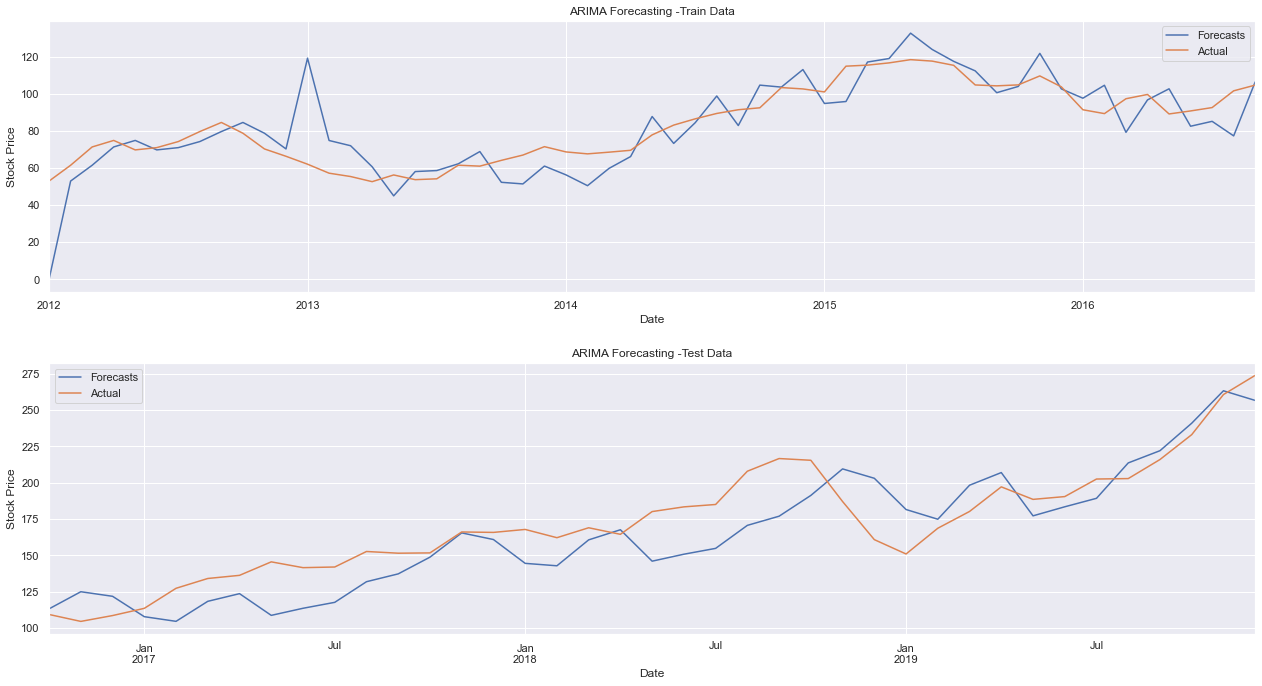

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))

forecasts_train.plot(label='Forecasts',ax=ax1,title='ARIMA Forecasting -Train Data')
train.plot(label='Actual',ax=ax1)
ax1.set_ylabel('Stock Price')

forecasts_test.plot(label='Forecasts',ax=ax2,title='ARIMA Forecasting -Test Data')
test.plot(label='Actual',ax=ax2)
ax2.set_ylabel('Stock Price')

ax1.legend()
ax2.legend()
plt.tight_layout(pad=2)

In [ ]:
print(result_metrics(train,forecasts_train,'ARIMA-Train Data'))
print('----')
print(result_metrics(test,forecasts_test,'ARIMA-Test Data'))

Result Metrics for ARIMA-Train Data
R2 Score :  0.491
Mean Squared Error :  199.567
Mean Absolute Error :  9.797
mean Absolute Percentage Error 13.39
None
----
Result Metrics for ARIMA-Test Data
R2 Score :  0.704
Mean Squared Error :  441.123
Mean Absolute Error :  17.557
mean Absolute Percentage Error 10.65
None
